<a href="https://colab.research.google.com/github/jumbokh/Computer-Vision/blob/main/notebooks/vAE_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# coding: utf-8
import torch
import torch.nn as nn
import torch.utils.data as data
import torchvision

In [2]:
# Settings
epochs = 10
batch_size = 128
lr = 0.008


# DataLoader
train_set = torchvision.datasets.MNIST(
    root='mnist',
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
)
train_loader = data.DataLoader(train_set, batch_size=batch_size, shuffle=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 135272431.39it/s]


Extracting mnist/MNIST/raw/train-images-idx3-ubyte.gz to mnist/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 83715061.38it/s]


Extracting mnist/MNIST/raw/train-labels-idx1-ubyte.gz to mnist/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 36596084.20it/s]


Extracting mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to mnist/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 15589630.74it/s]


Extracting mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to mnist/MNIST/raw



In [3]:
# Model structure
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(784, 128),
            nn.Tanh(),
            nn.Linear(128, 64),
            nn.Tanh(),
            nn.Linear(64, 16),
            nn.Tanh(),
            nn.Linear(16, 2),
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(2, 16),
            nn.Tanh(),
            nn.Linear(16, 64),
            nn.Tanh(),
            nn.Linear(64, 128),
            nn.Tanh(),
            nn.Linear(128, 784),
            nn.Sigmoid()
        )

    def forward(self, inputs):
        codes = self.encoder(inputs)
        decoded = self.decoder(codes)

        return codes, decoded

In [4]:
# Optimizer and loss function
model = AutoEncoder()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
loss_function = nn.MSELoss()

In [5]:
# Train
for epoch in range(epochs):
    for data, labels in train_loader:
        inputs = data.view(-1, 784)

        # Forward
        codes, decoded = model(inputs)

        # Backward
        optimizer.zero_grad()
        loss = loss_function(decoded, inputs)
        loss.backward()
        optimizer.step()

    # Show progress
    print('[{}/{}] Loss:'.format(epoch+1, epochs), loss.item())


# Save
torch.save(model, 'autoencoder.pth')

[1/10] Loss: 0.05341140925884247
[2/10] Loss: 0.05213112384080887
[3/10] Loss: 0.04883865267038345
[4/10] Loss: 0.048221055418252945
[5/10] Loss: 0.045877136290073395
[6/10] Loss: 0.04765951260924339
[7/10] Loss: 0.04456865042448044
[8/10] Loss: 0.04547915980219841
[9/10] Loss: 0.04354086518287659
[10/10] Loss: 0.042916666716337204


AutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): Tanh()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): Tanh()
    (4): Linear(in_features=64, out_features=16, bias=True)
    (5): Tanh()
    (6): Linear(in_features=16, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): Tanh()
    (2): Linear(in_features=16, out_features=64, bias=True)
    (3): Tanh()
    (4): Linear(in_features=64, out_features=128, bias=True)
    (5): Tanh()
    (6): Linear(in_features=128, out_features=784, bias=True)
    (7): Sigmoid()
  )
)


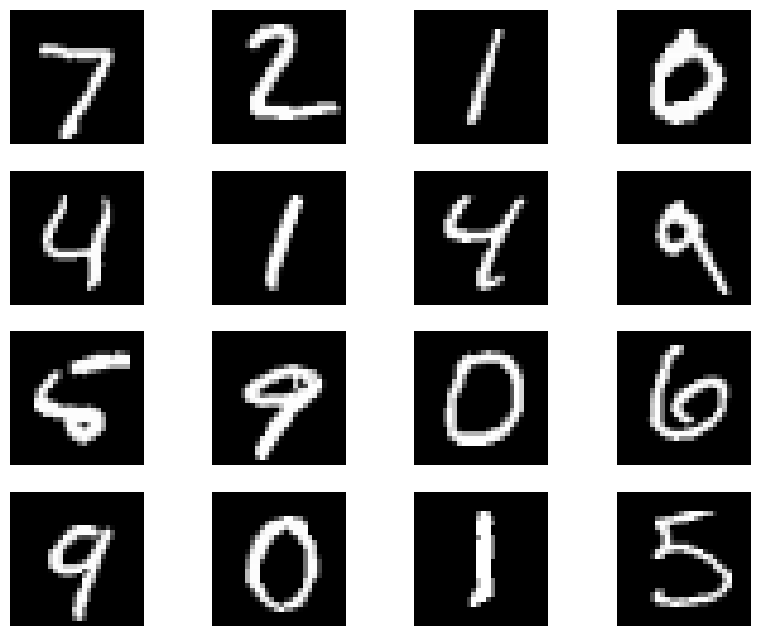

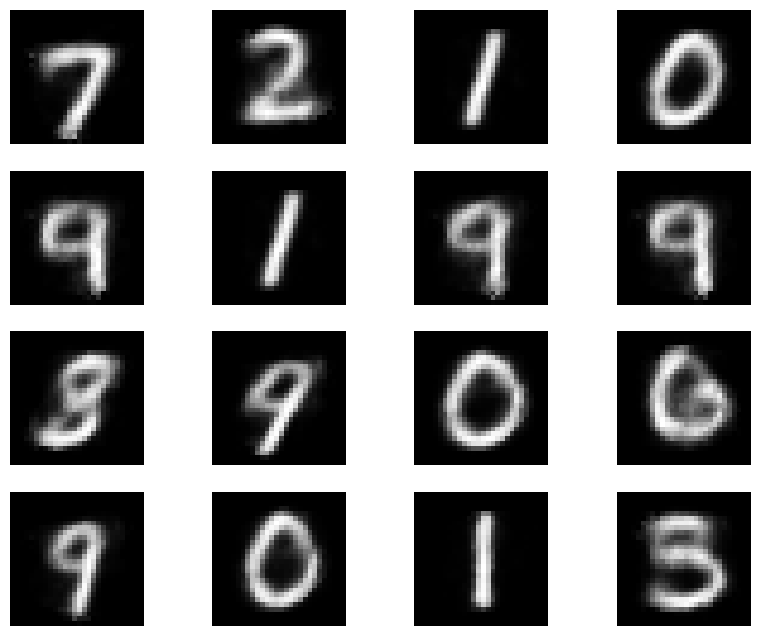

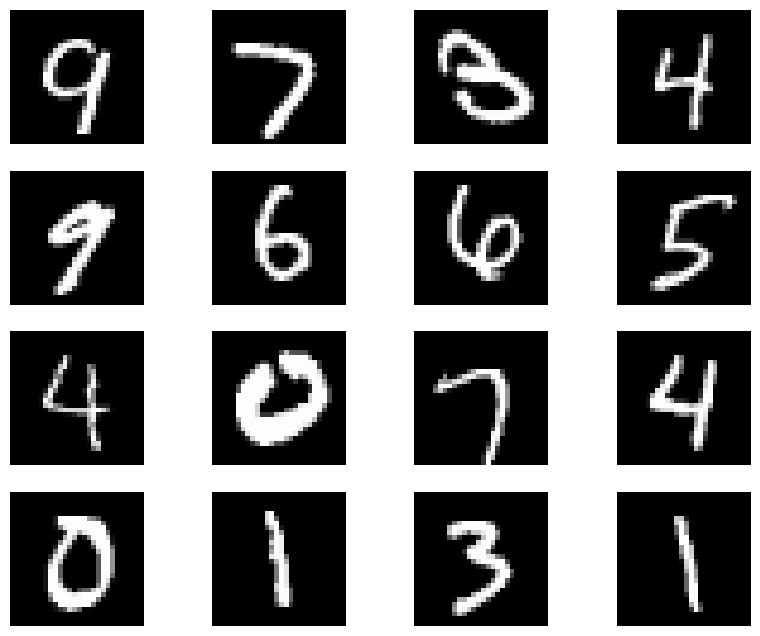

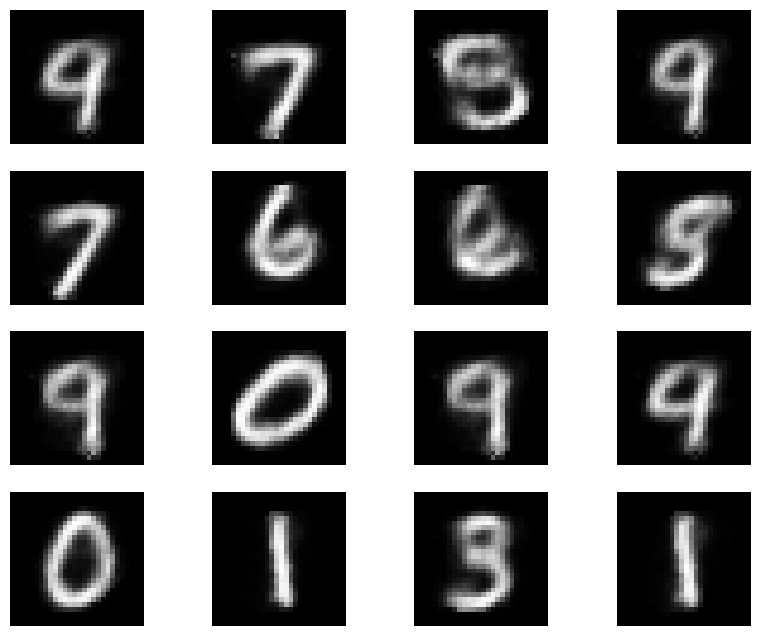

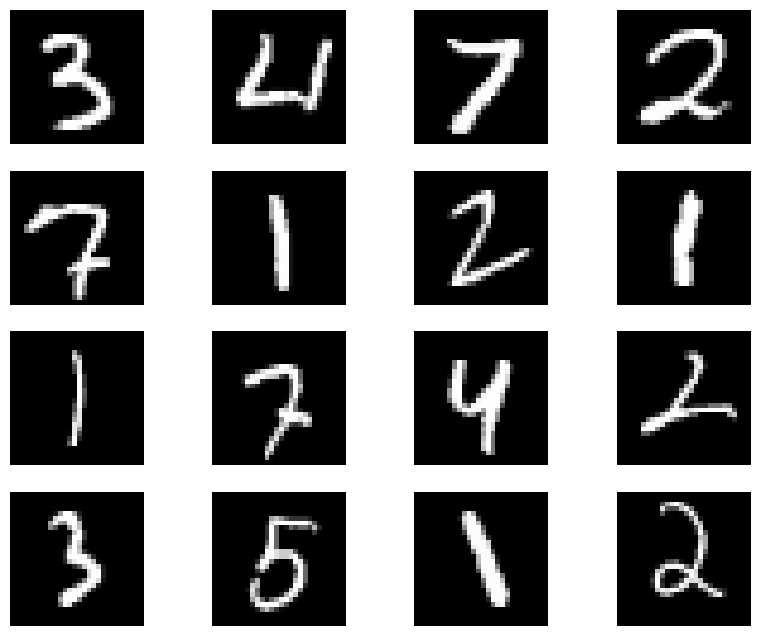

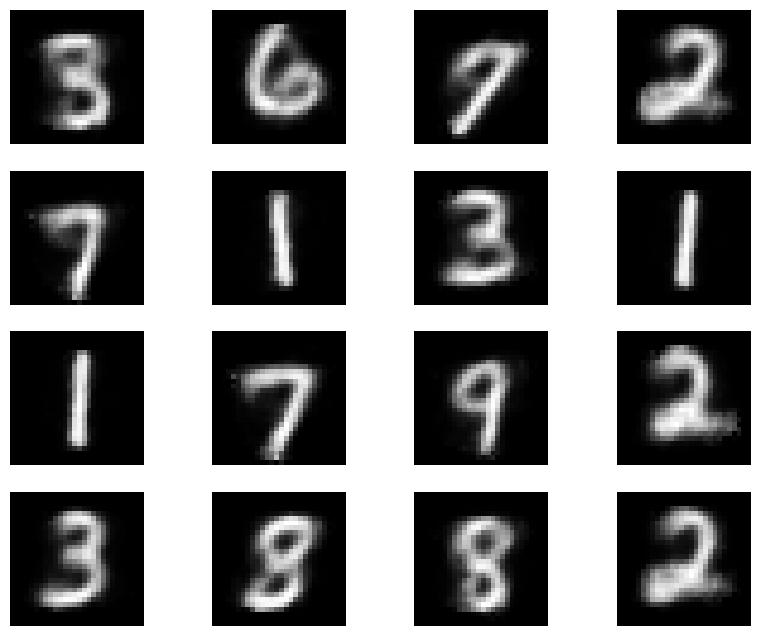

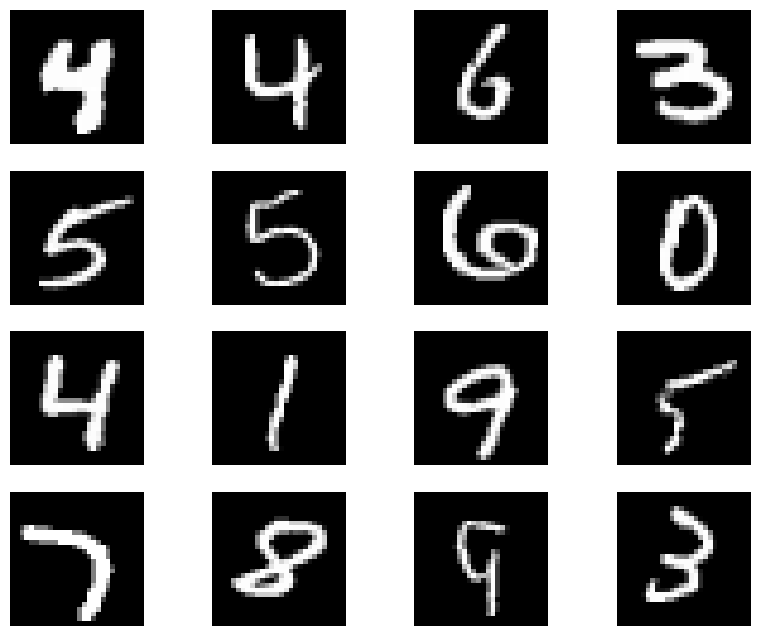

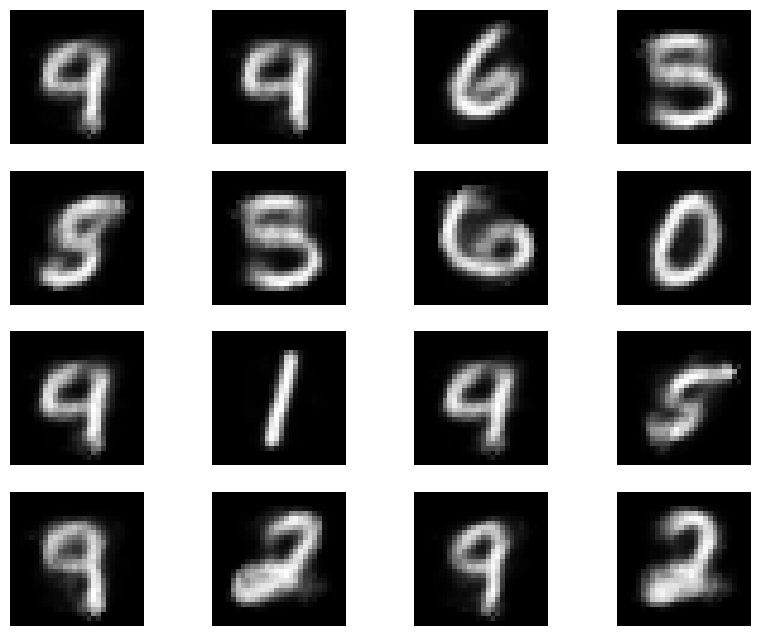

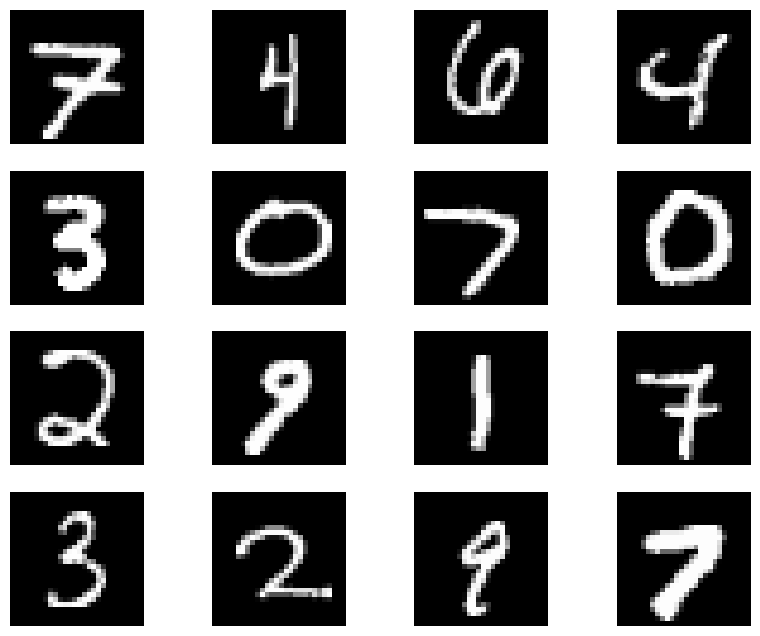

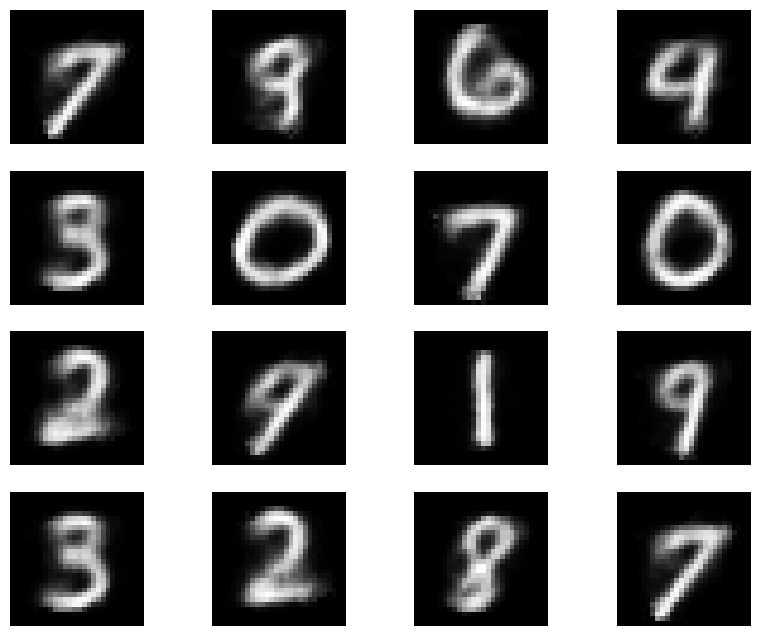

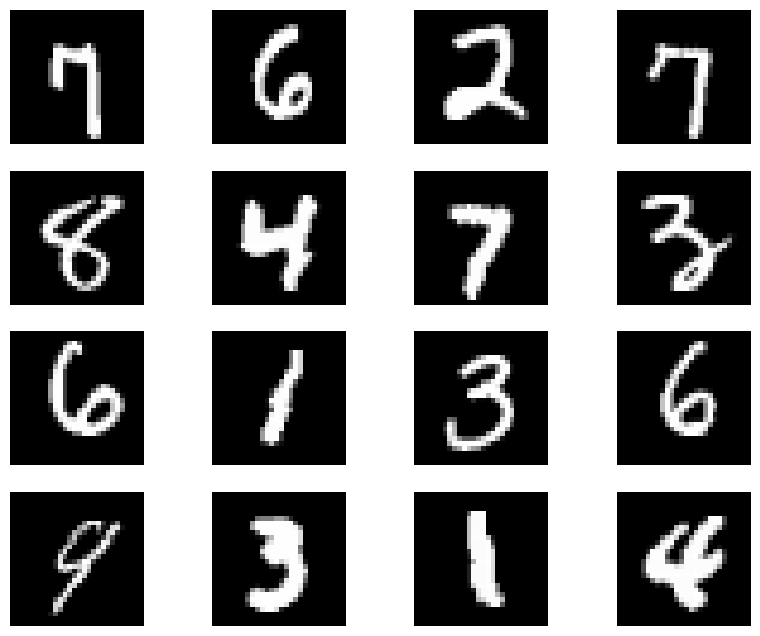

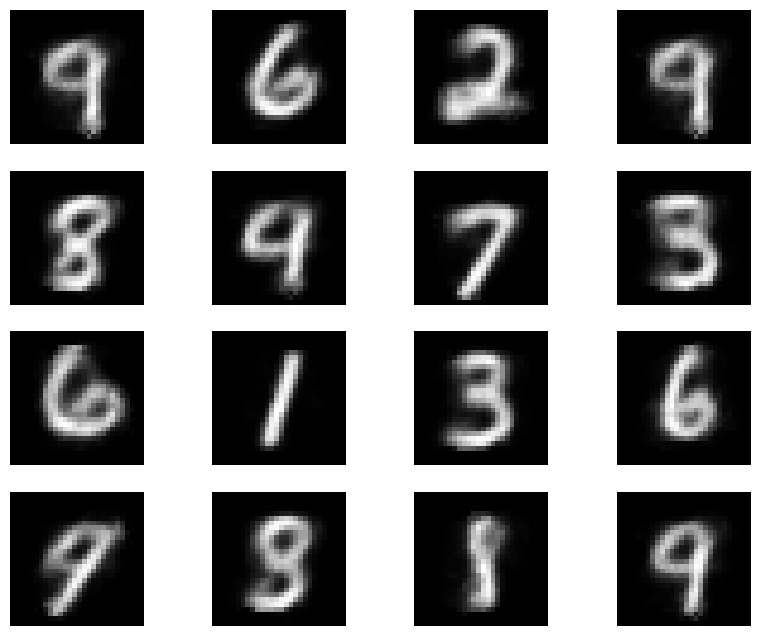

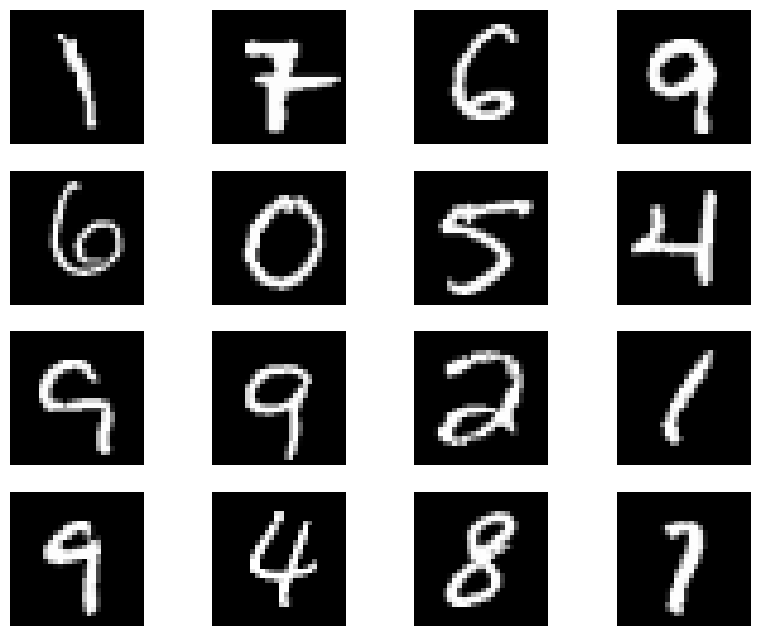

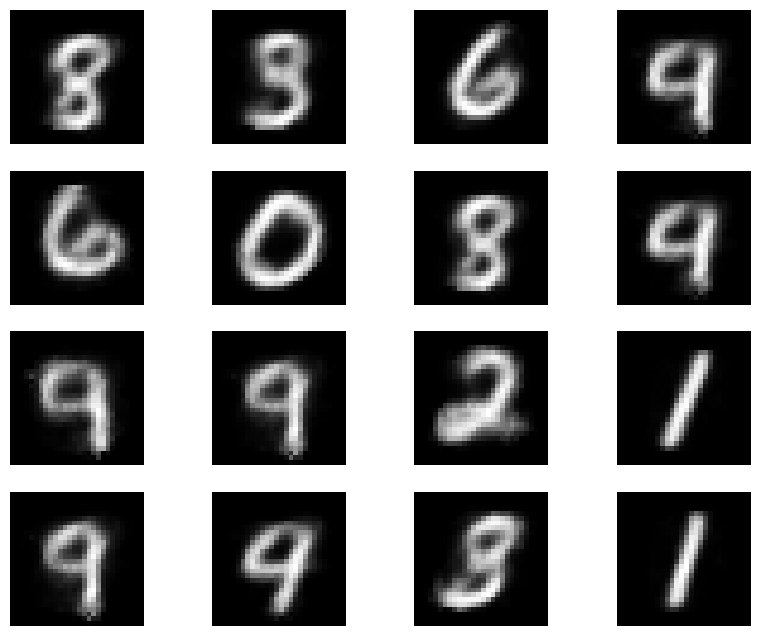

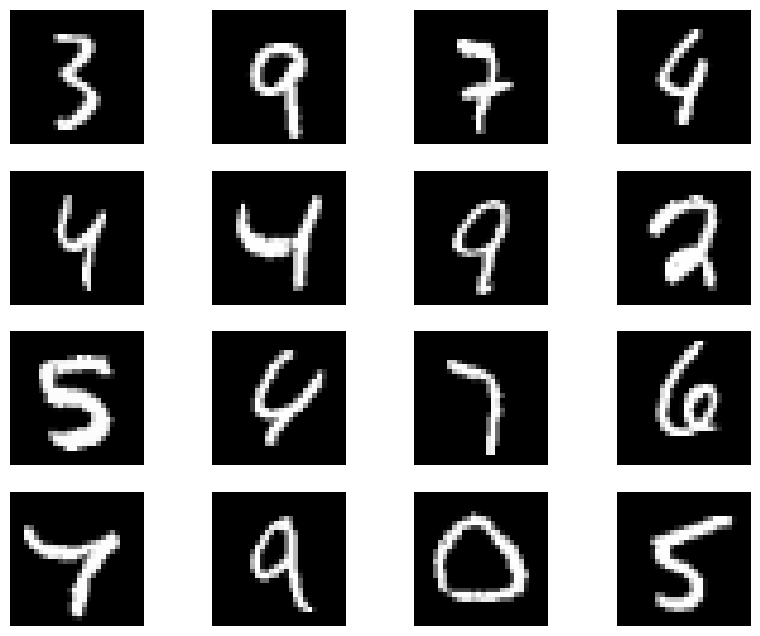

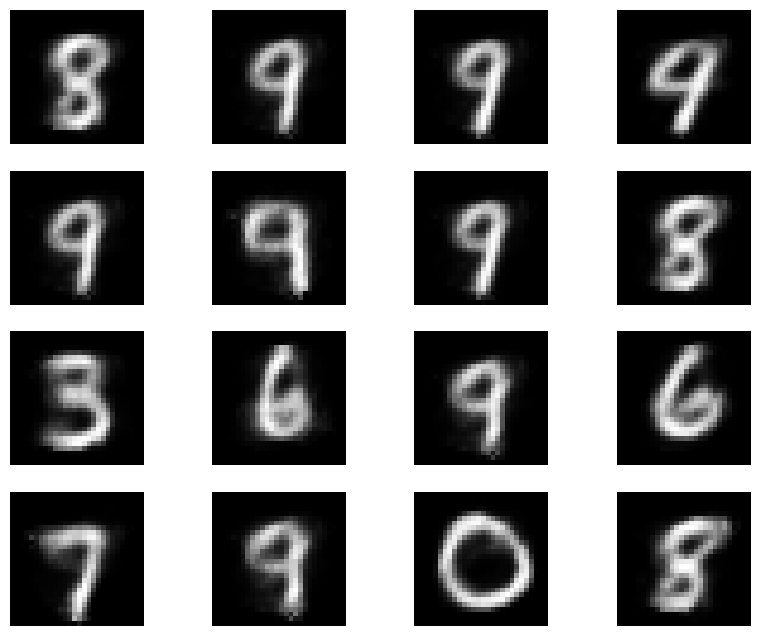

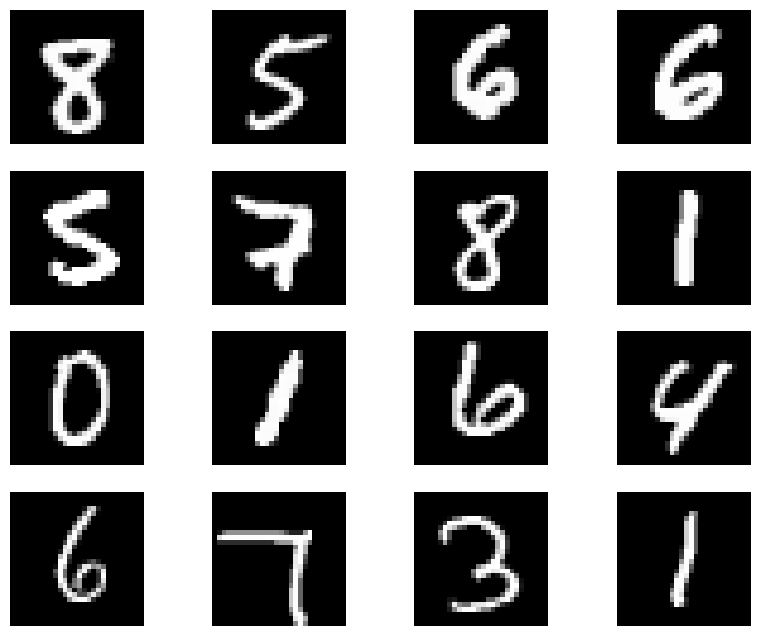

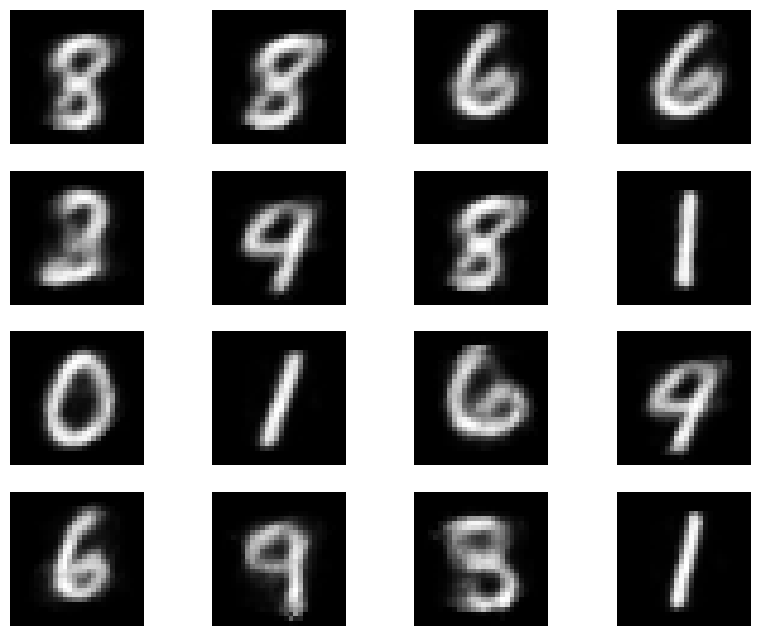

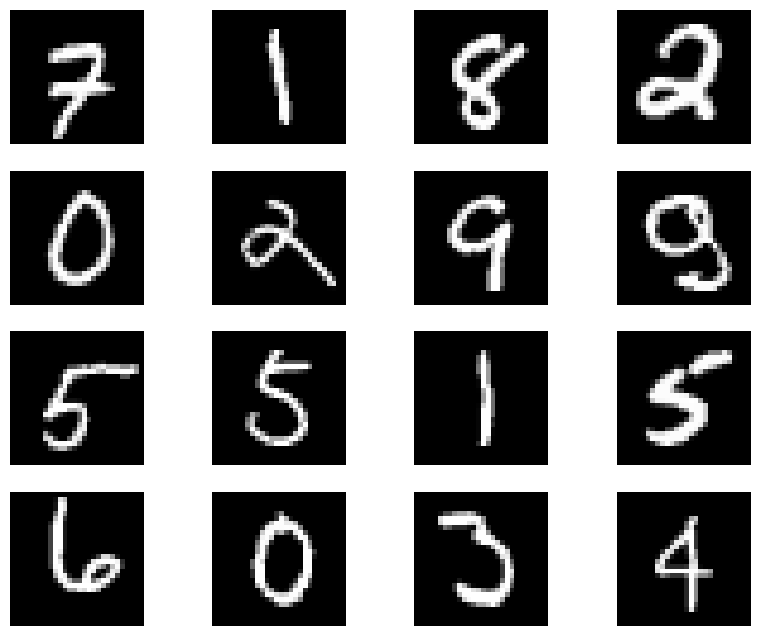

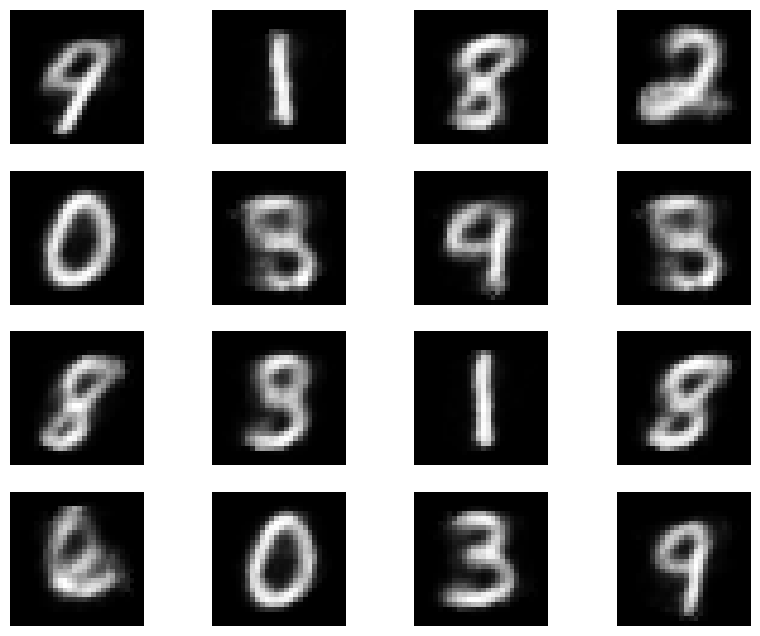

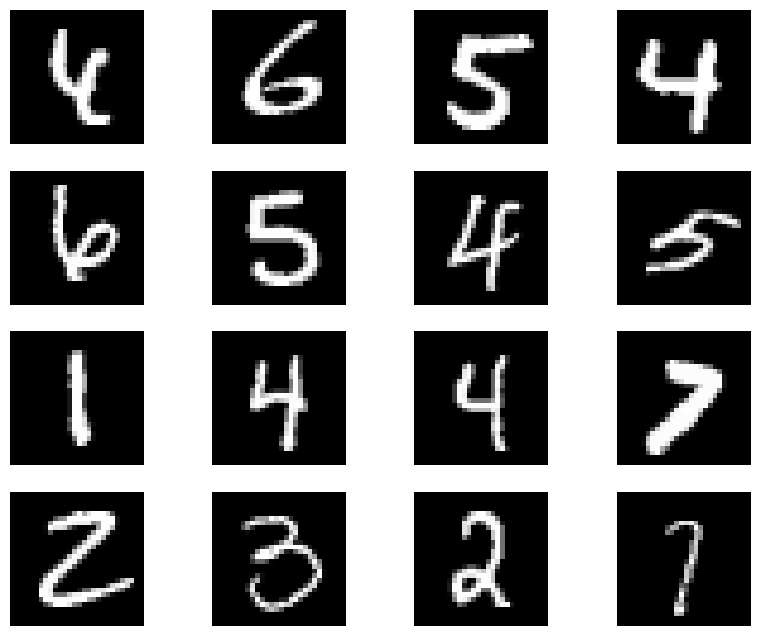

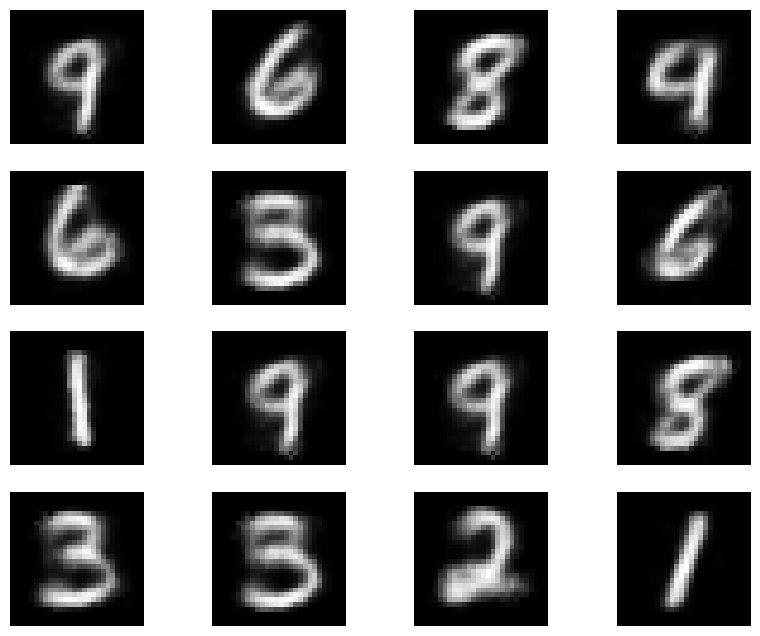

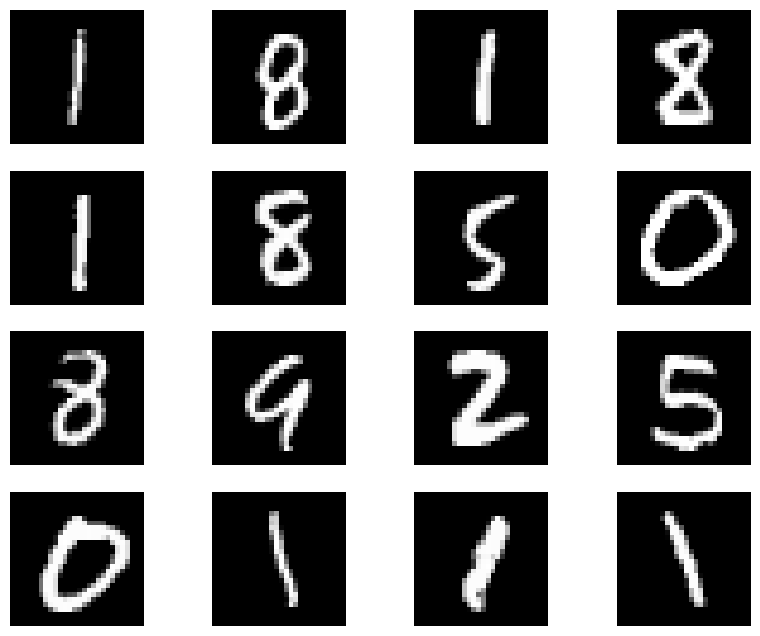

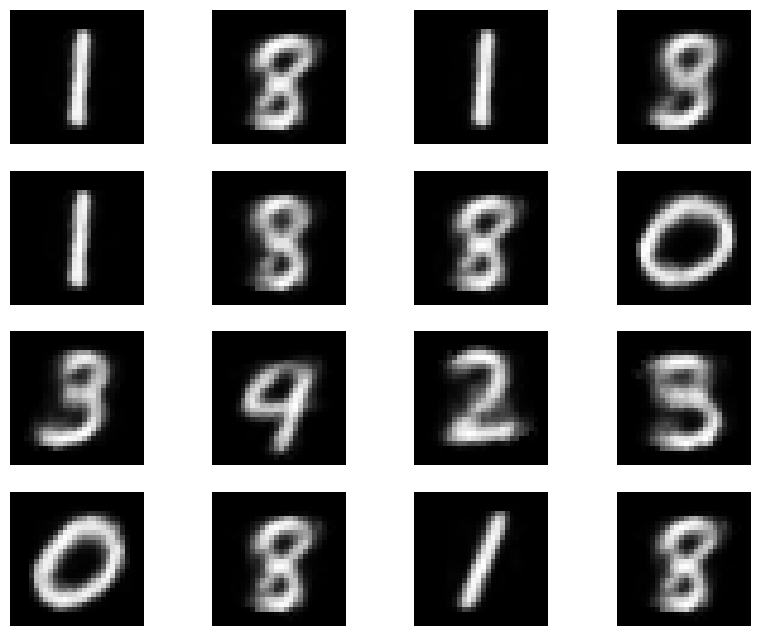

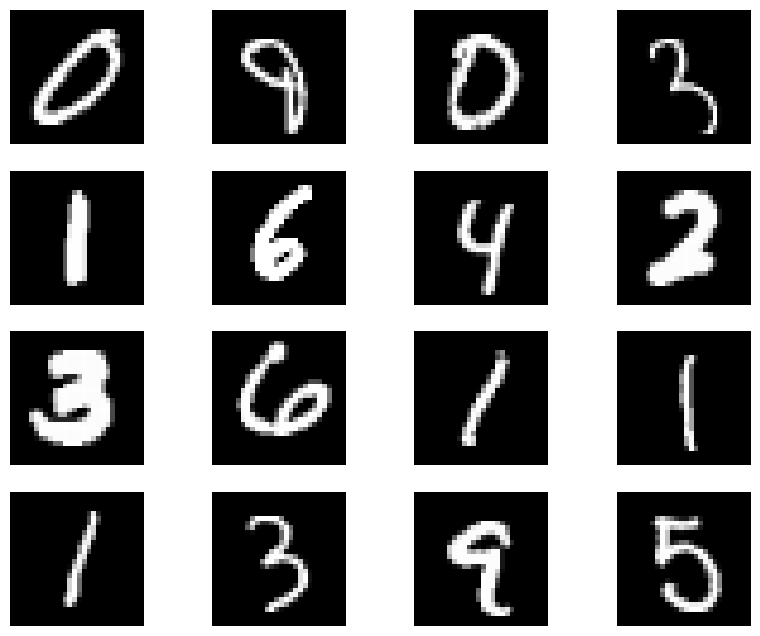

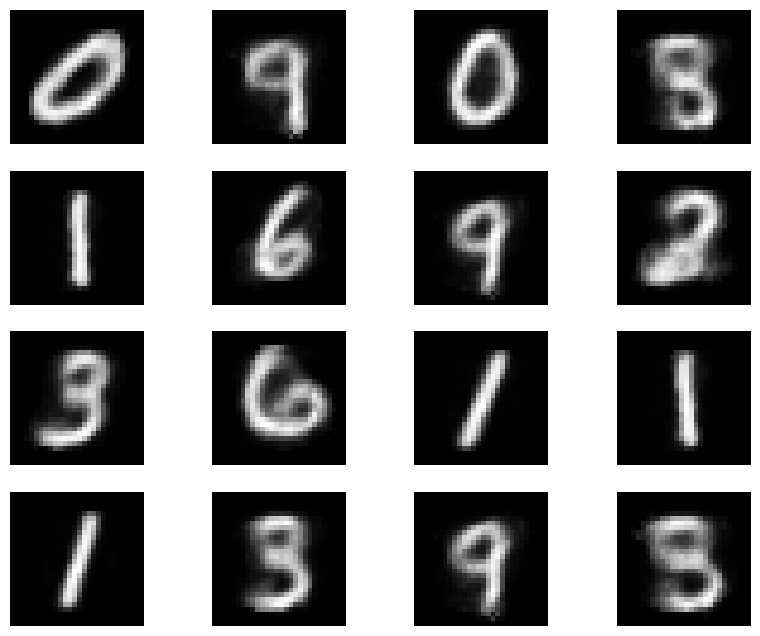

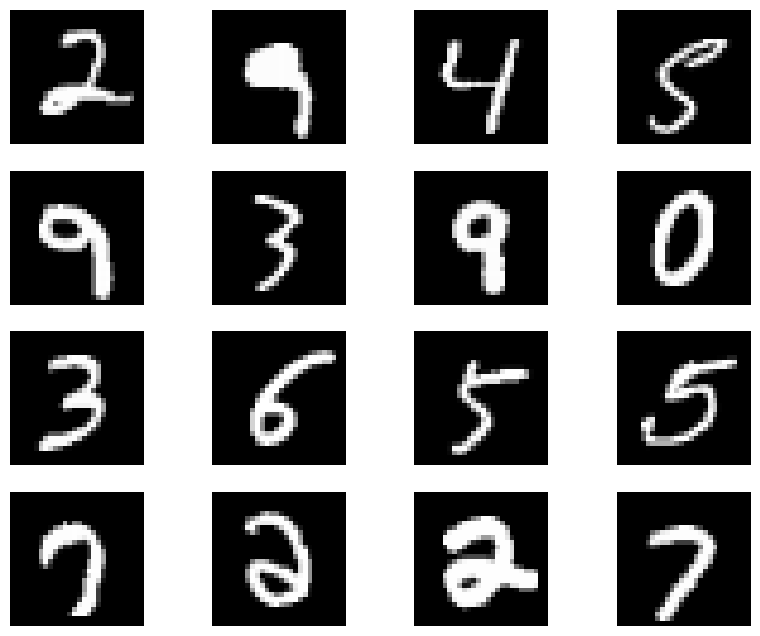

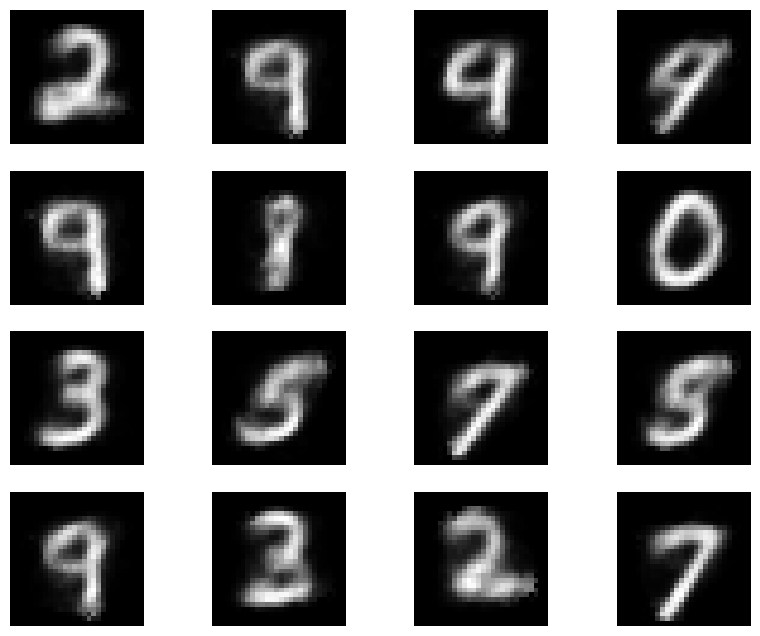

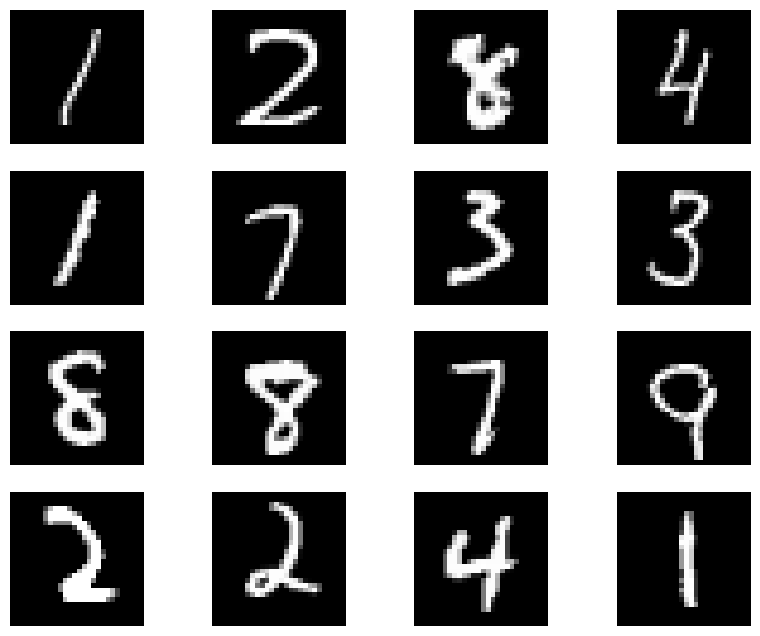

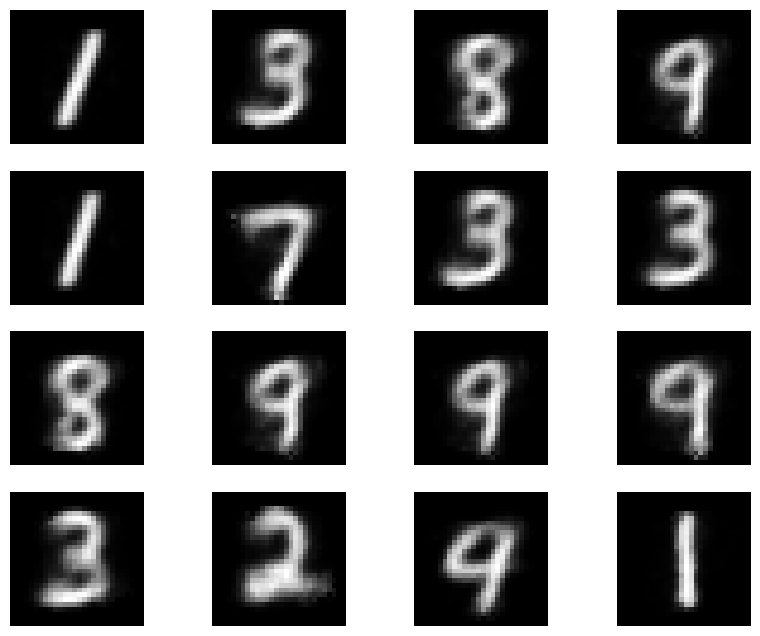

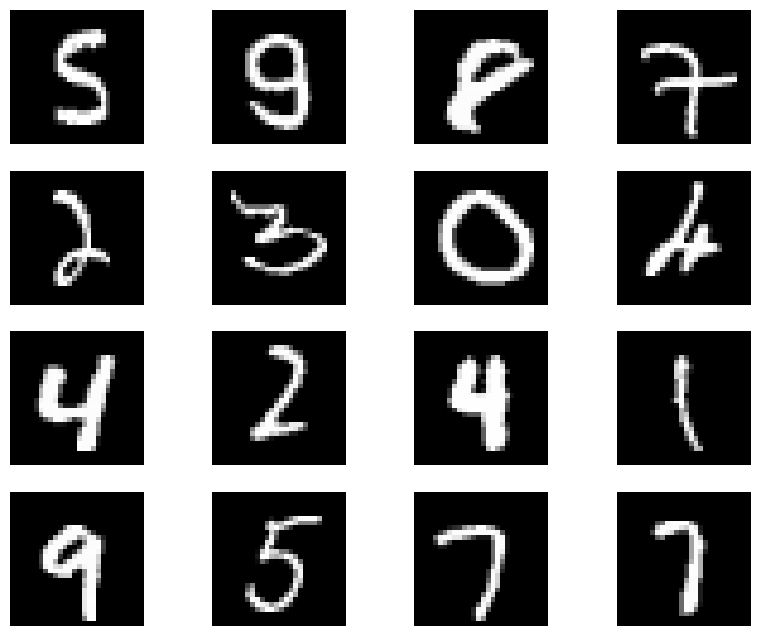

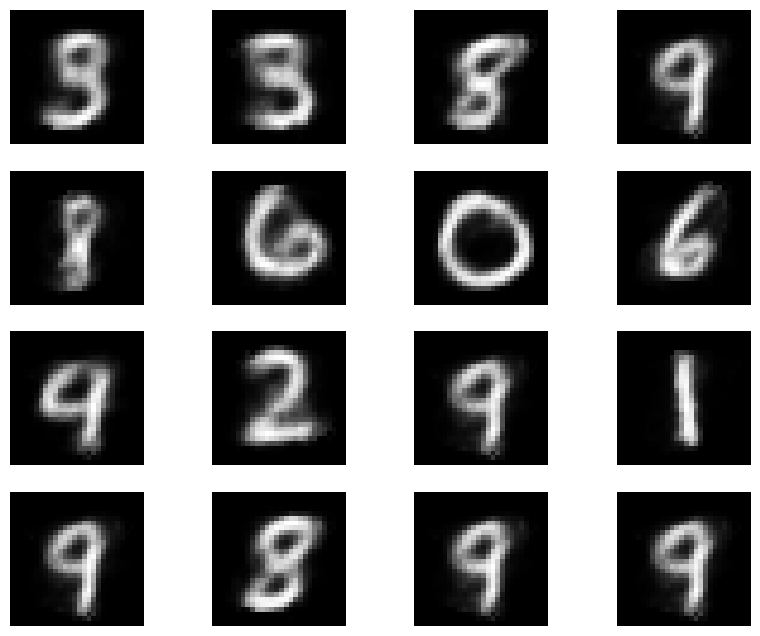

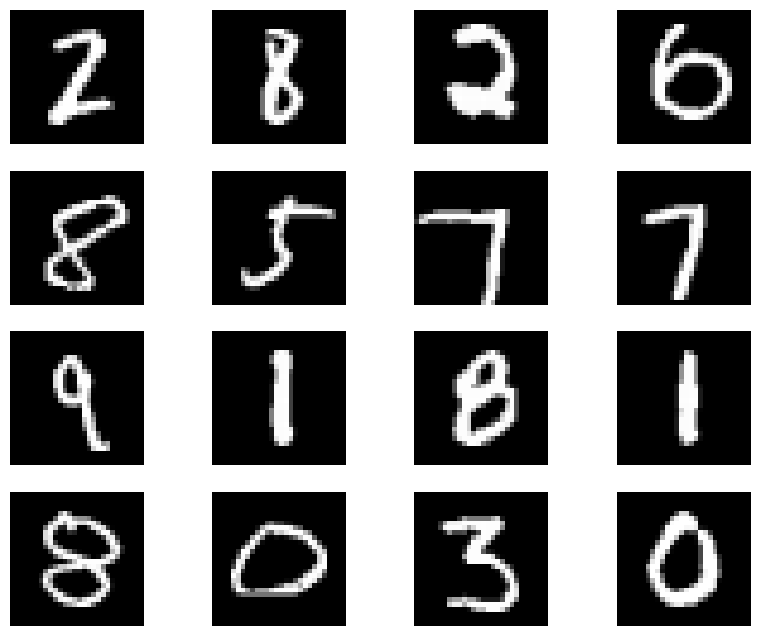

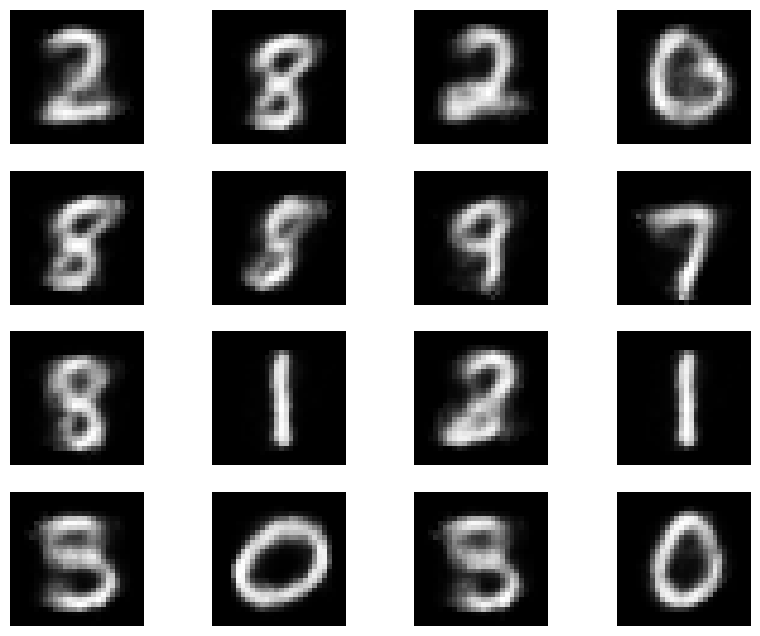

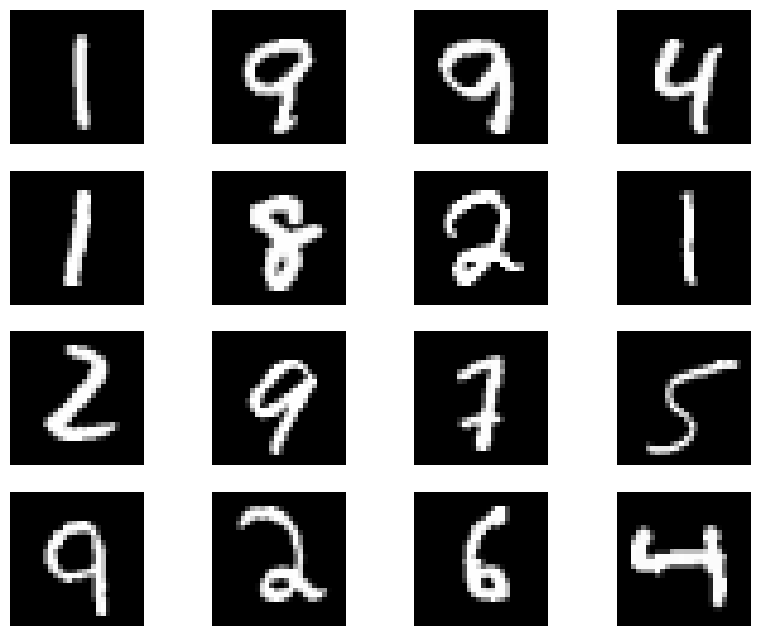

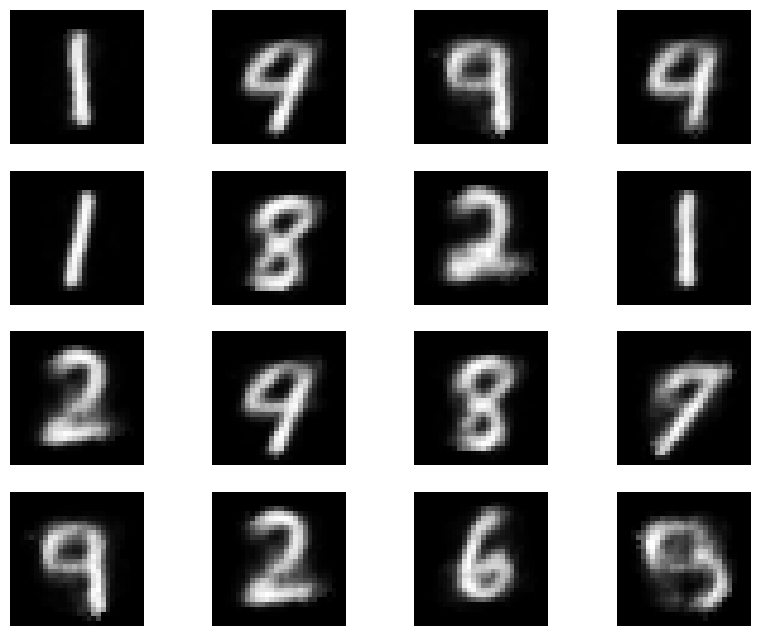

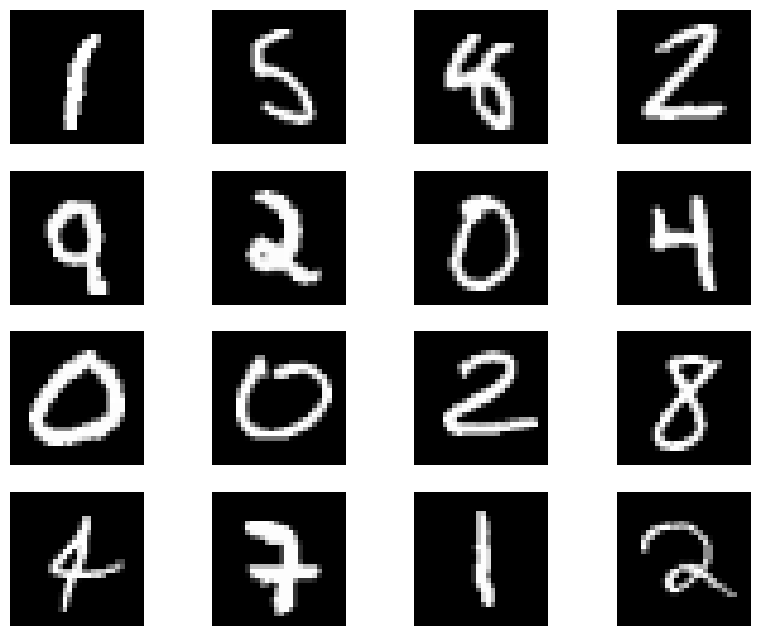

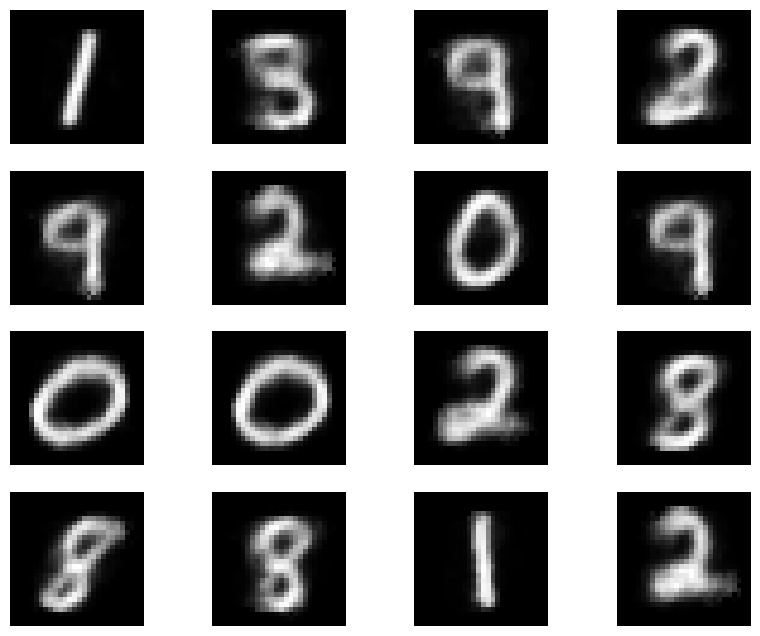

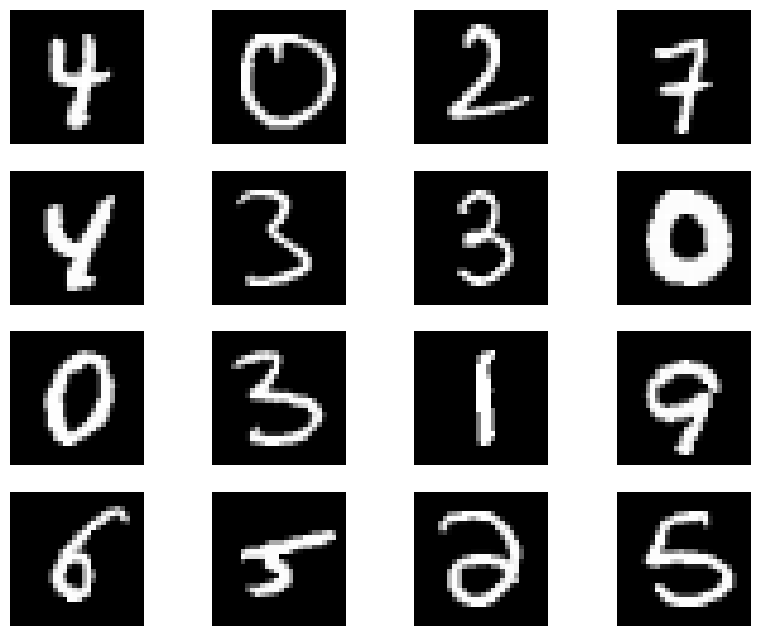

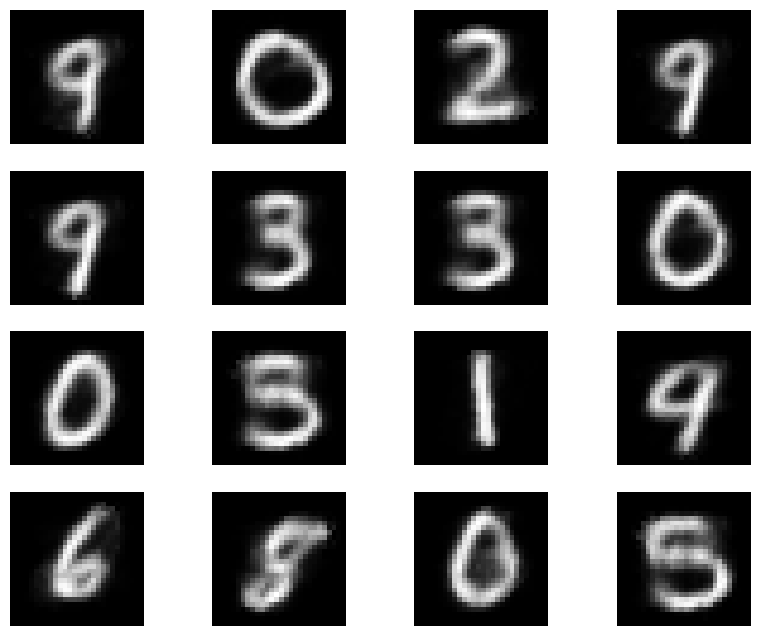

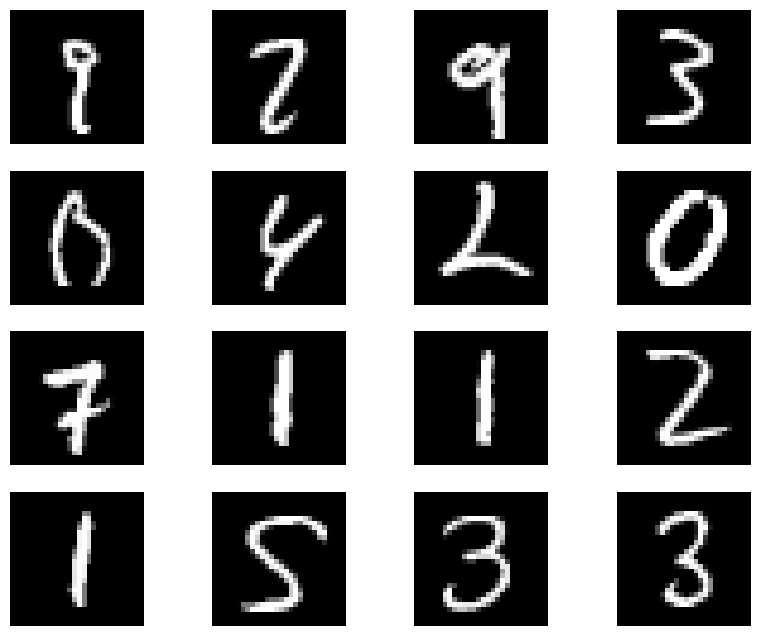

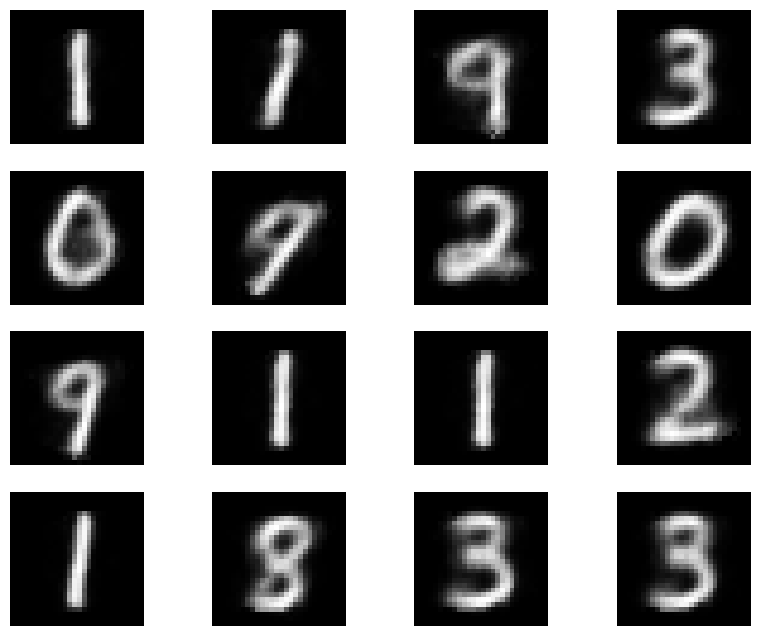

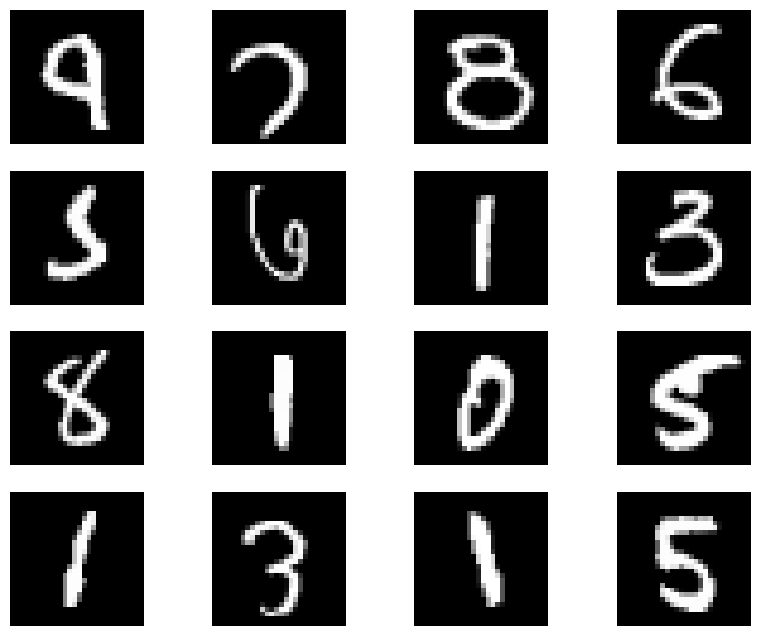

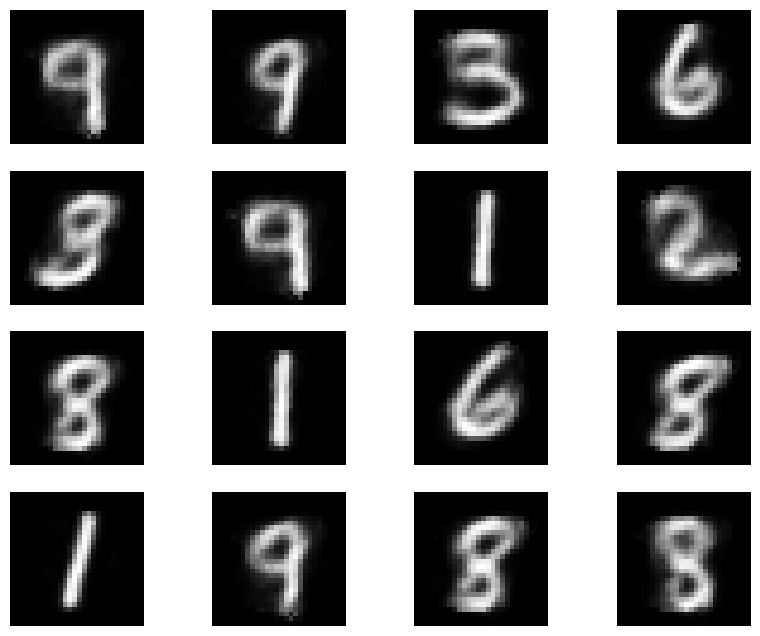

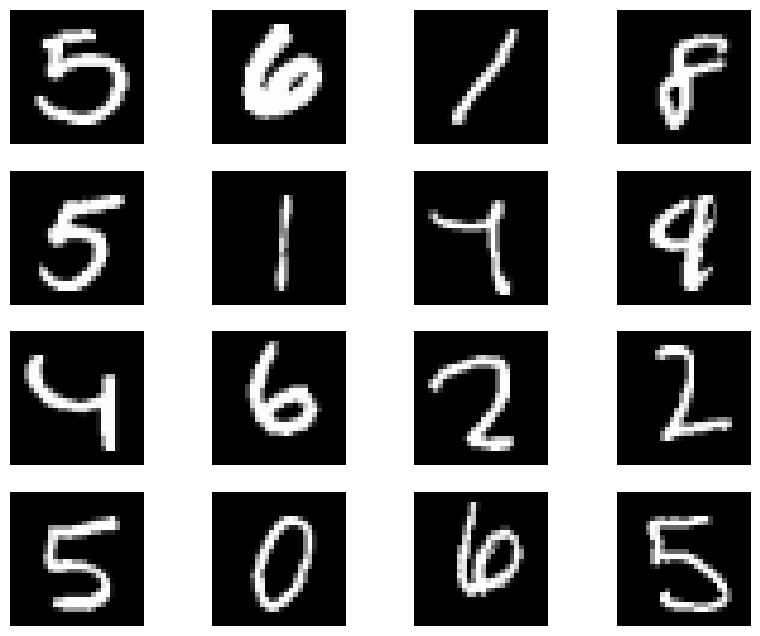

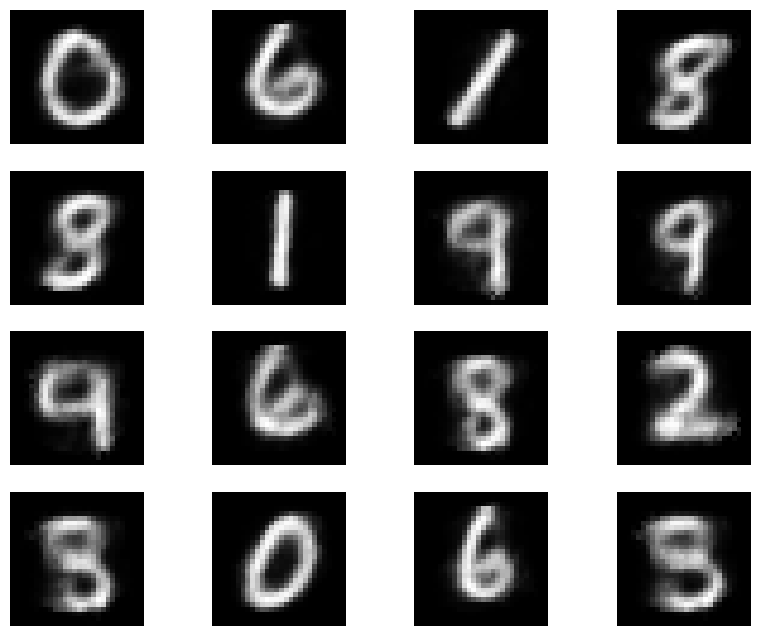

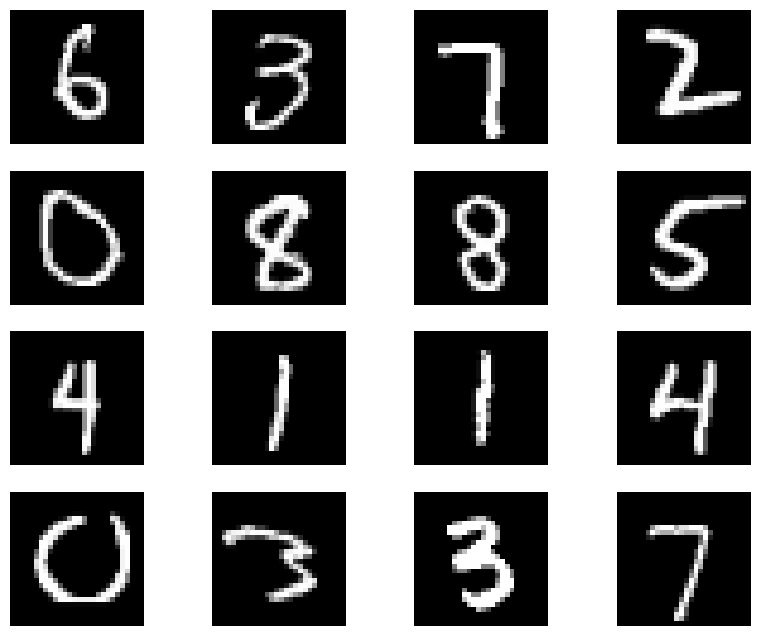

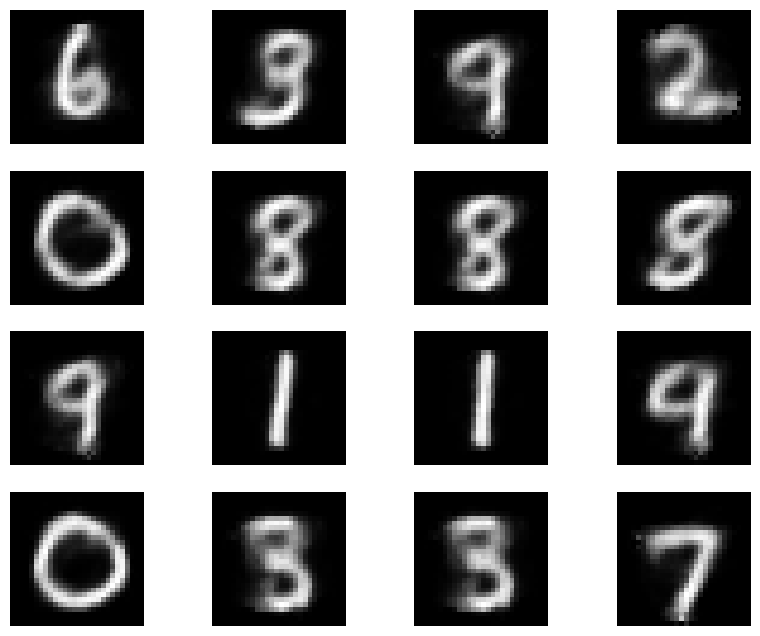

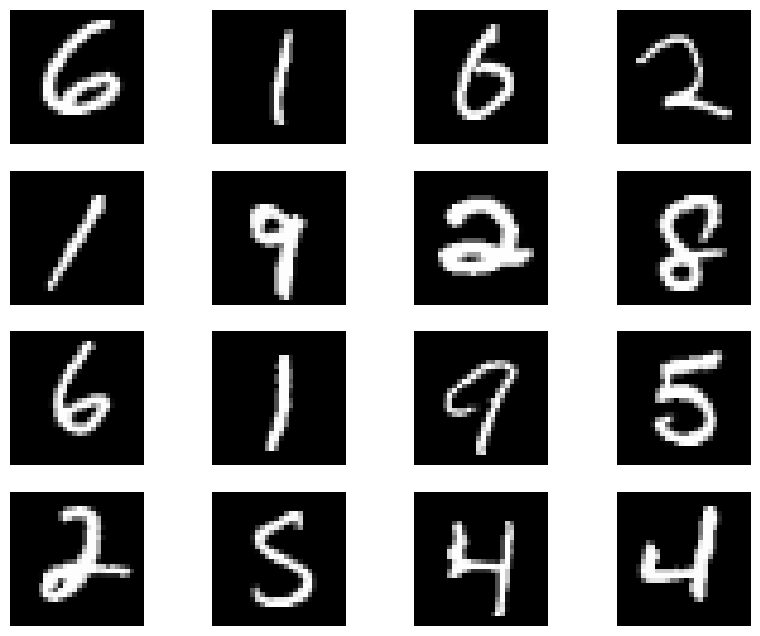

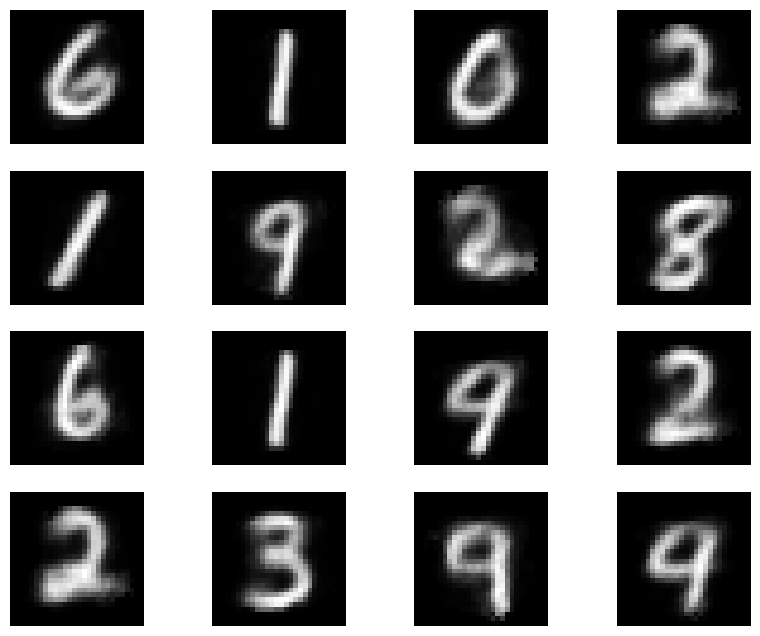

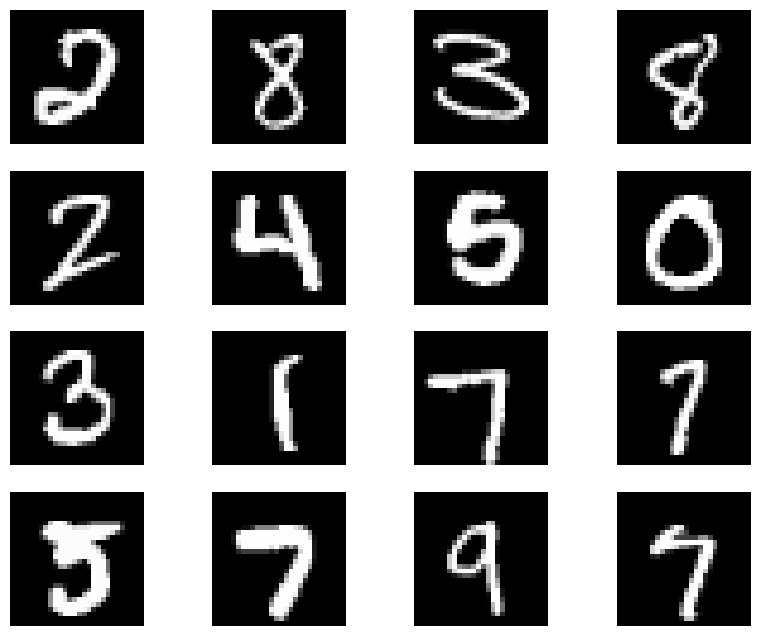

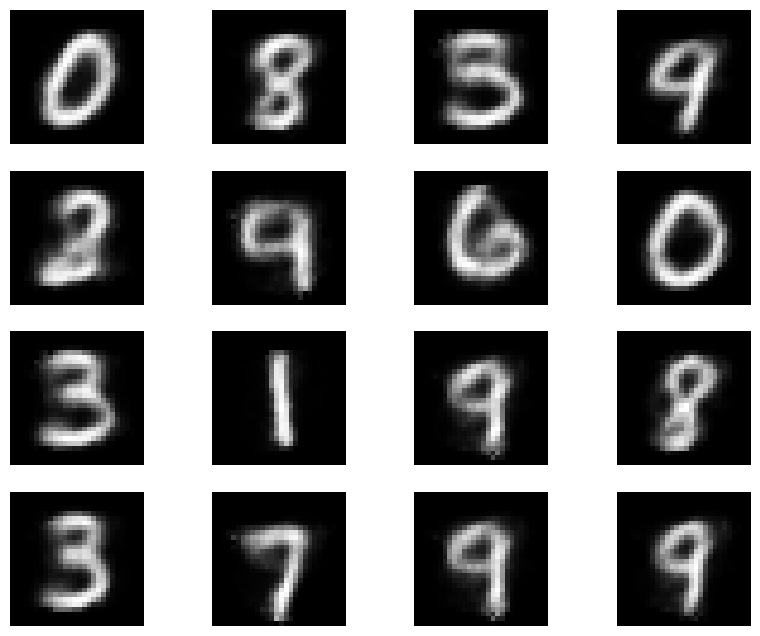

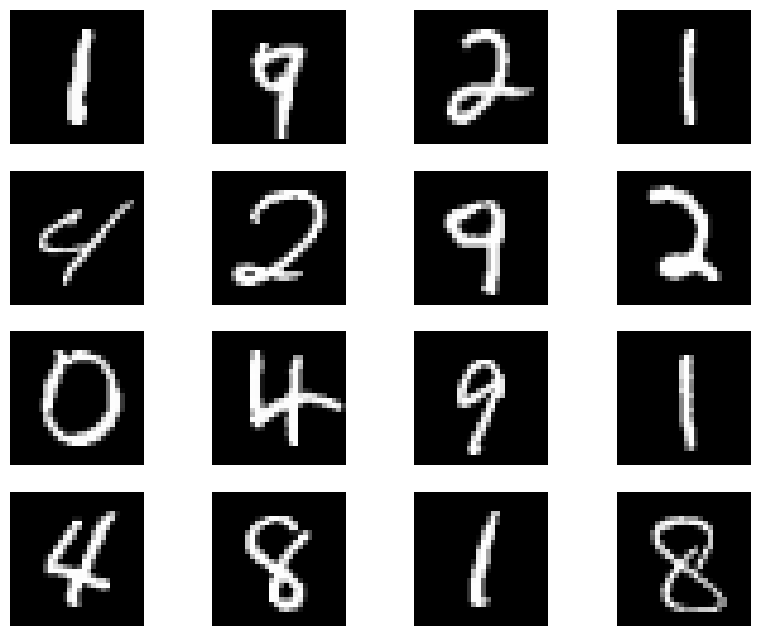

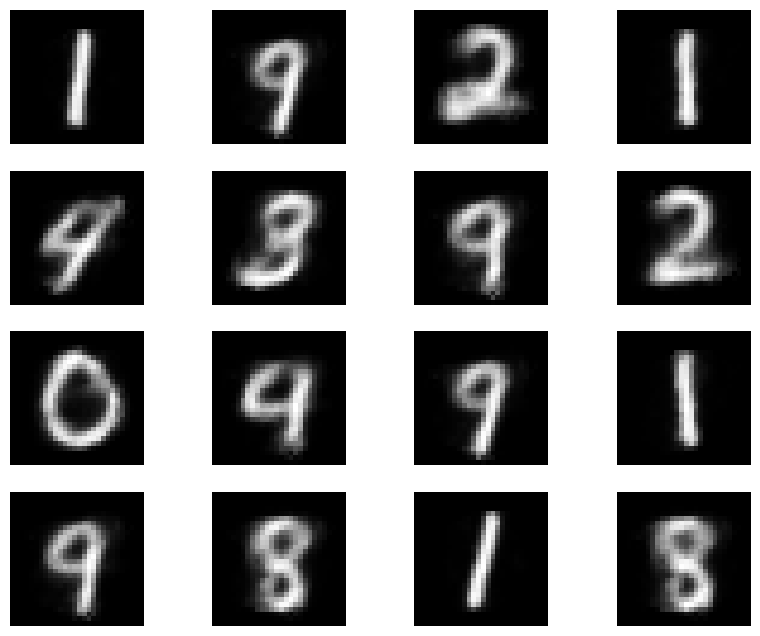

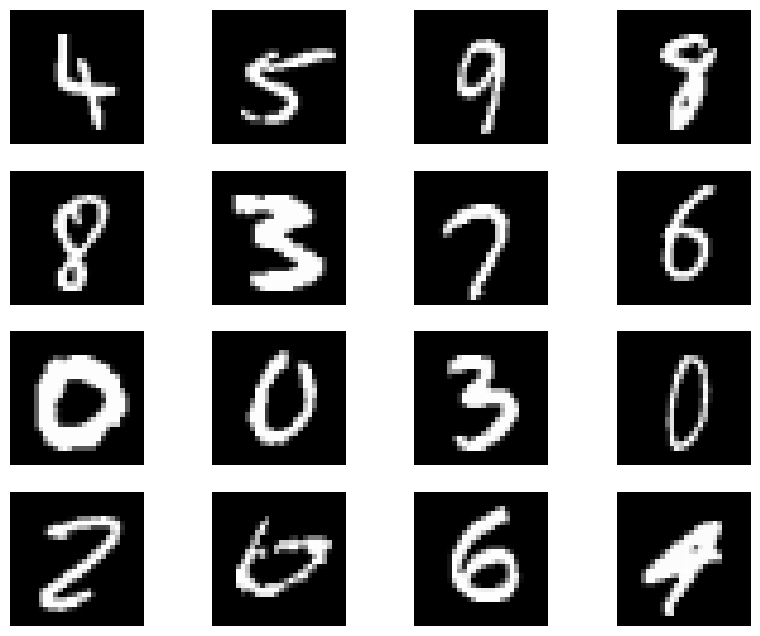

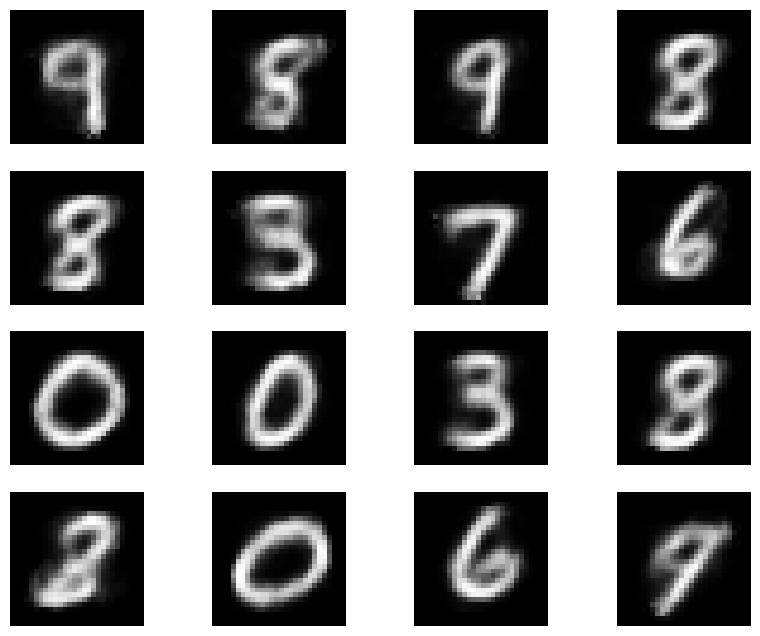

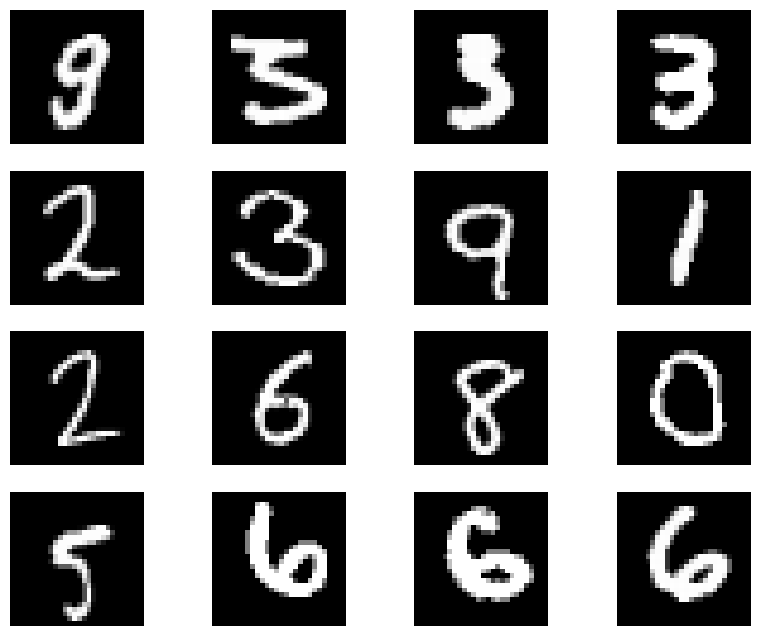

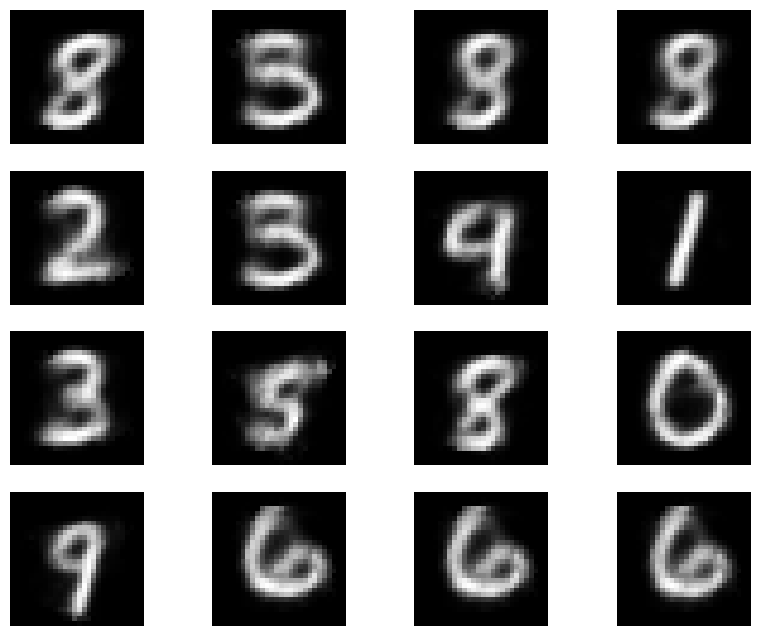

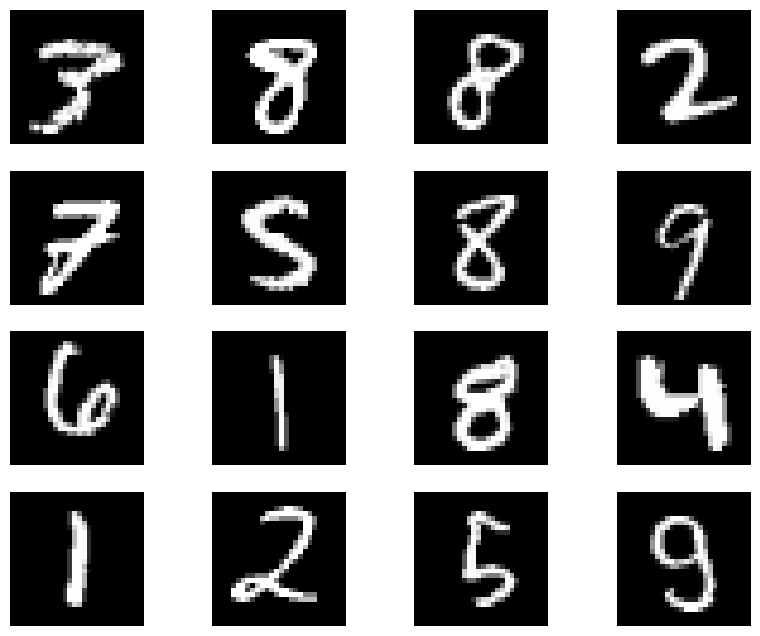

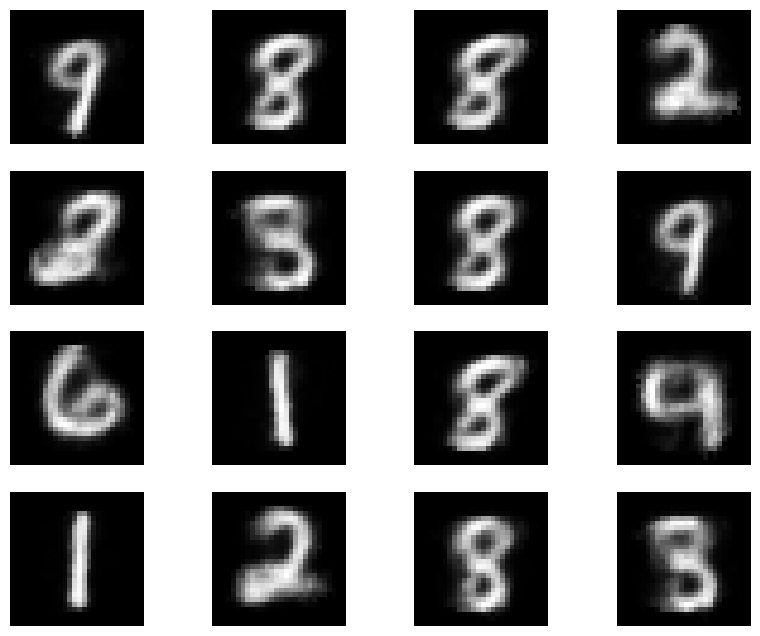

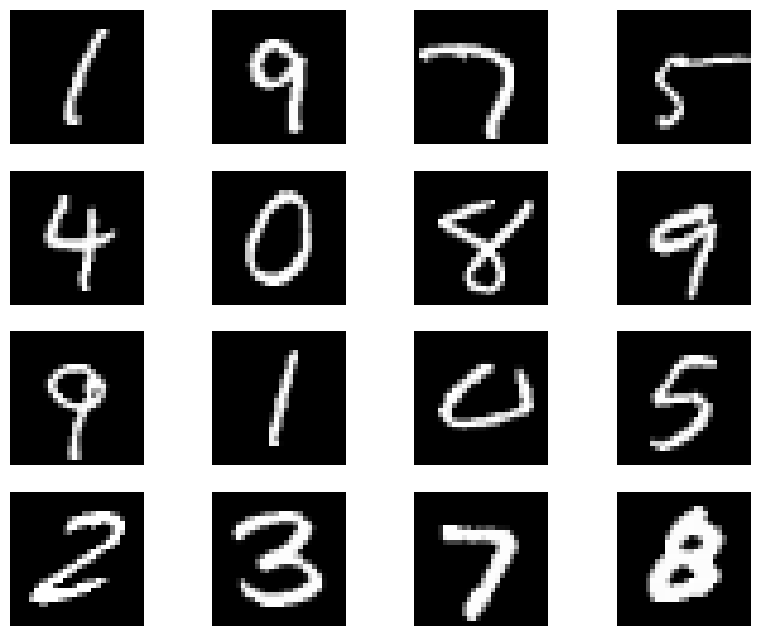

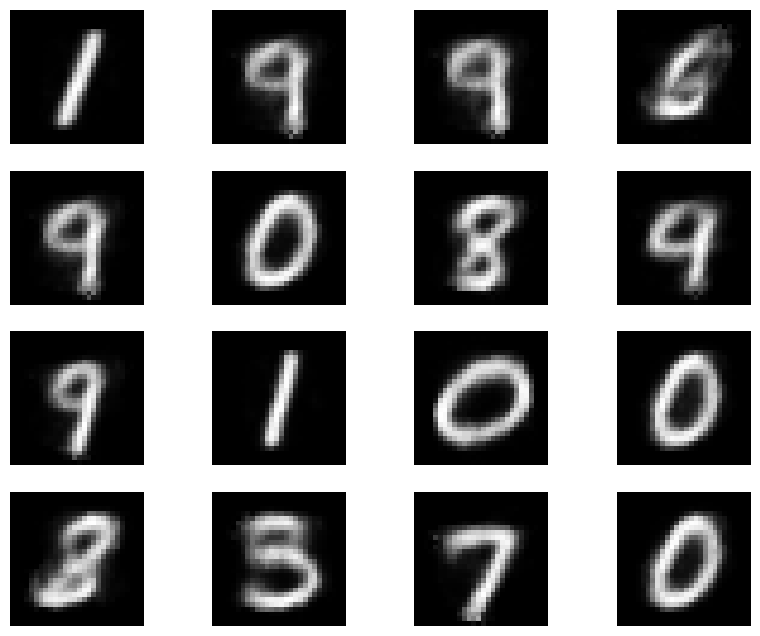

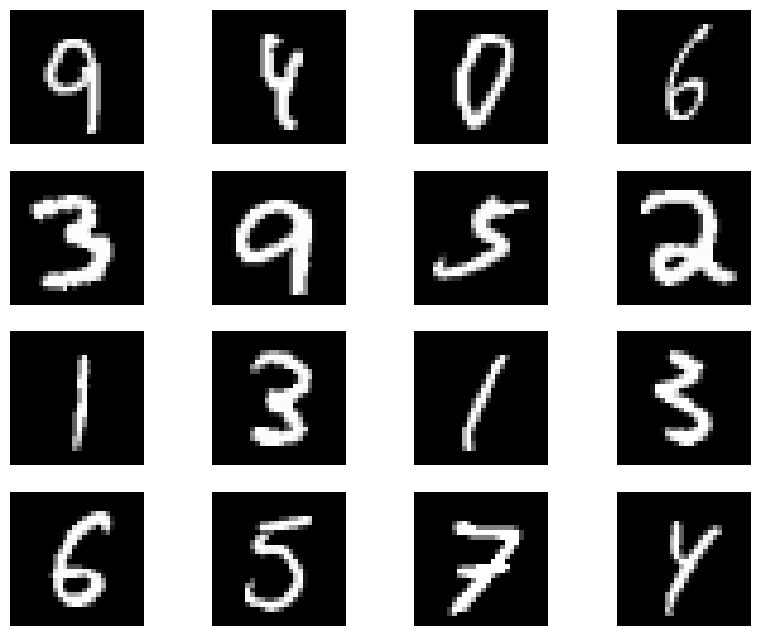

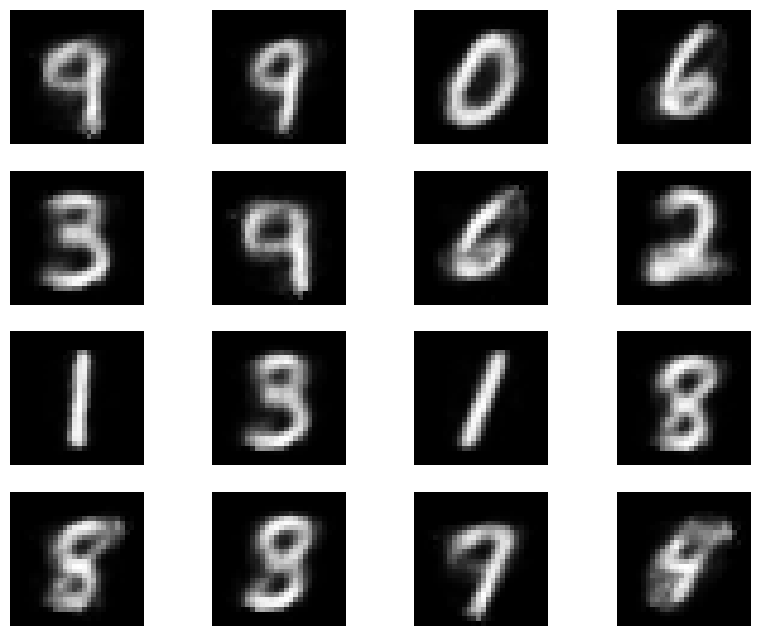

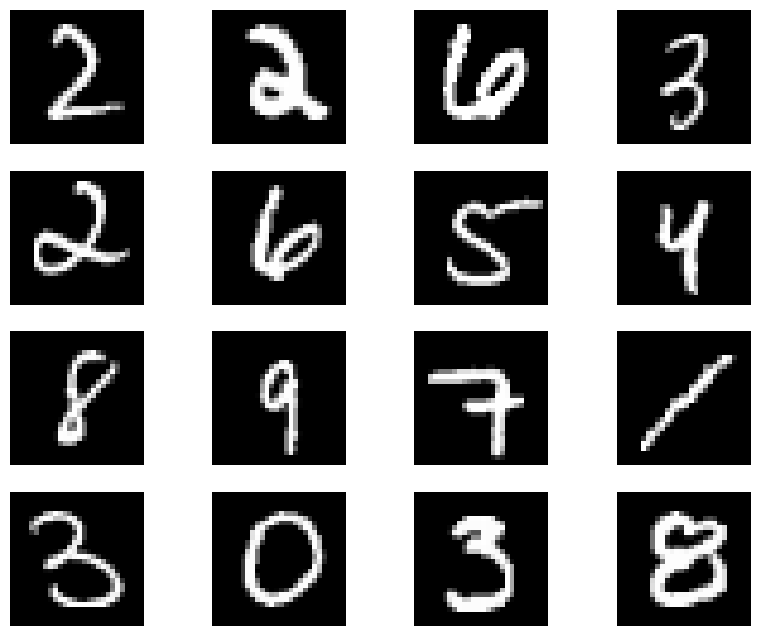

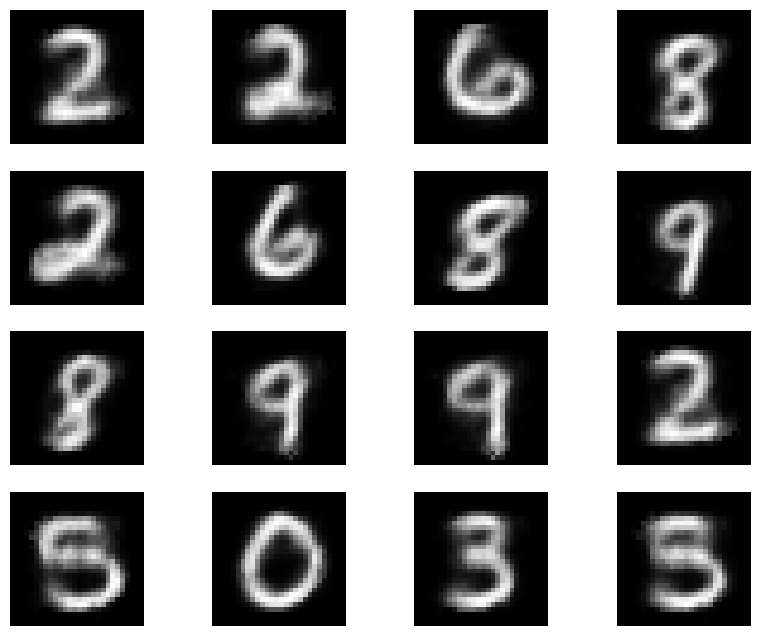

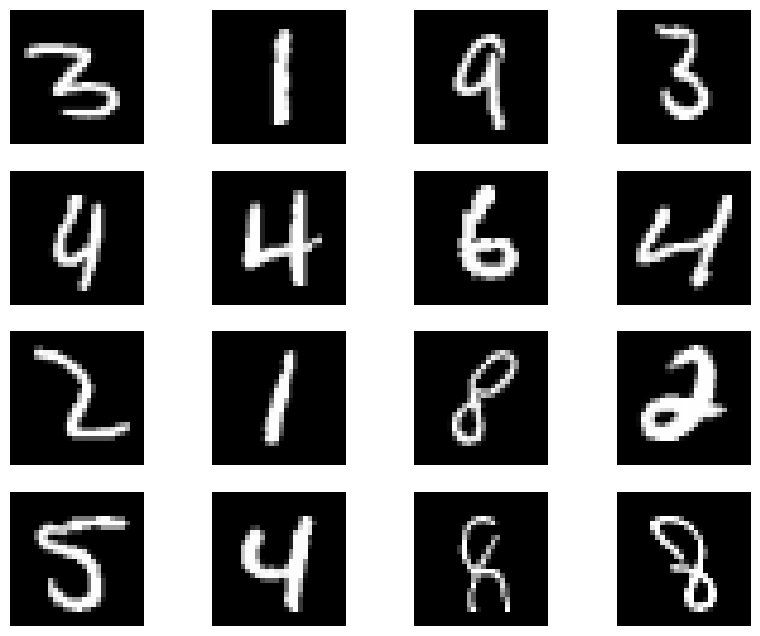

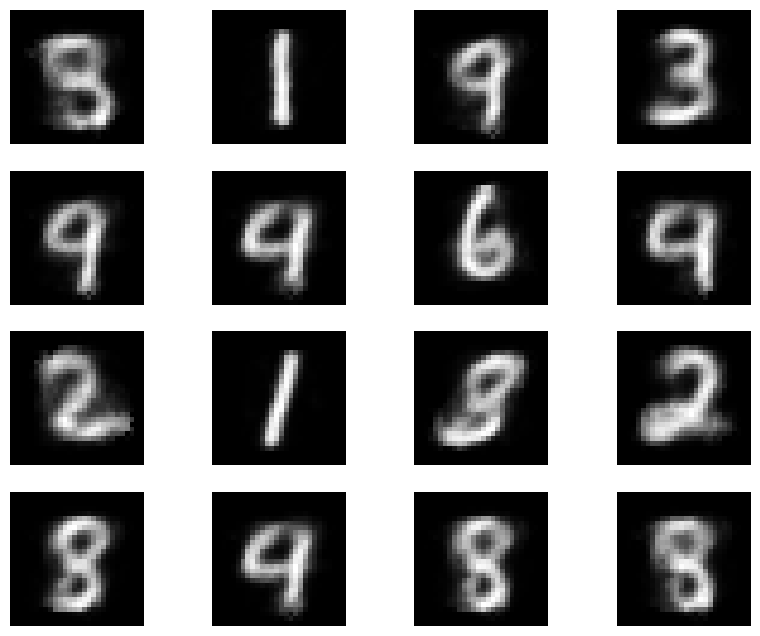

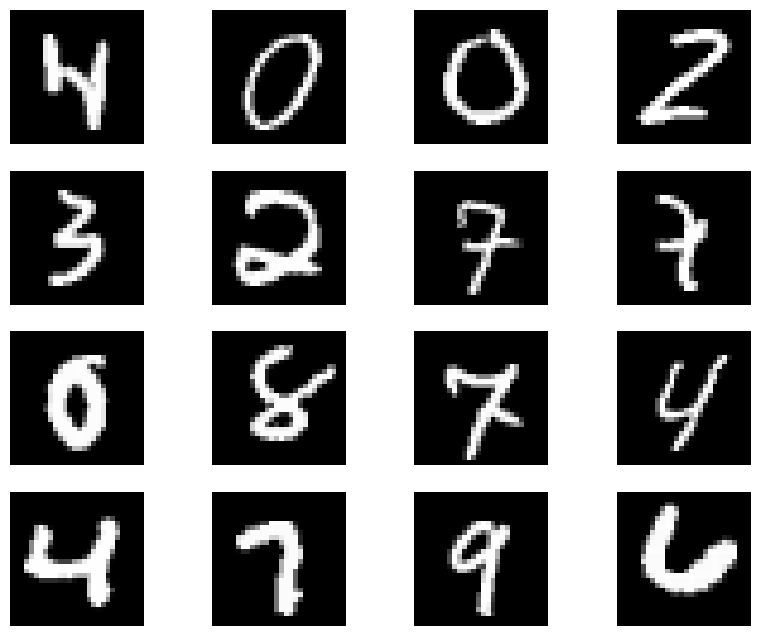

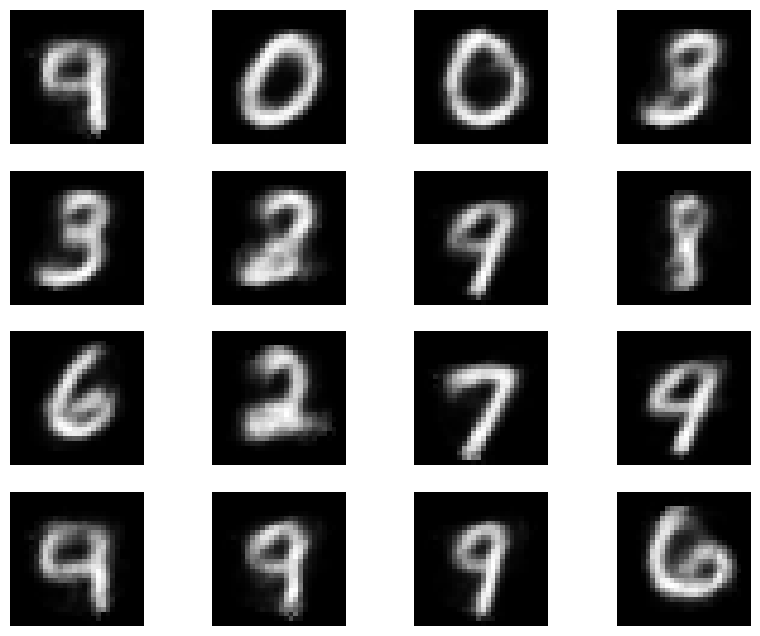

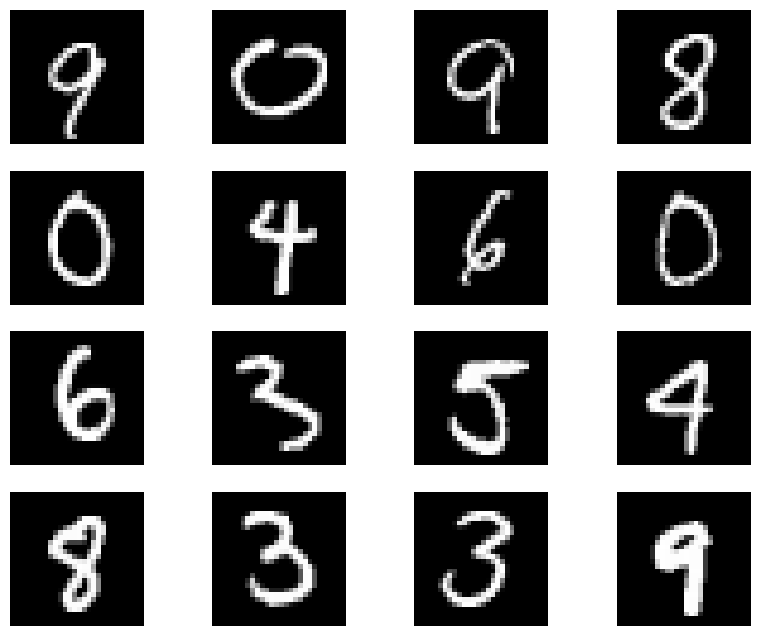

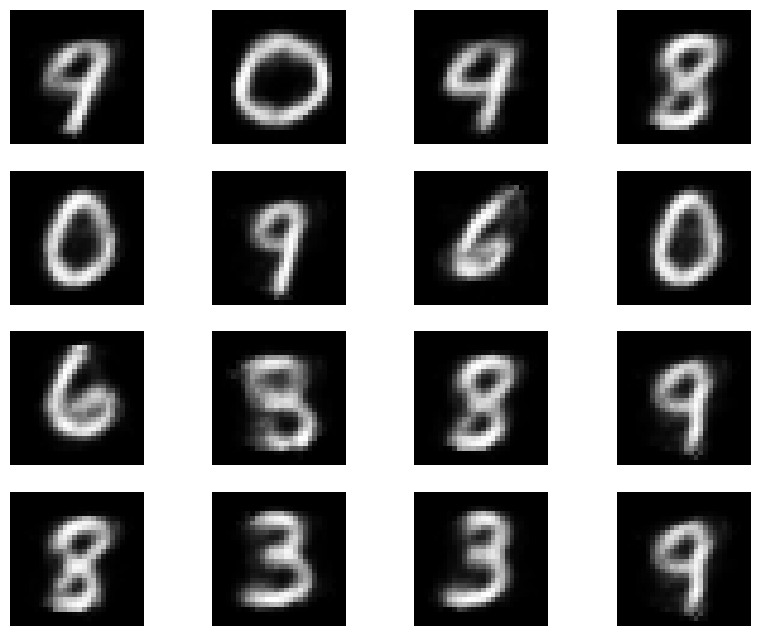

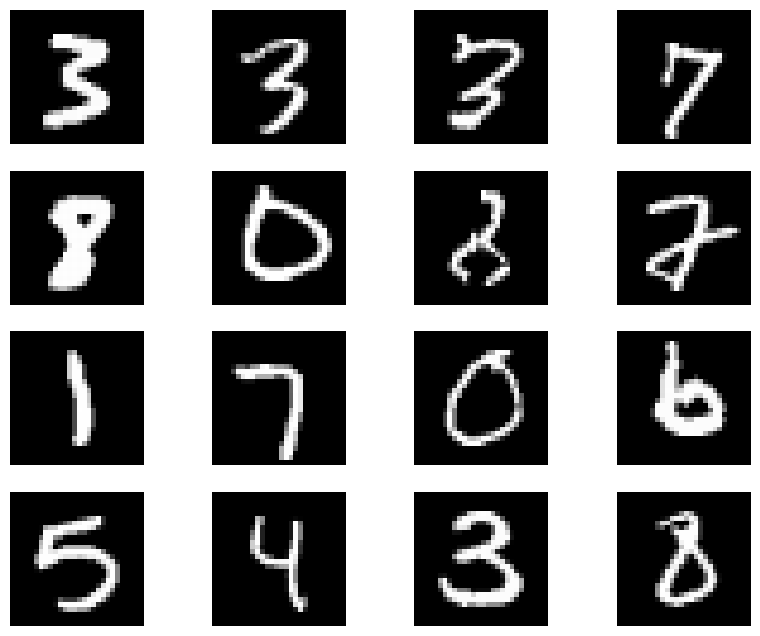

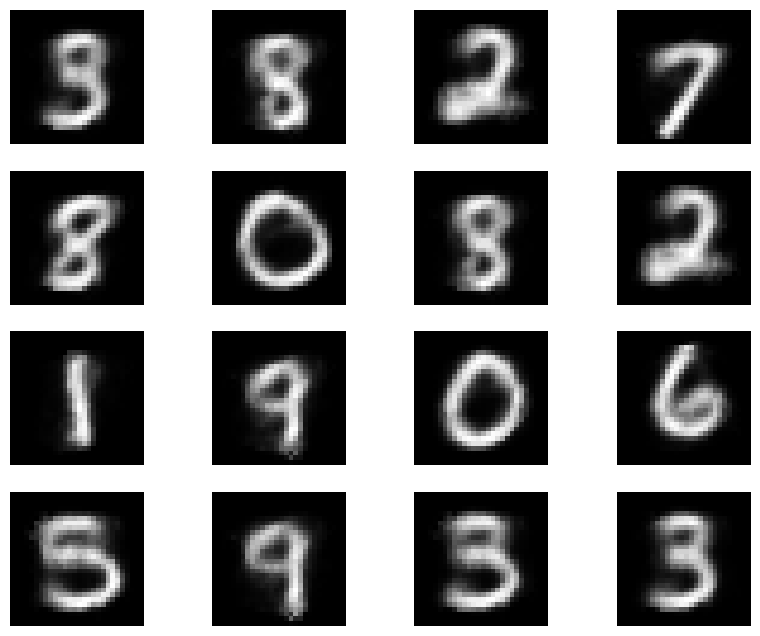

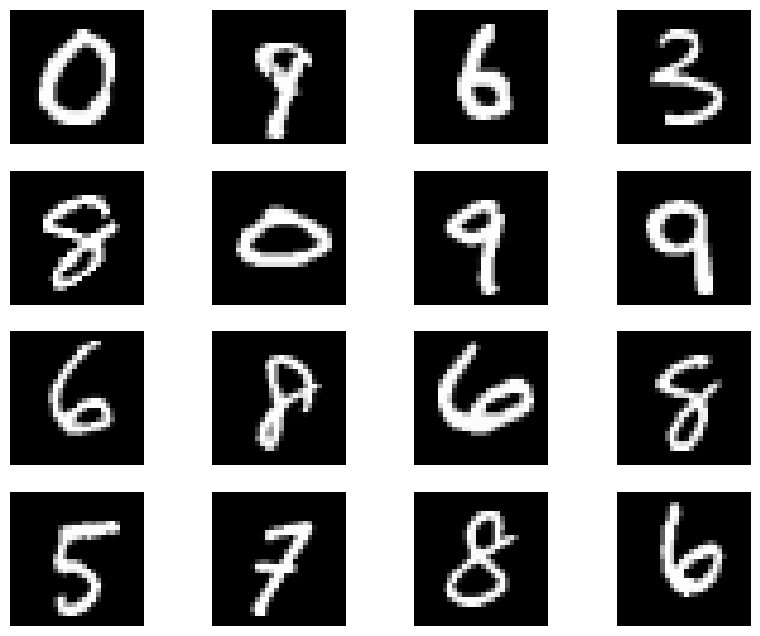

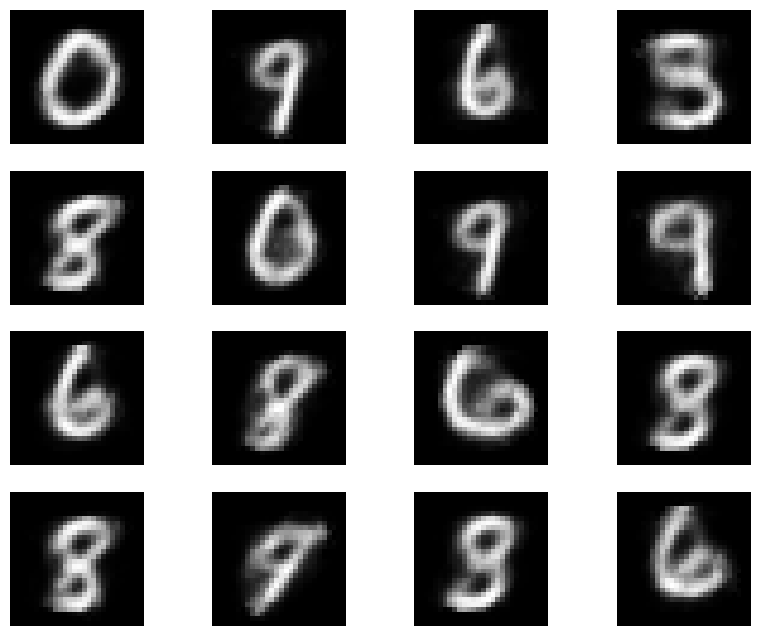

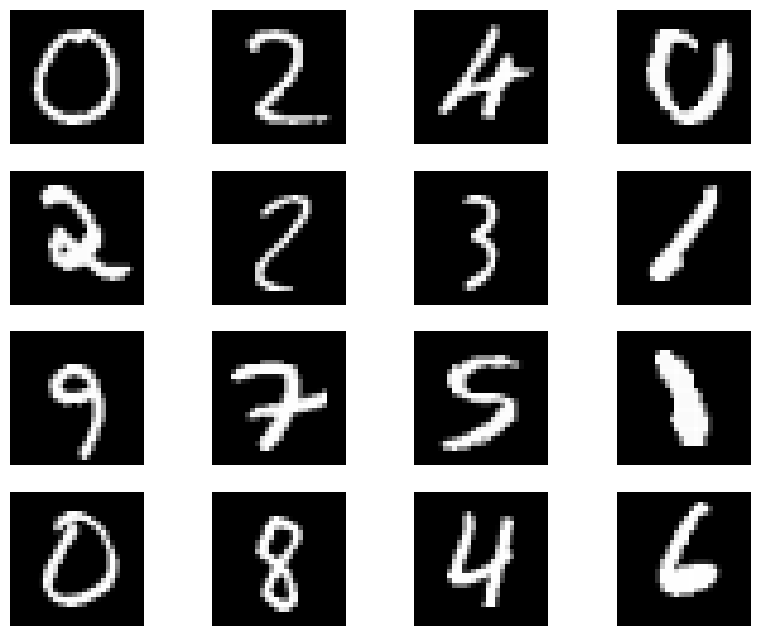

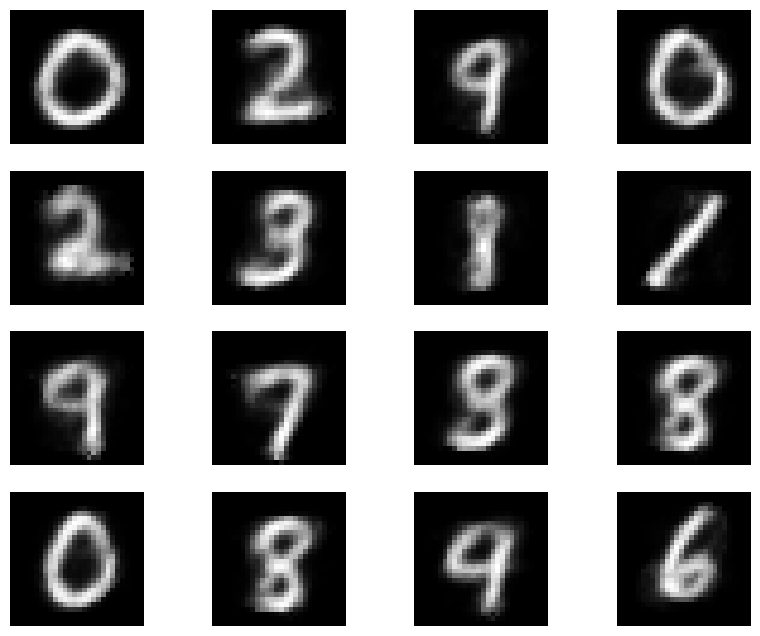

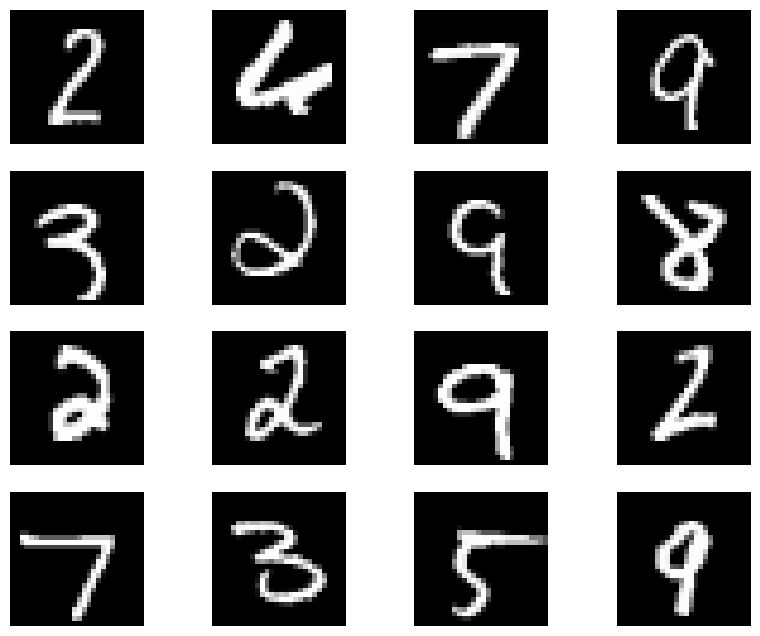

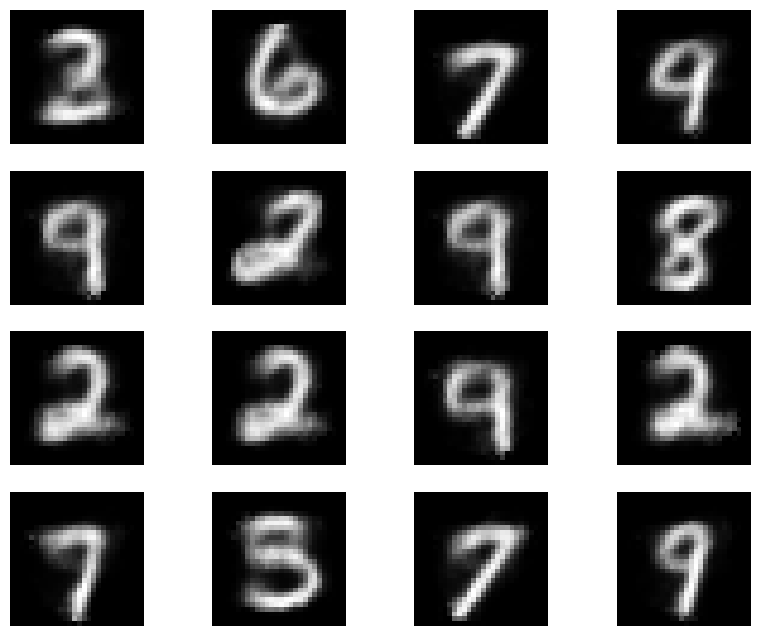

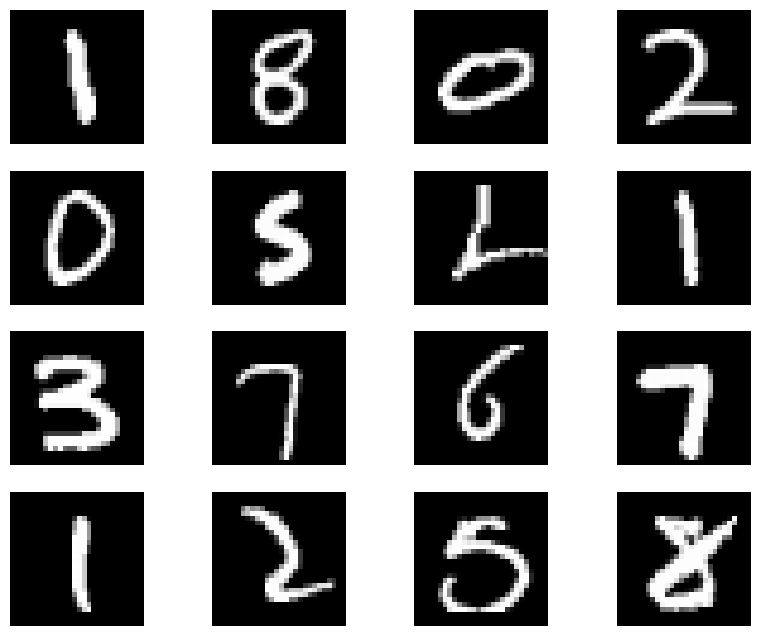

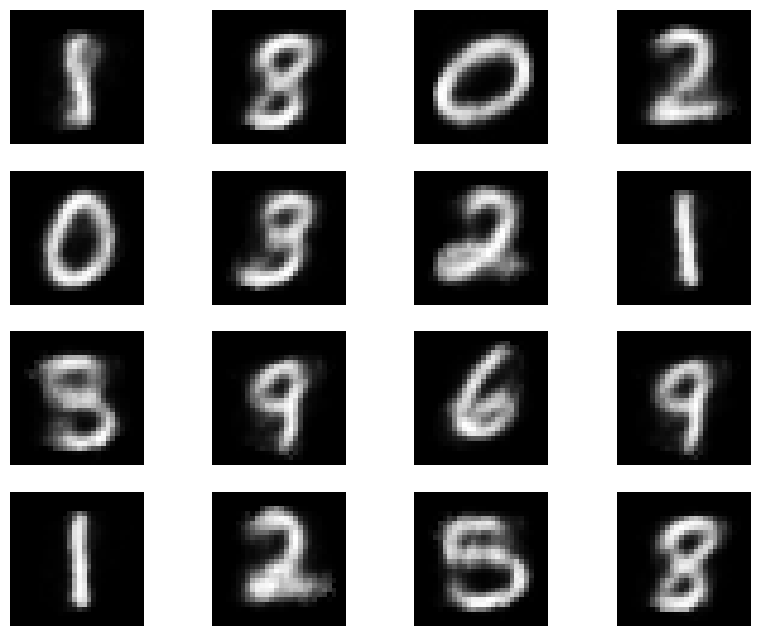

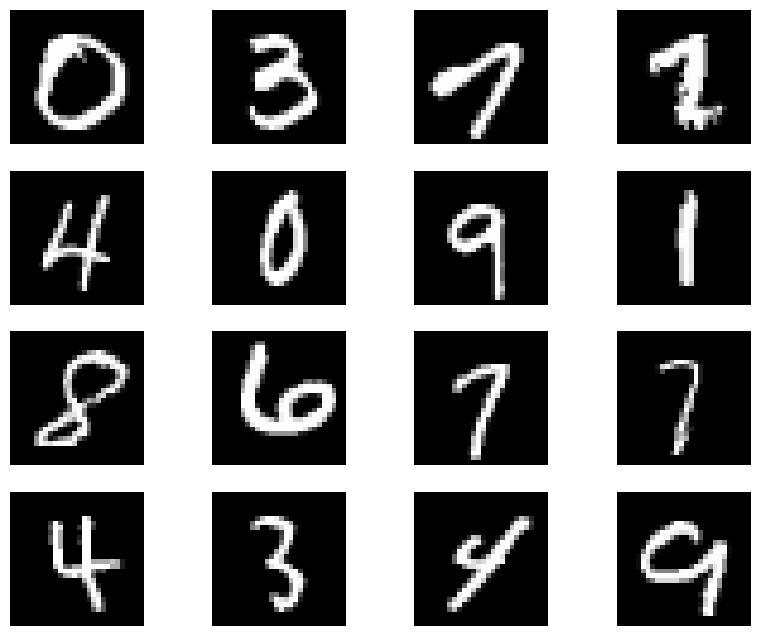

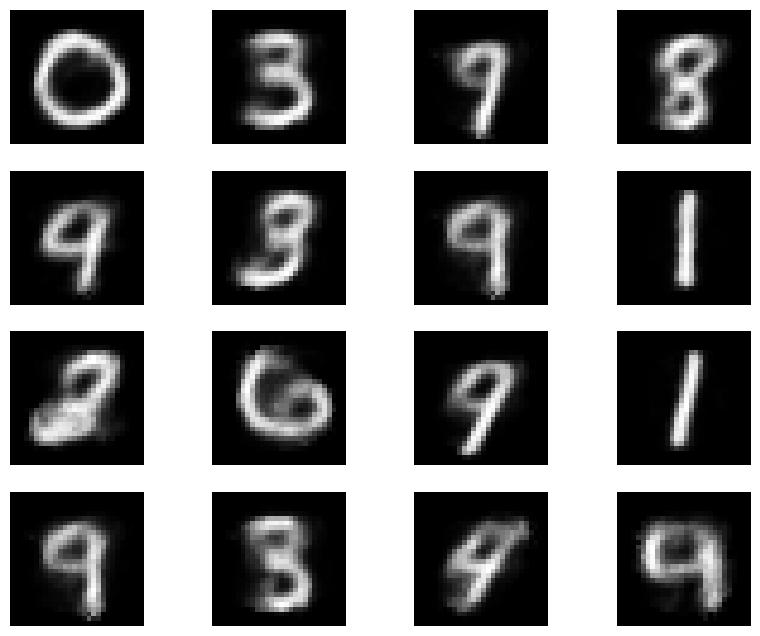

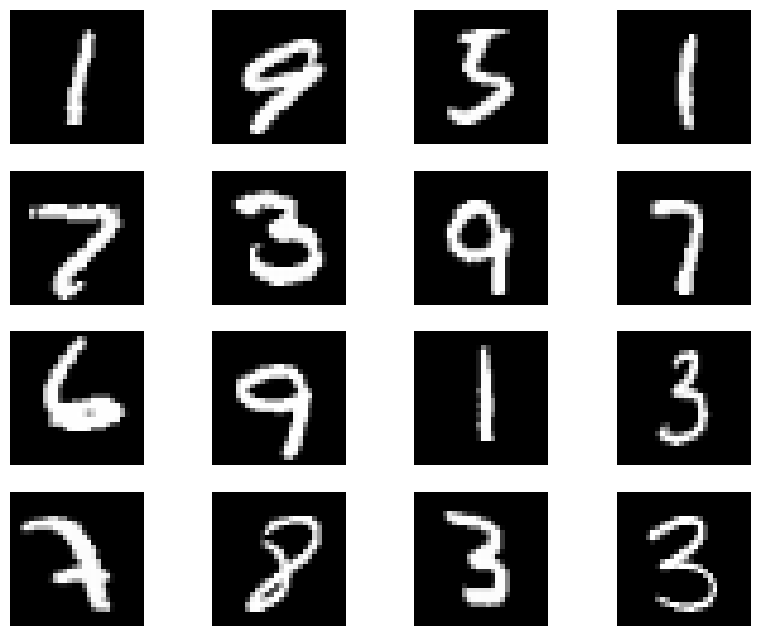

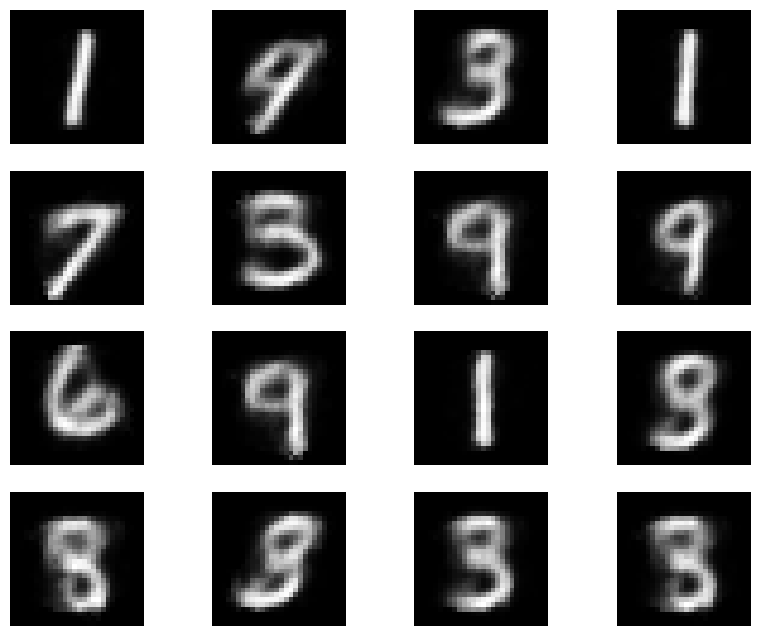

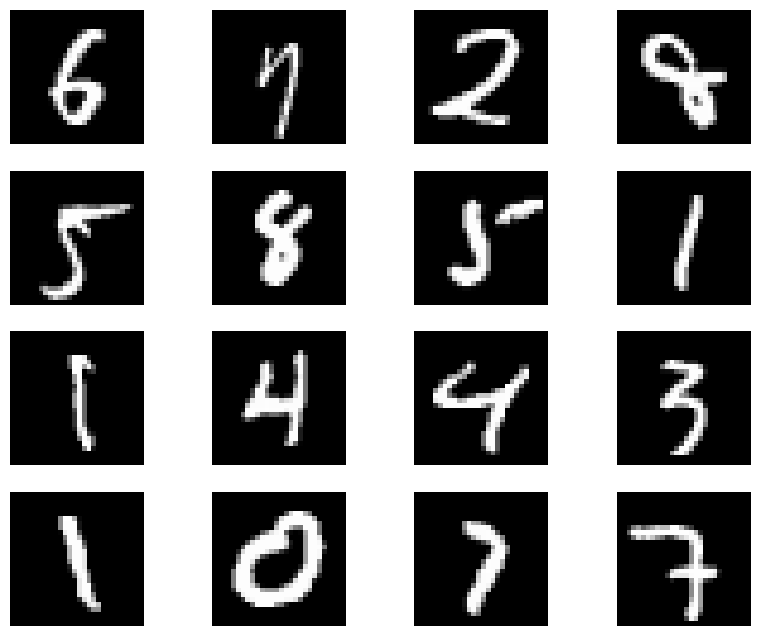

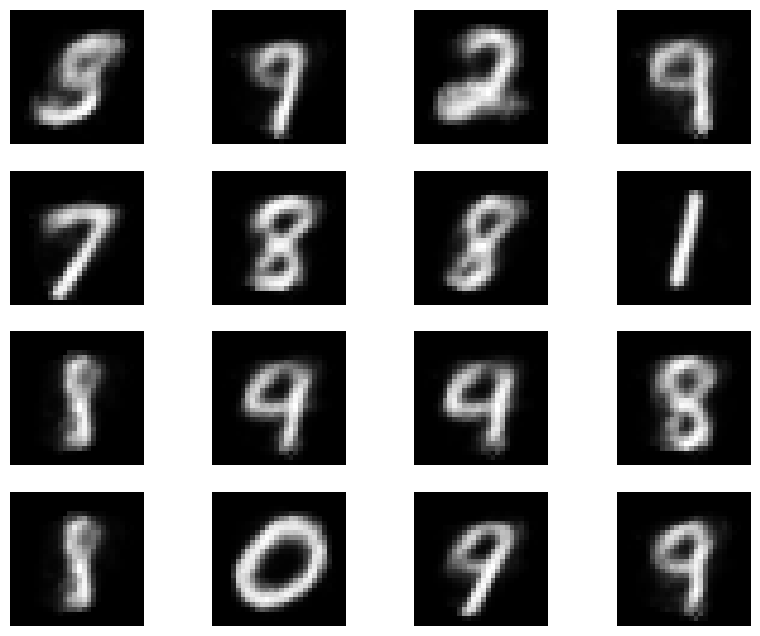

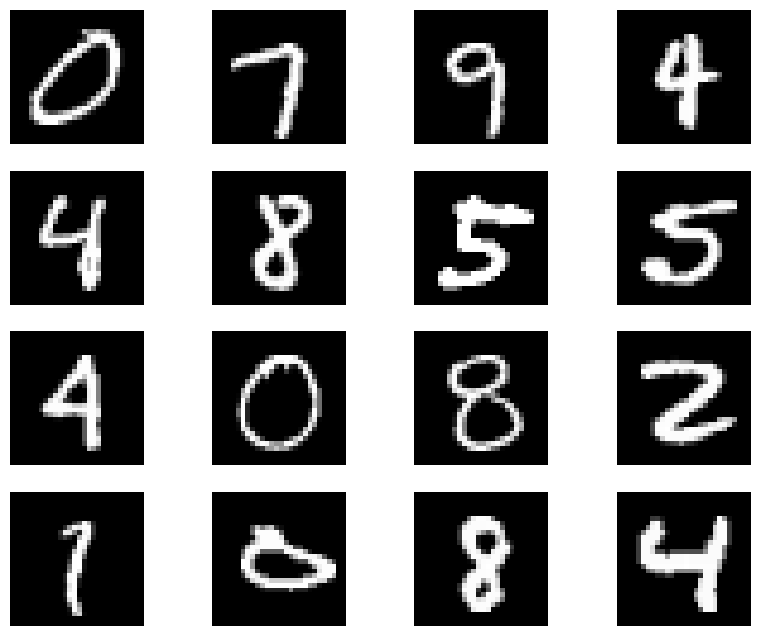

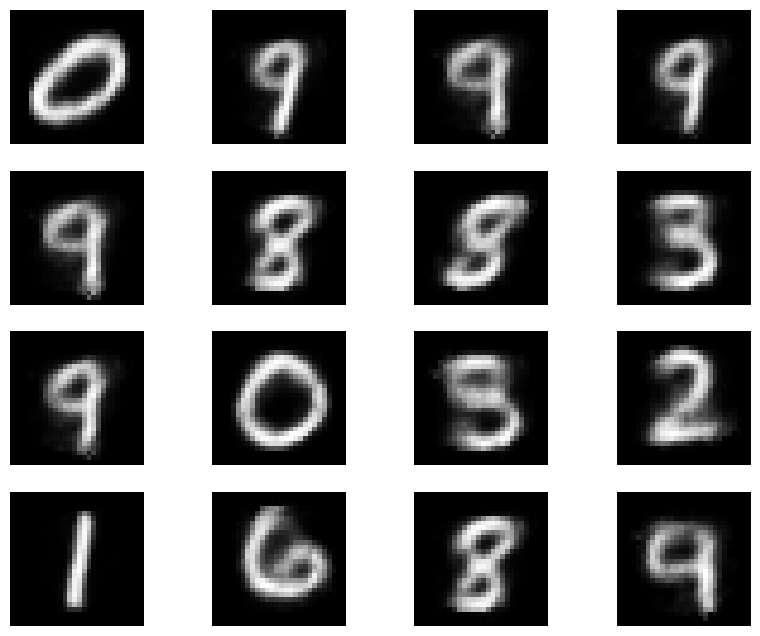

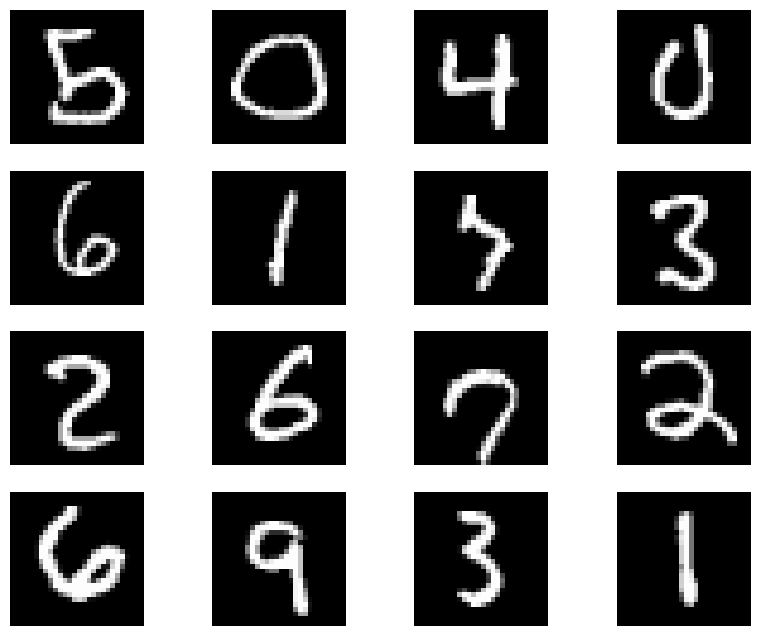

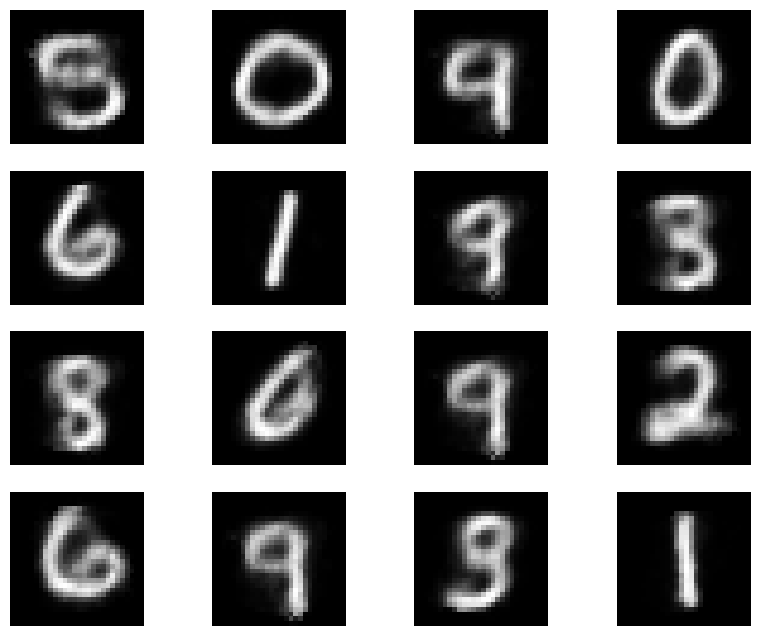

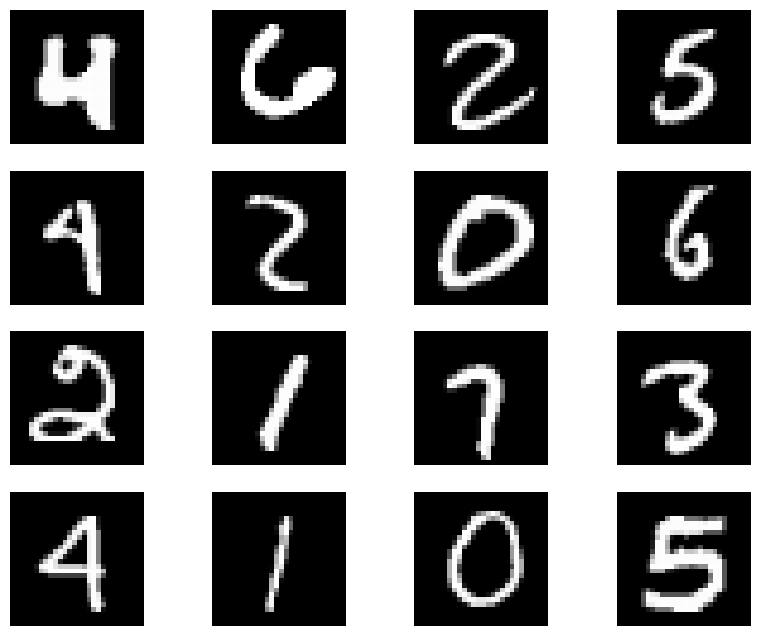

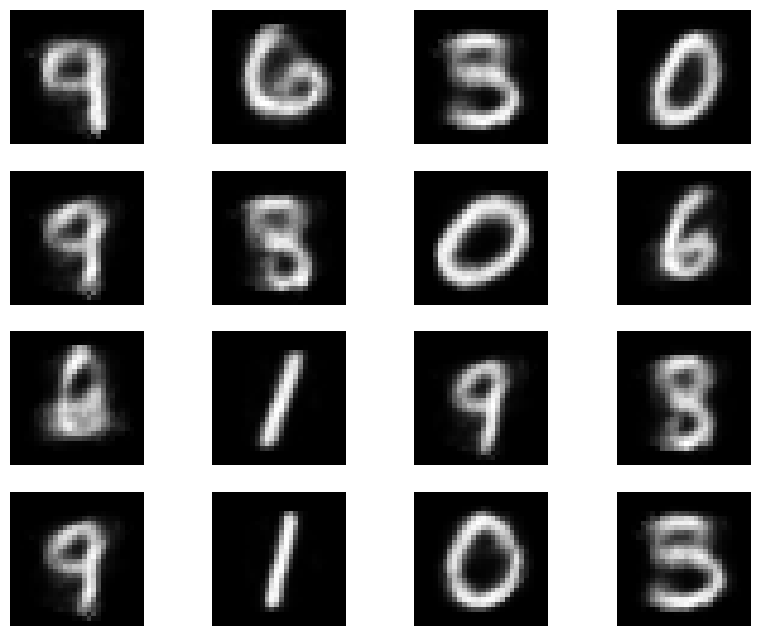

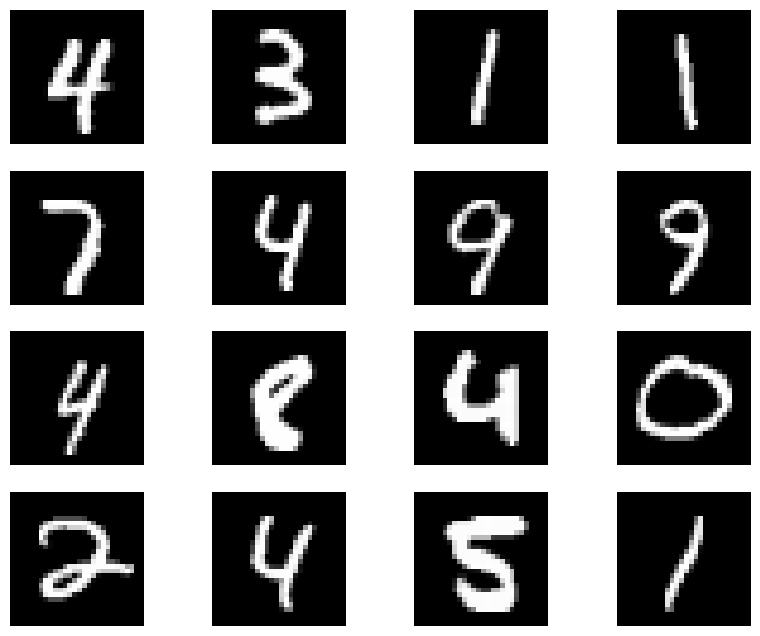

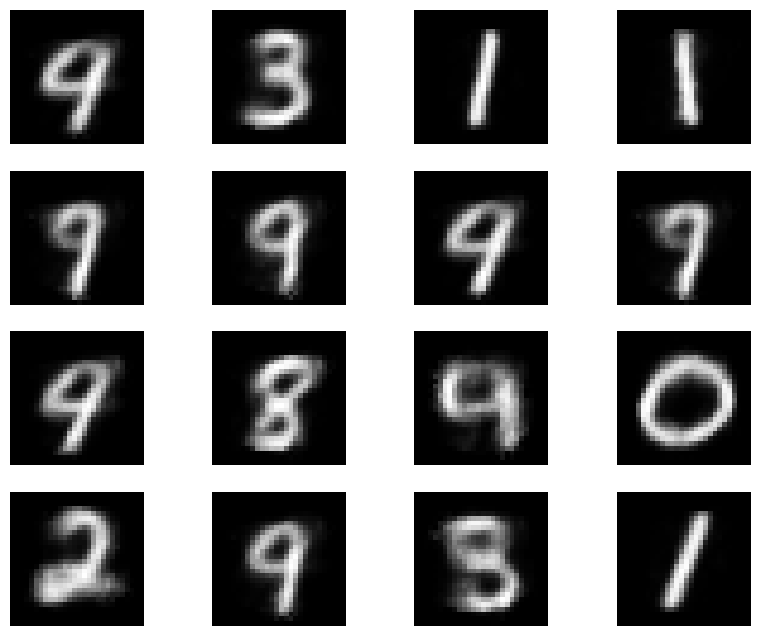

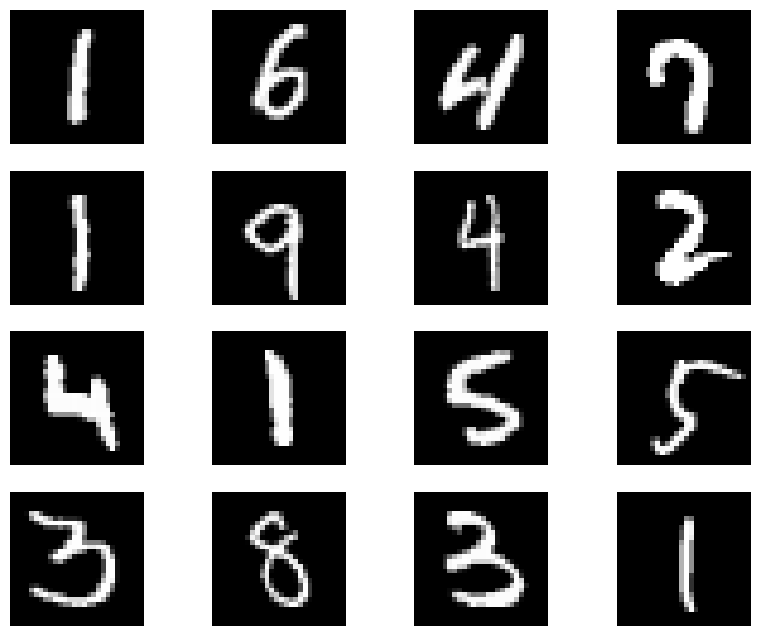

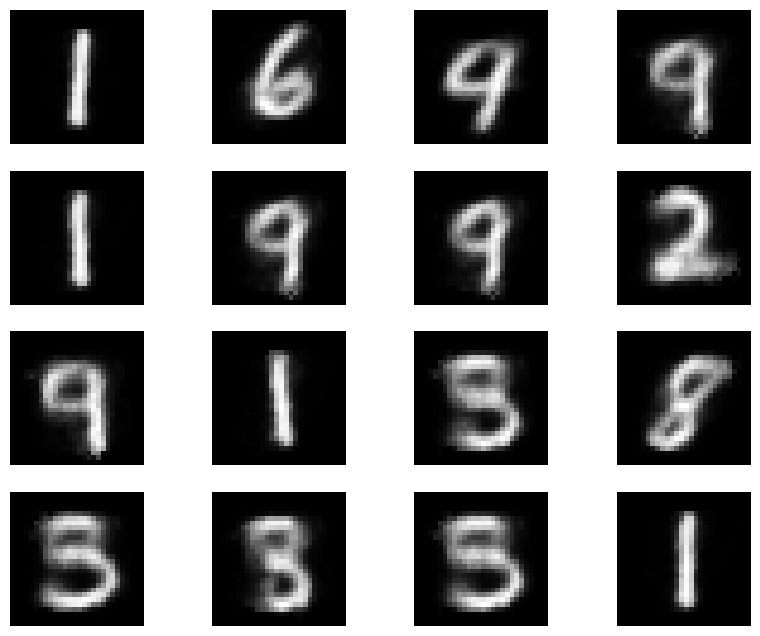

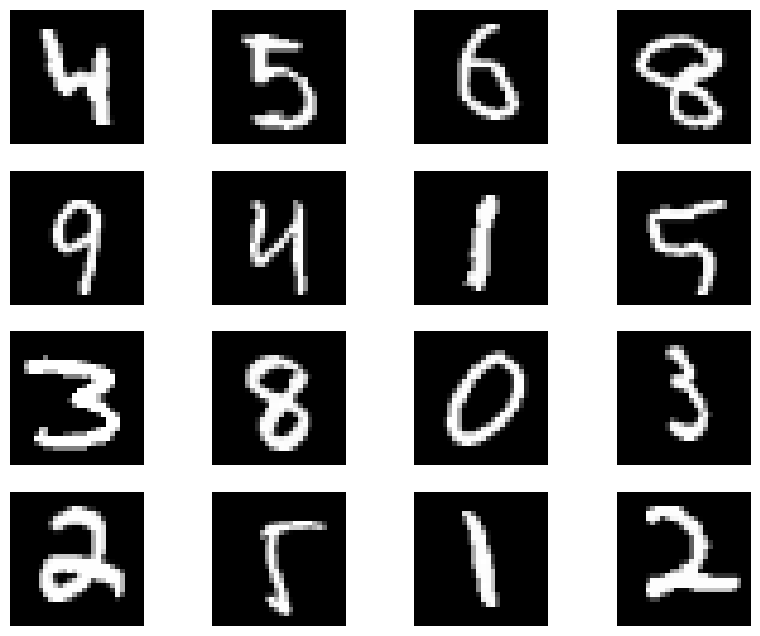

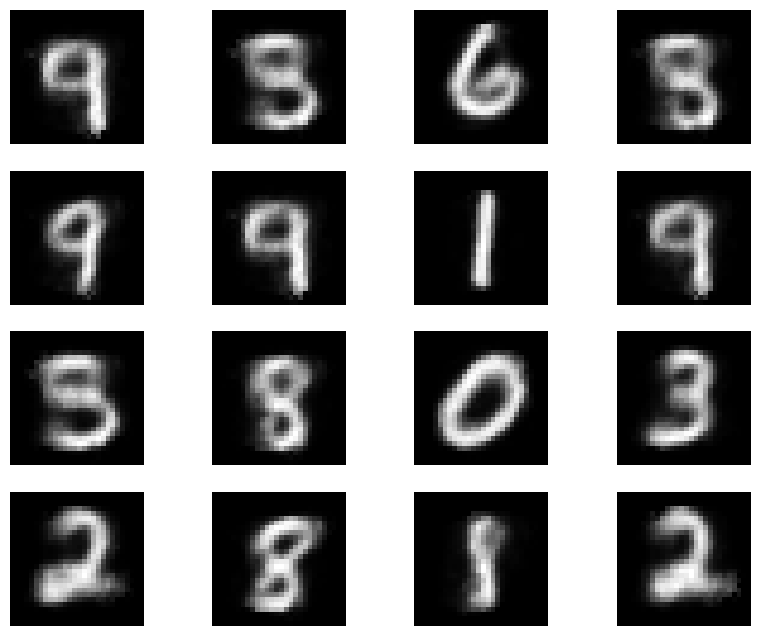

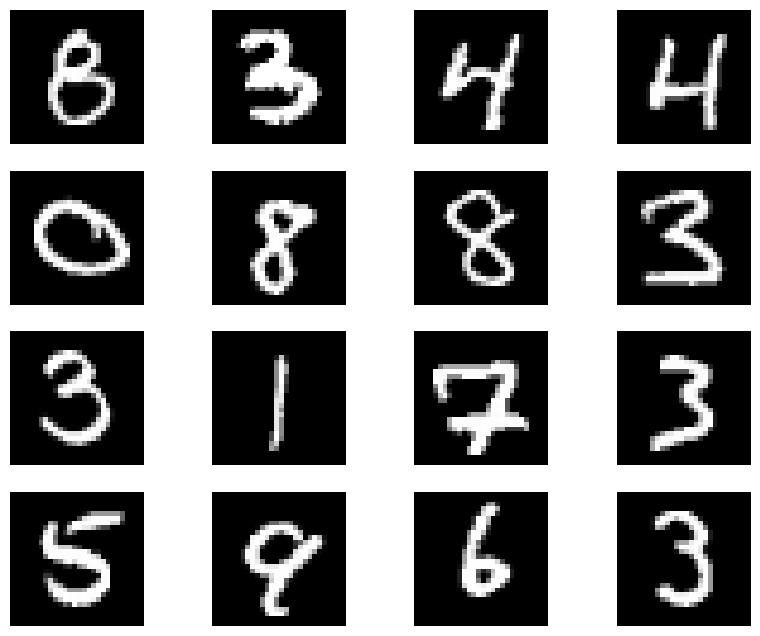

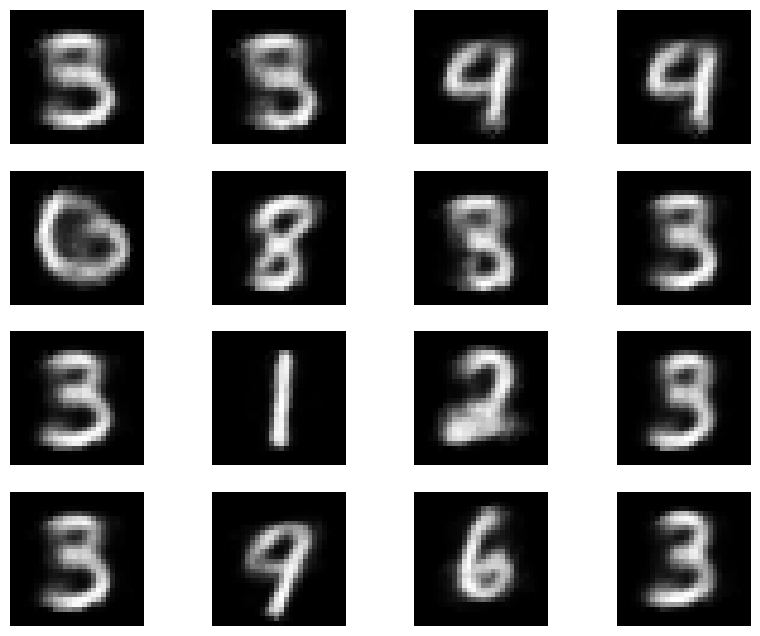

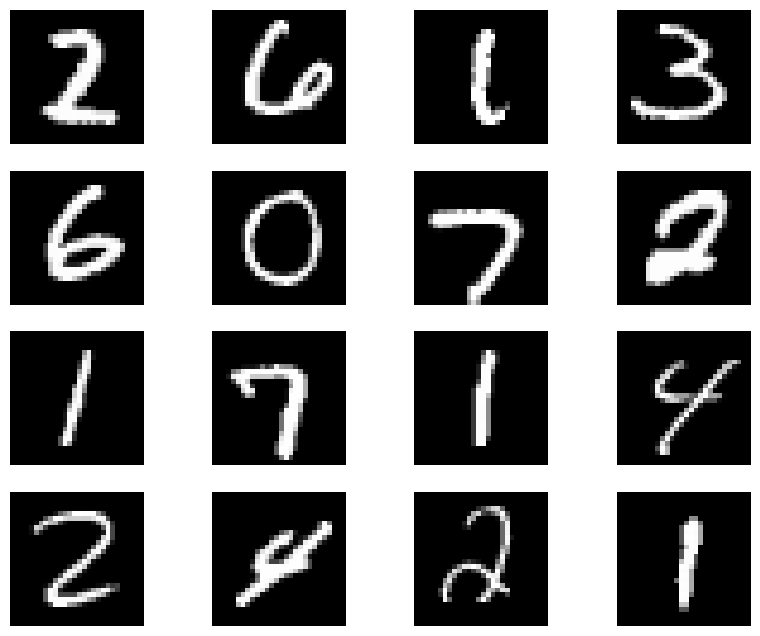

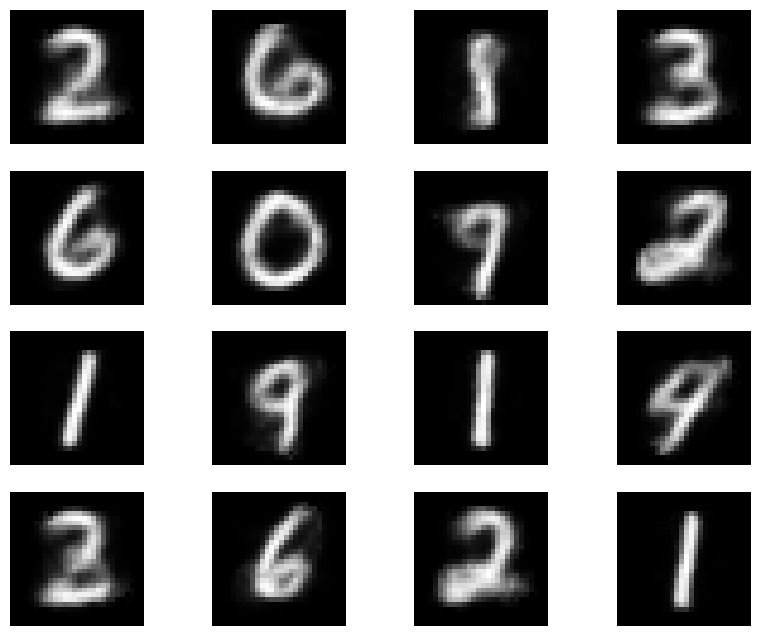

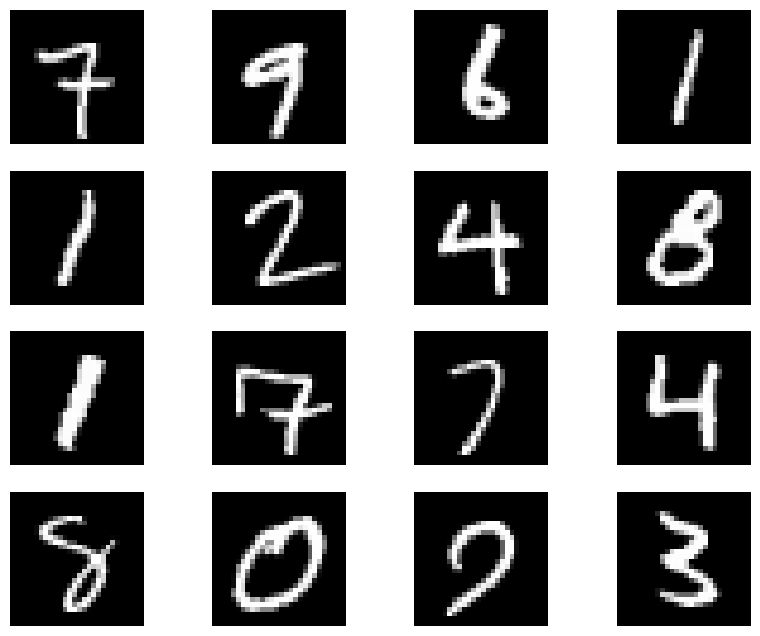

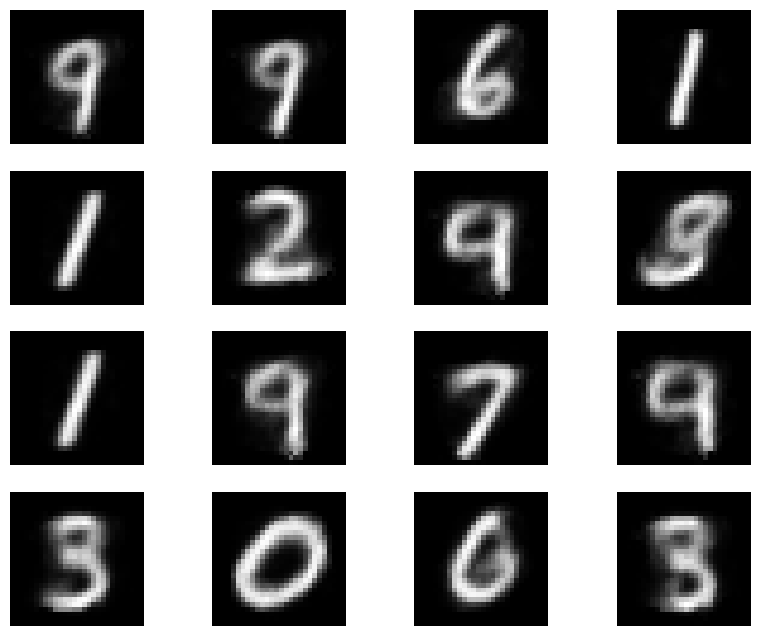

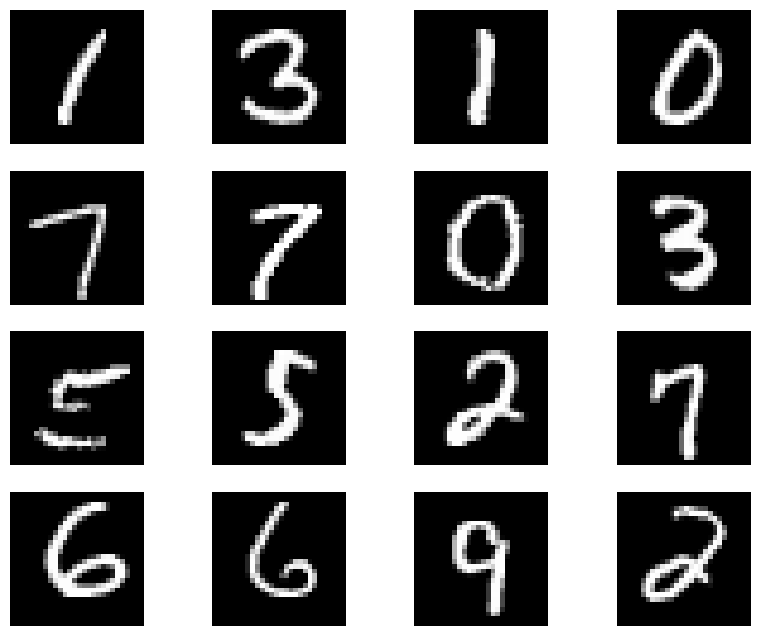

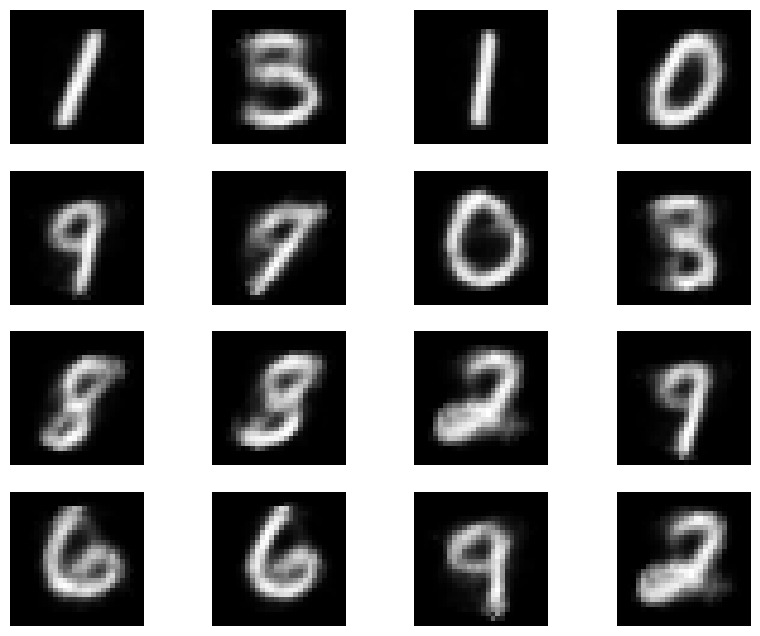

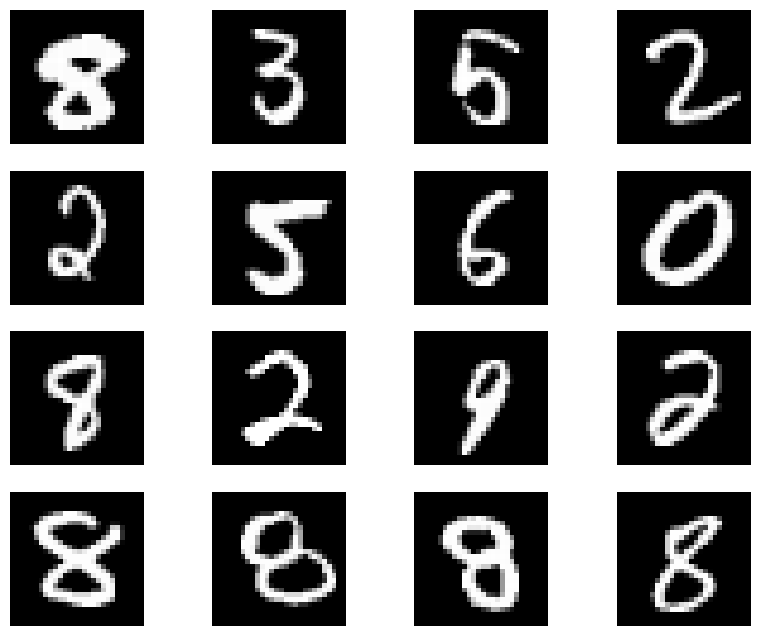

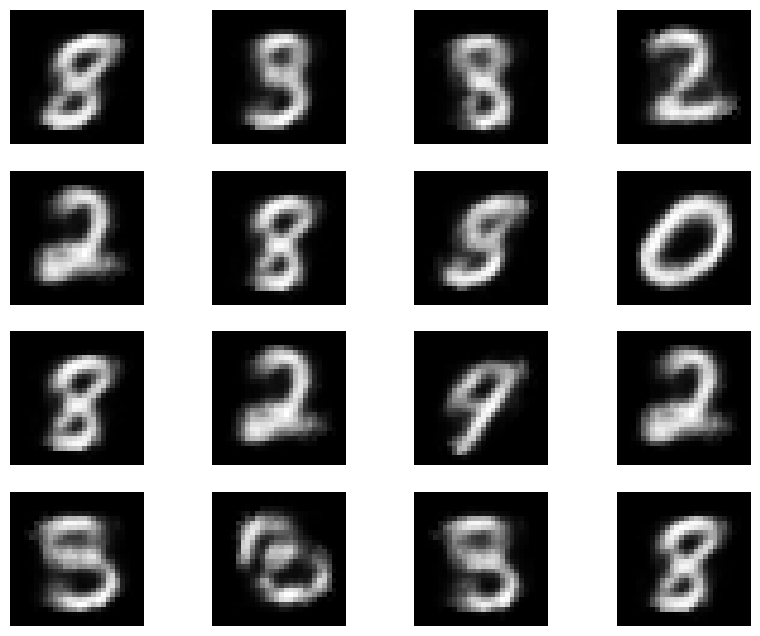

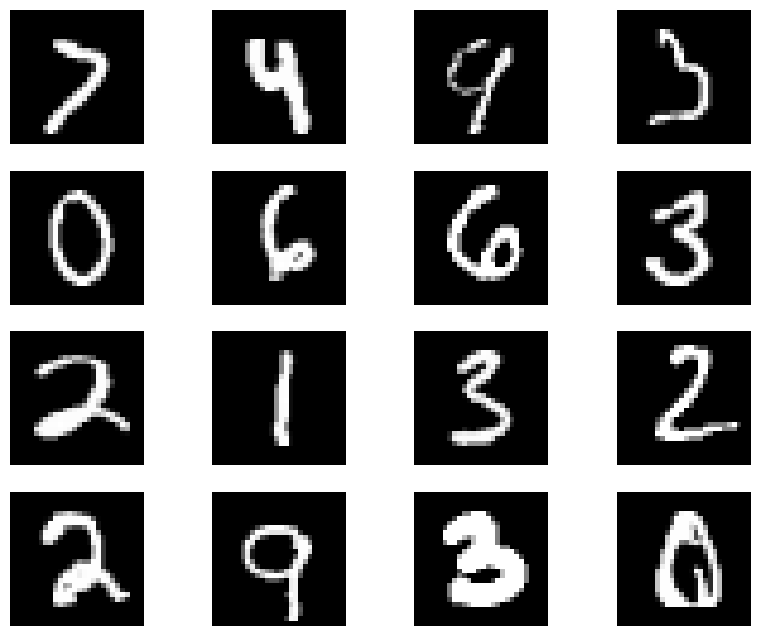

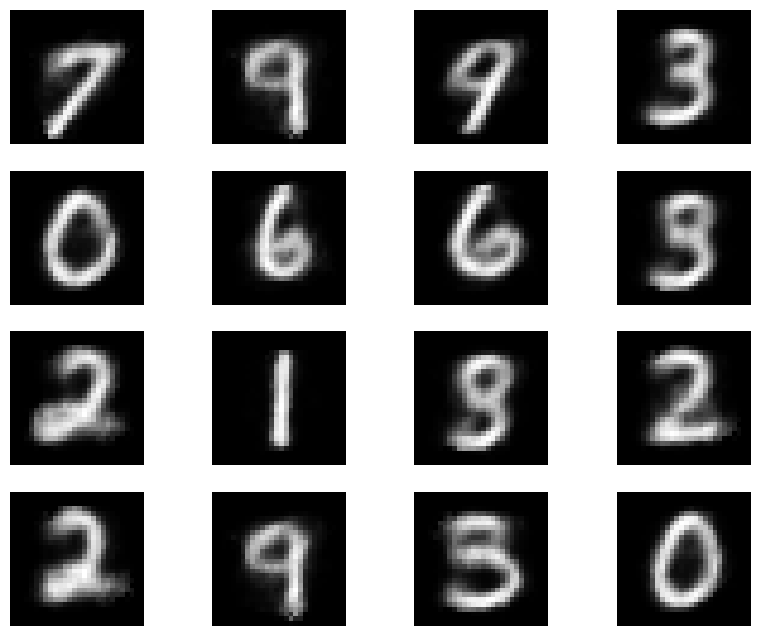

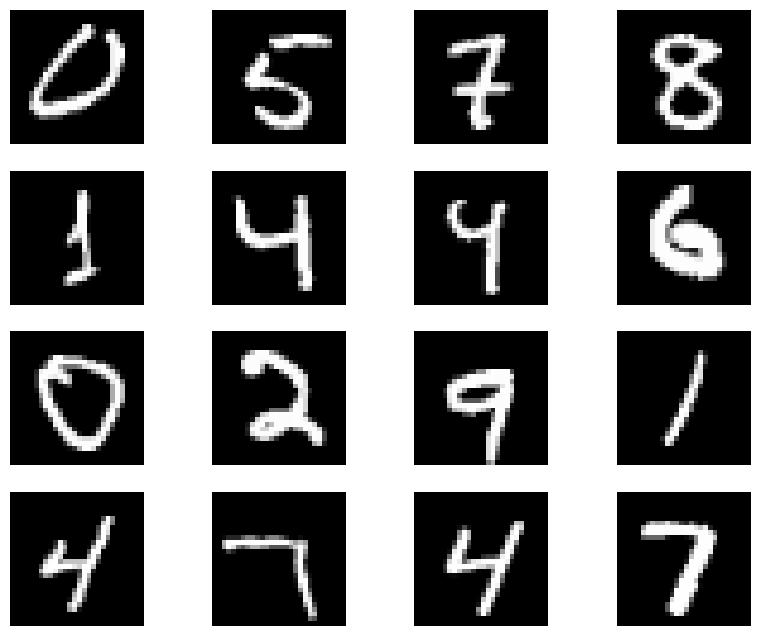

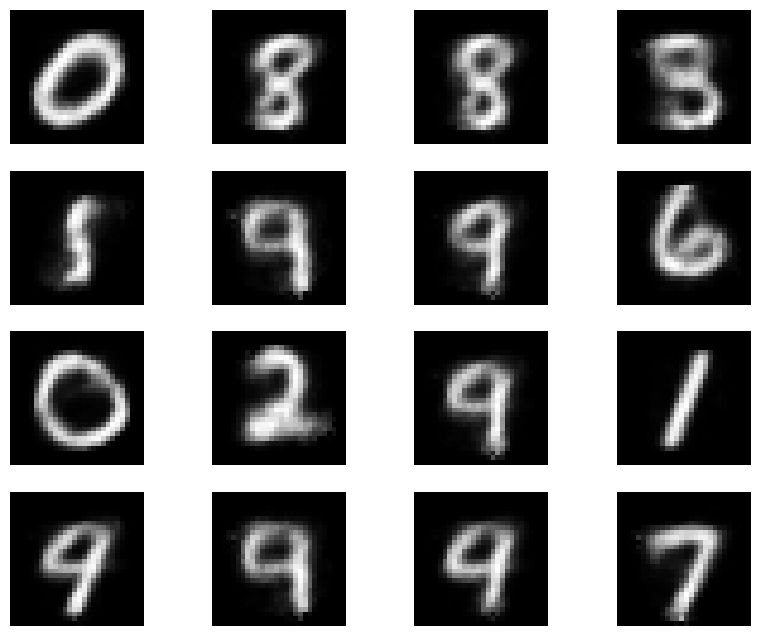

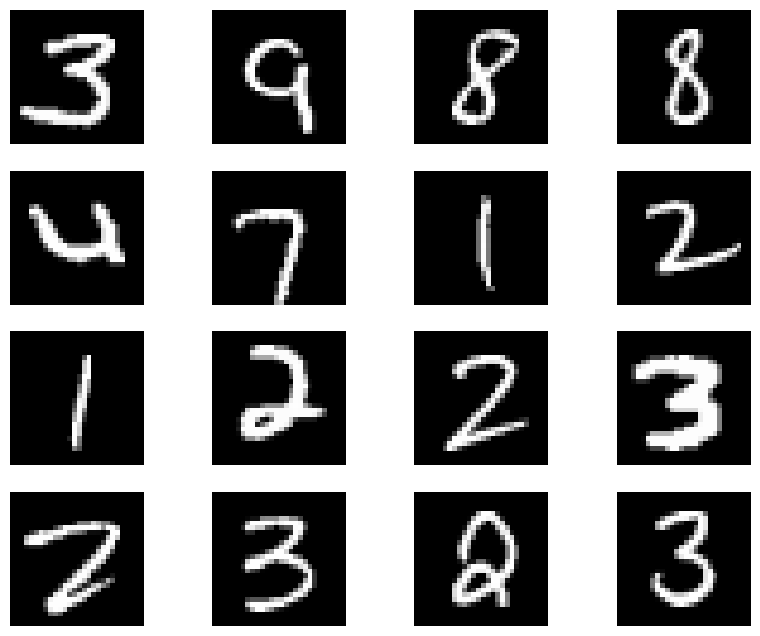

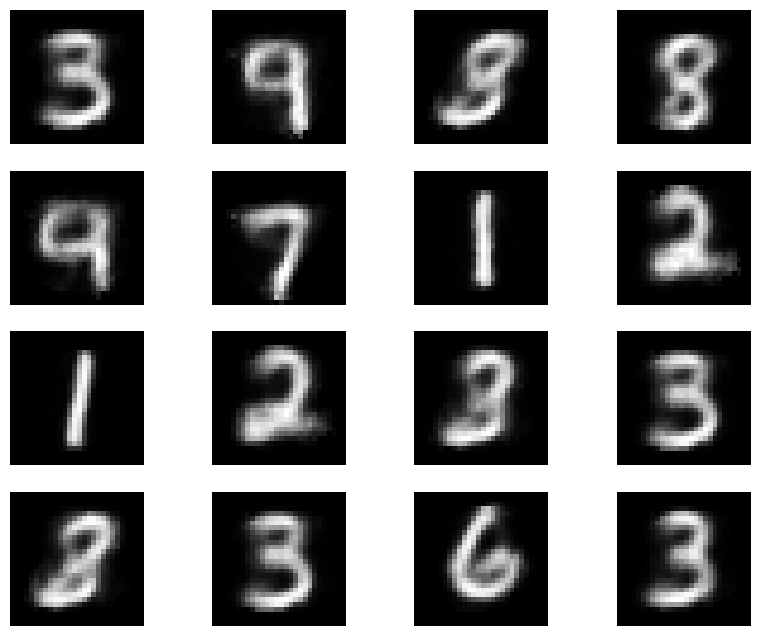

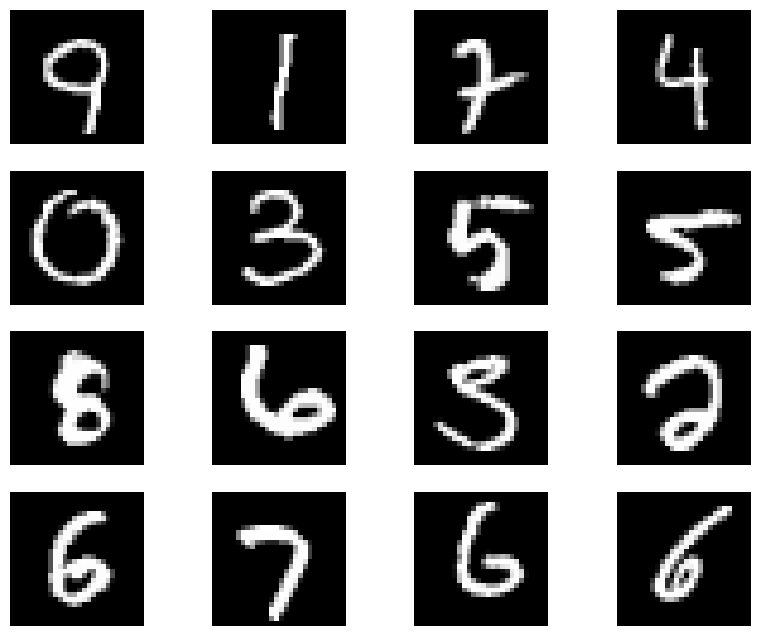

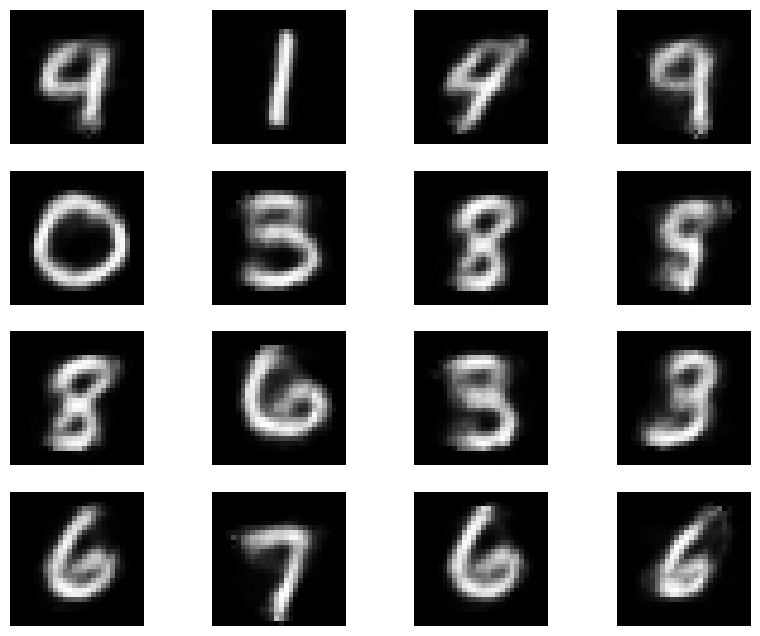

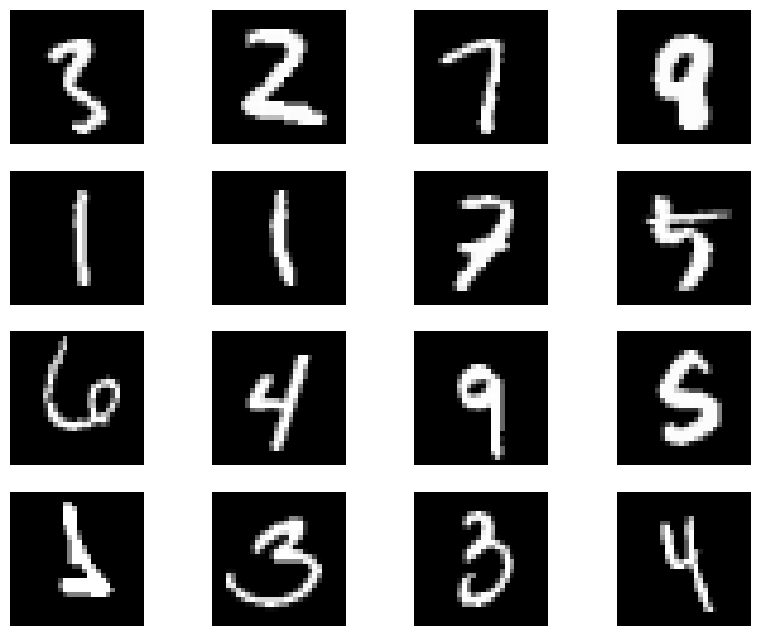

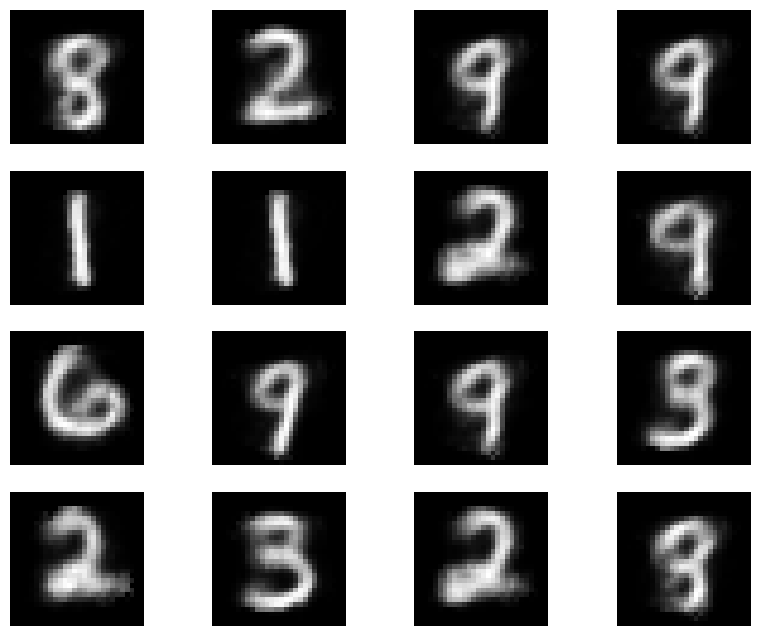

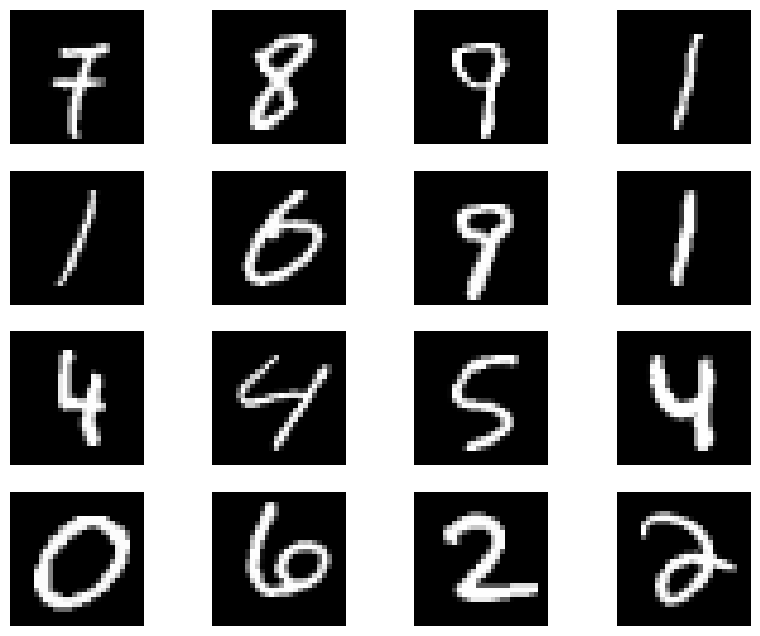

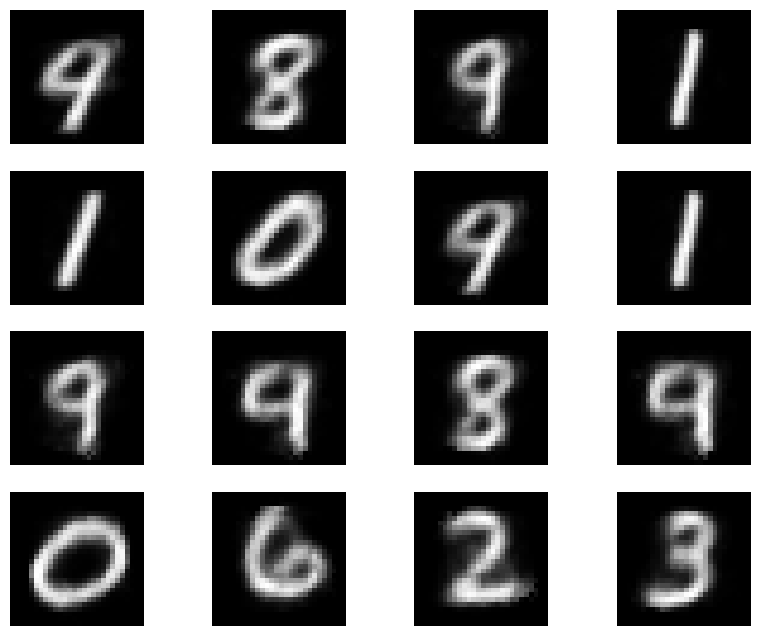

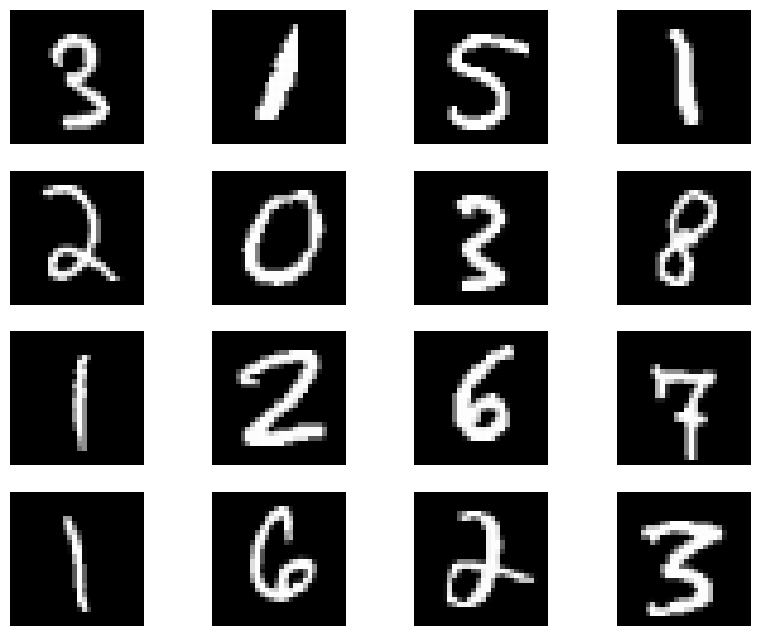

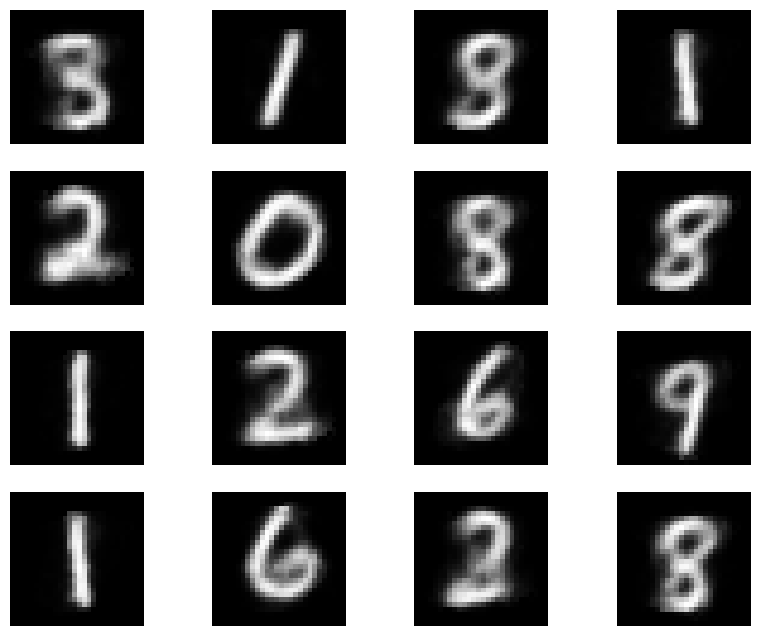

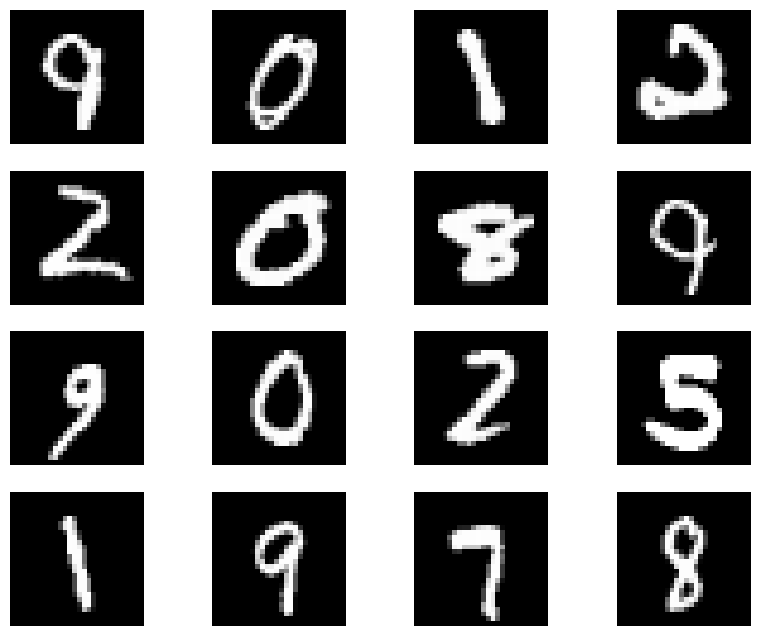

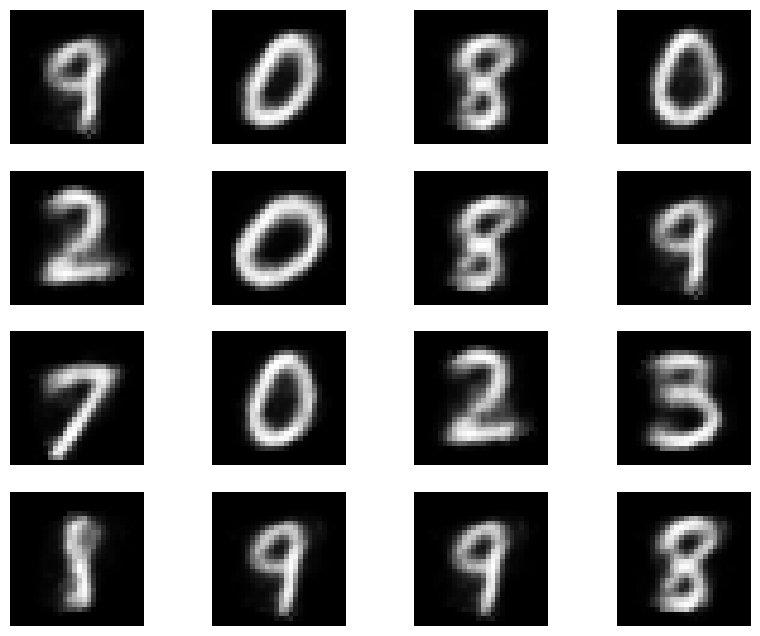

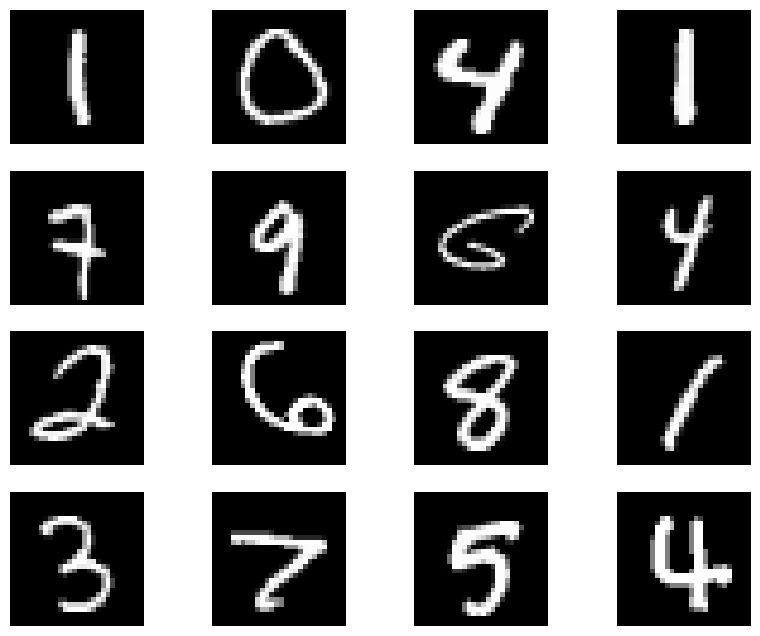

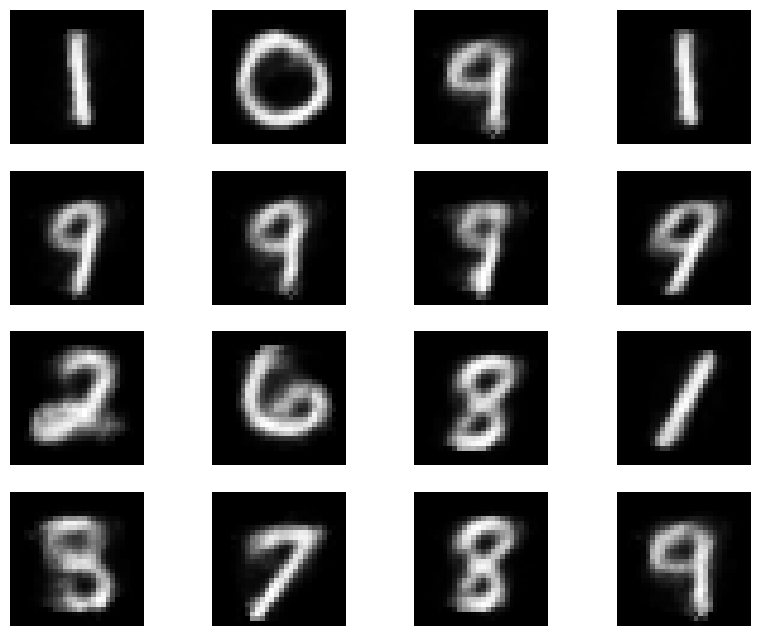

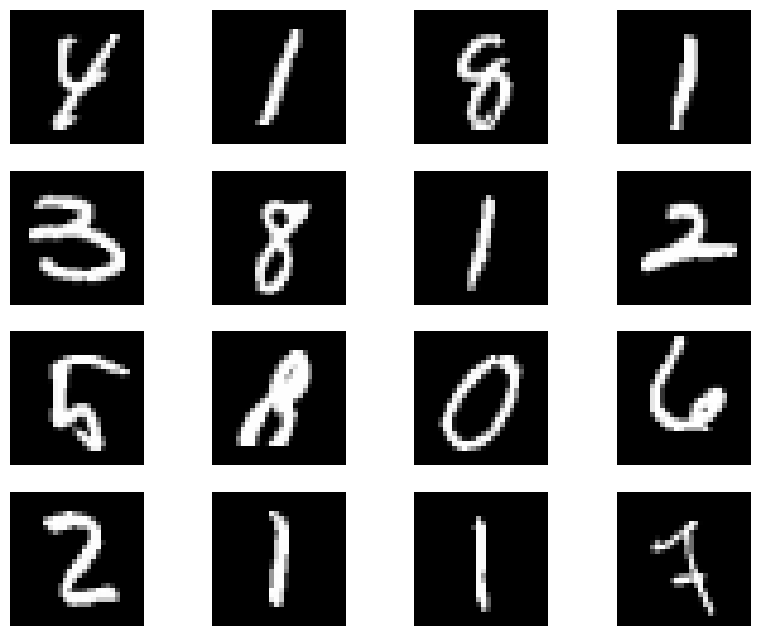

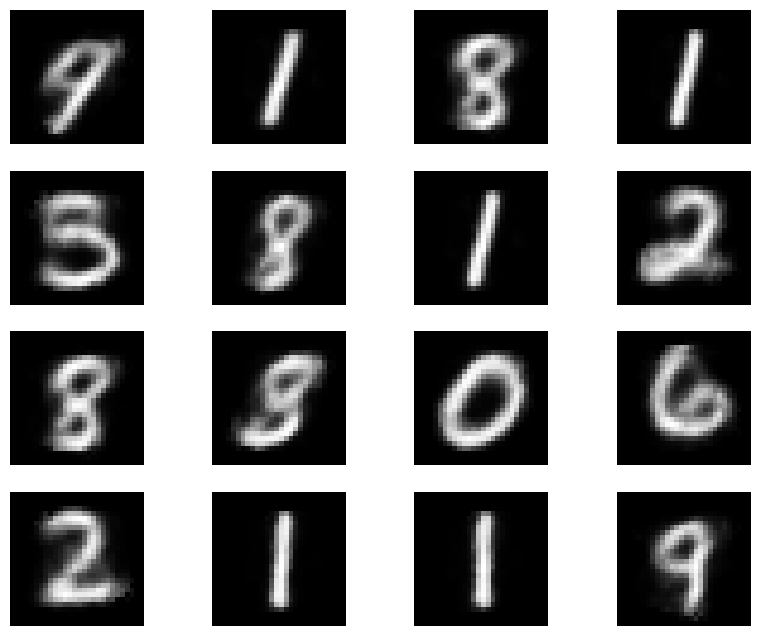

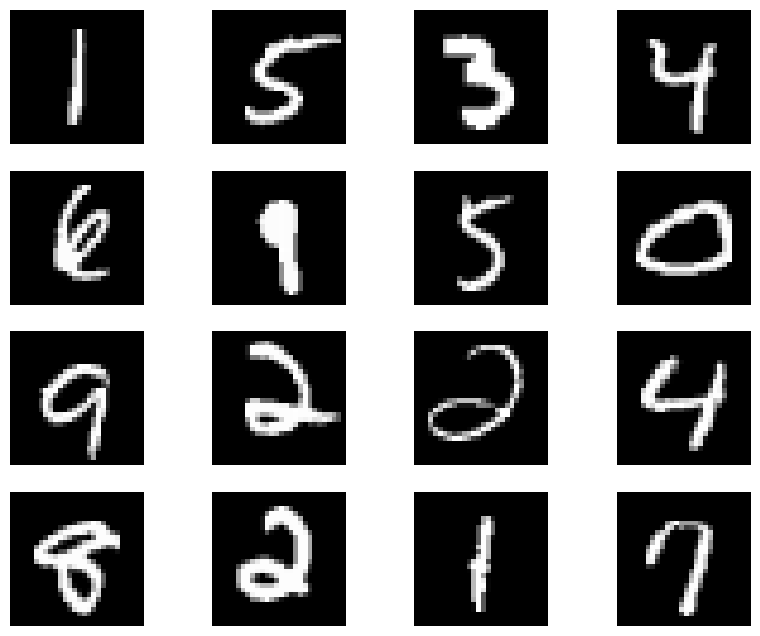

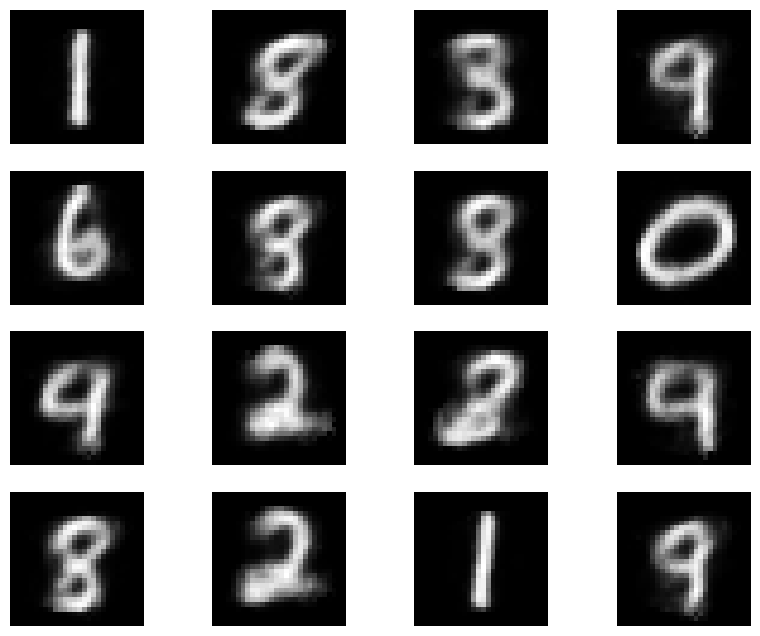

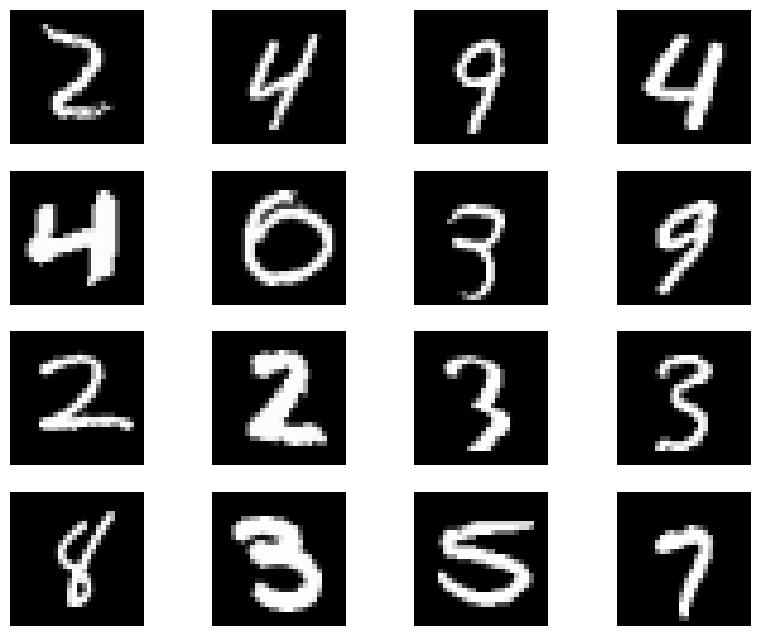

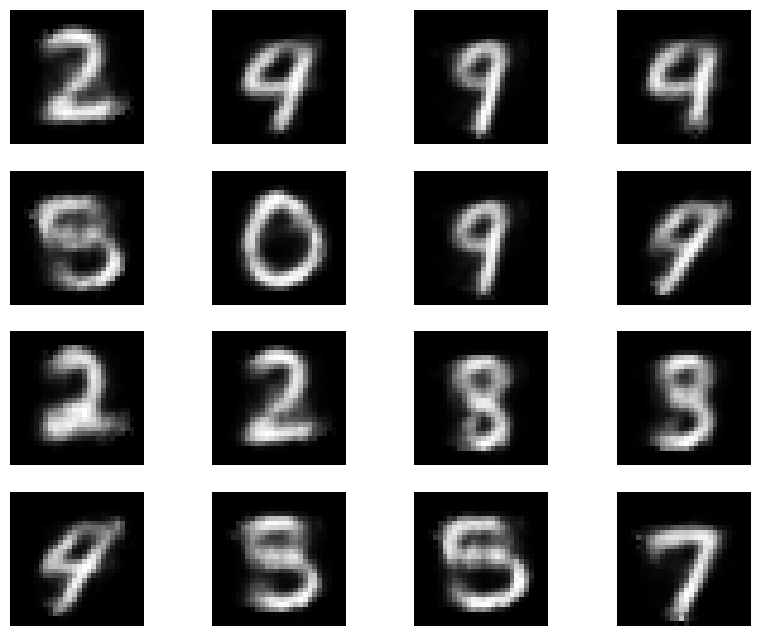

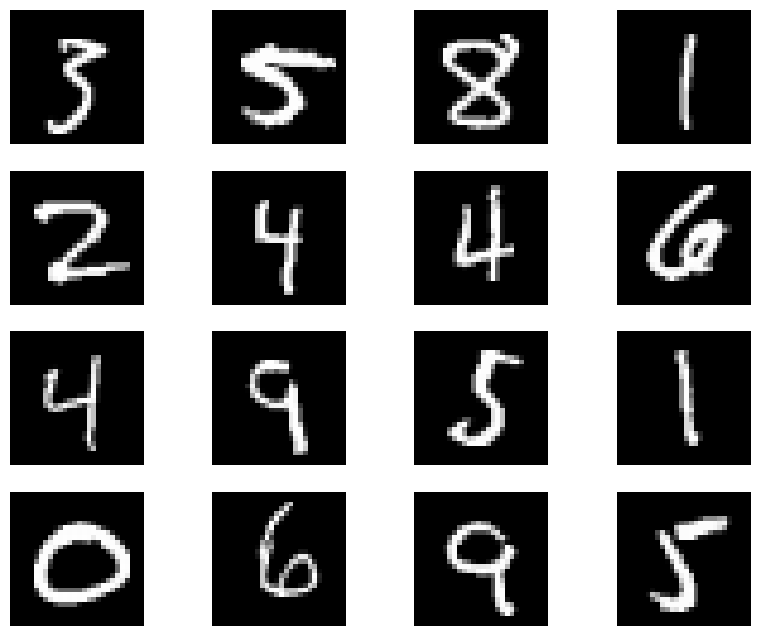

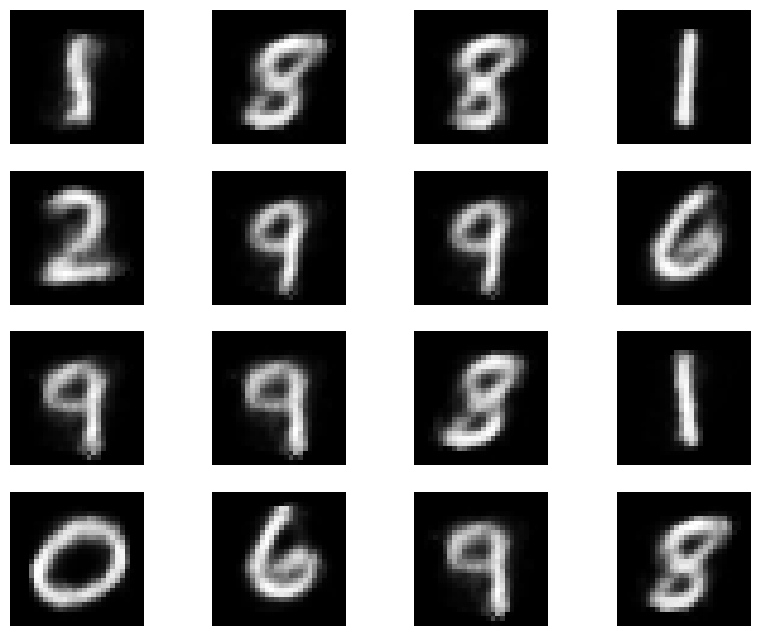

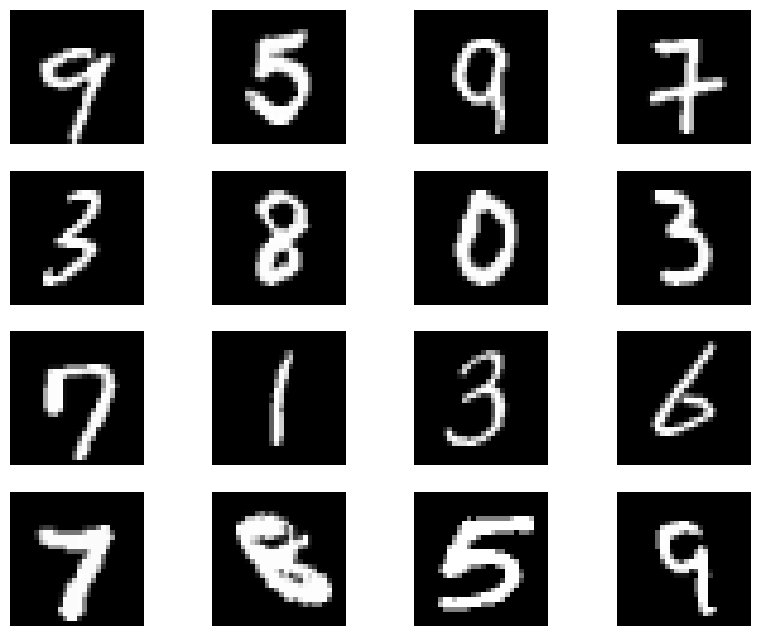

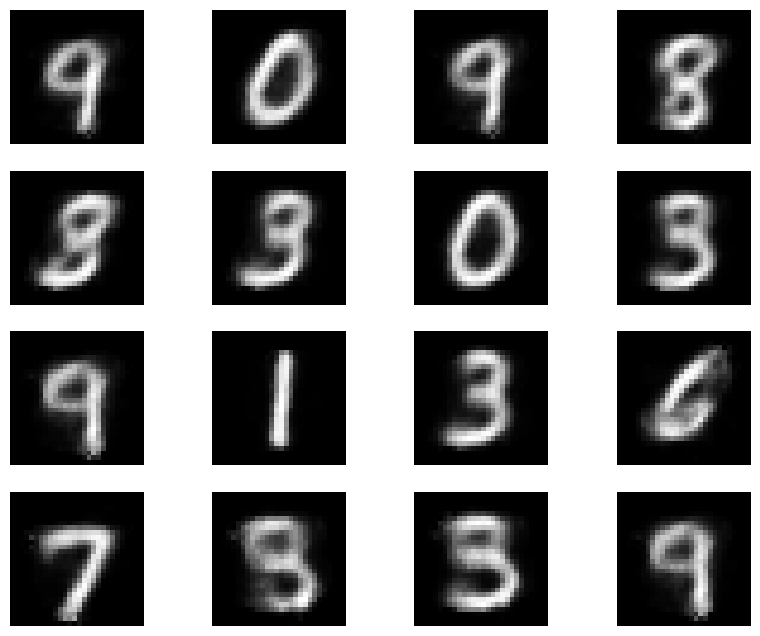

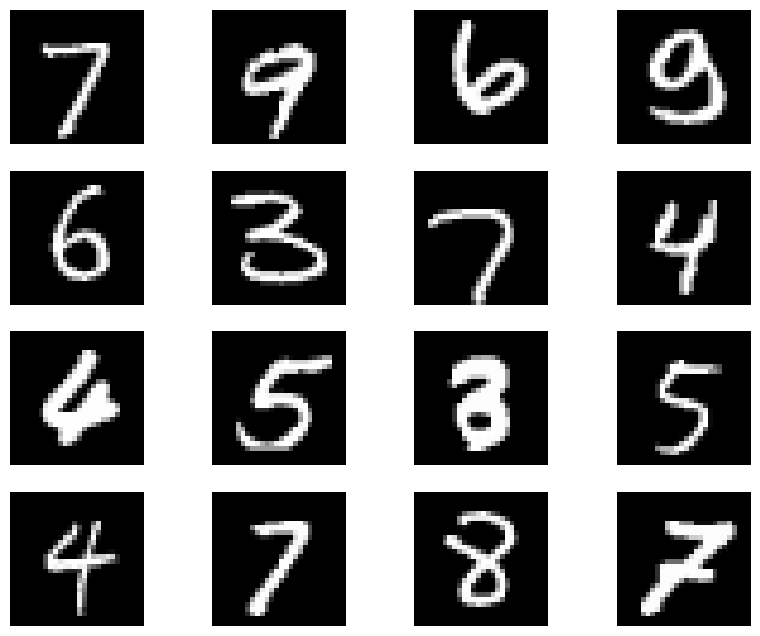

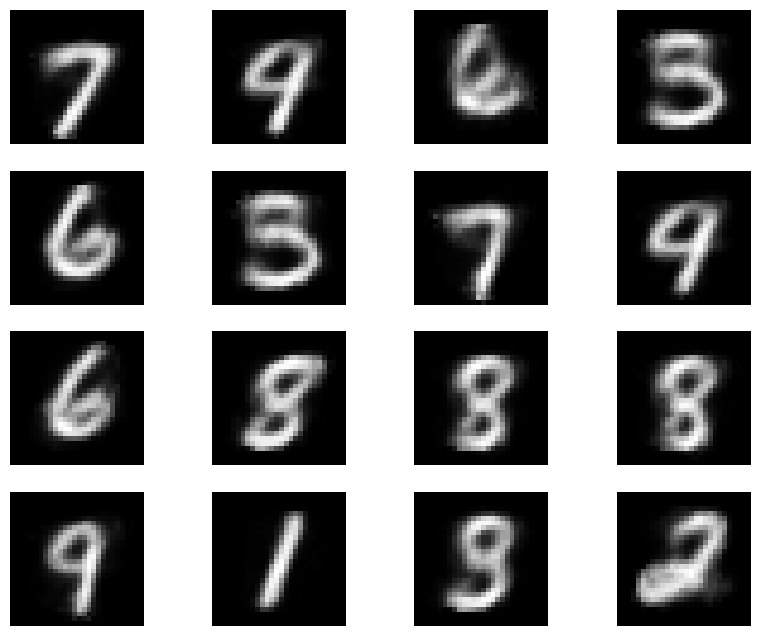

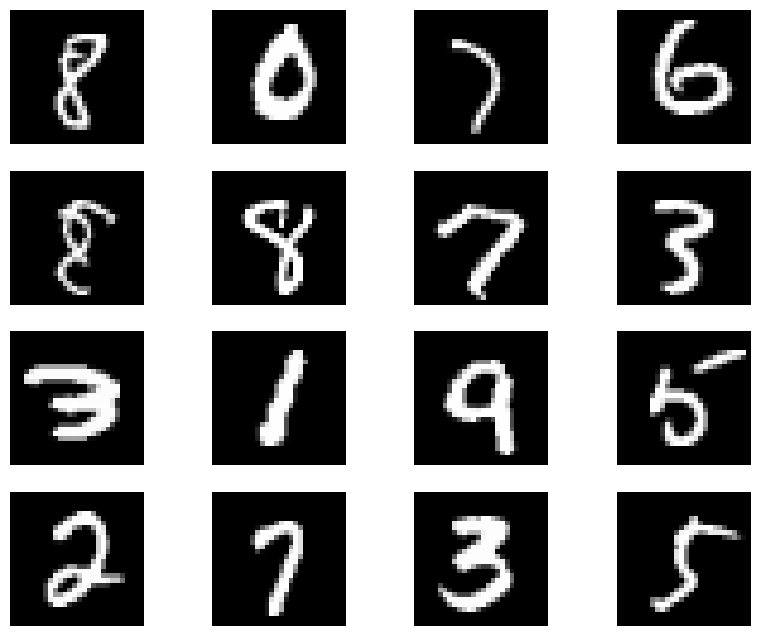

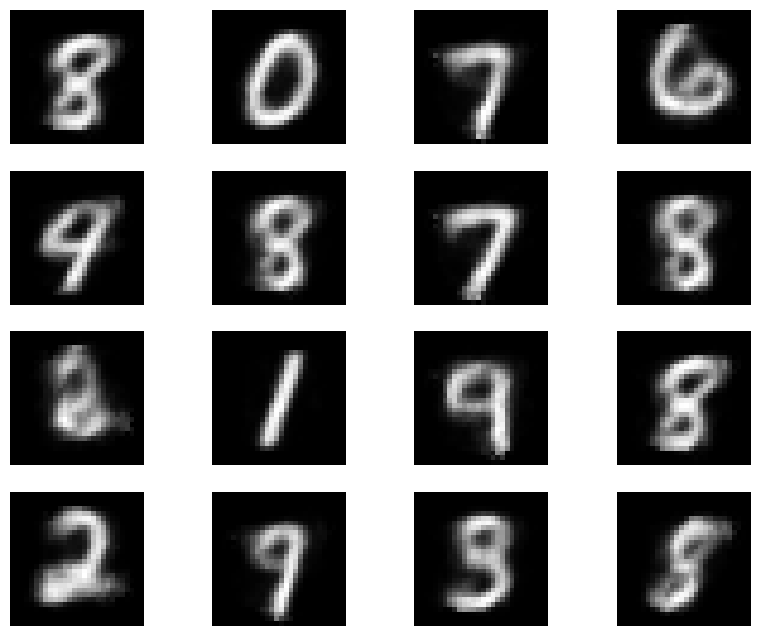

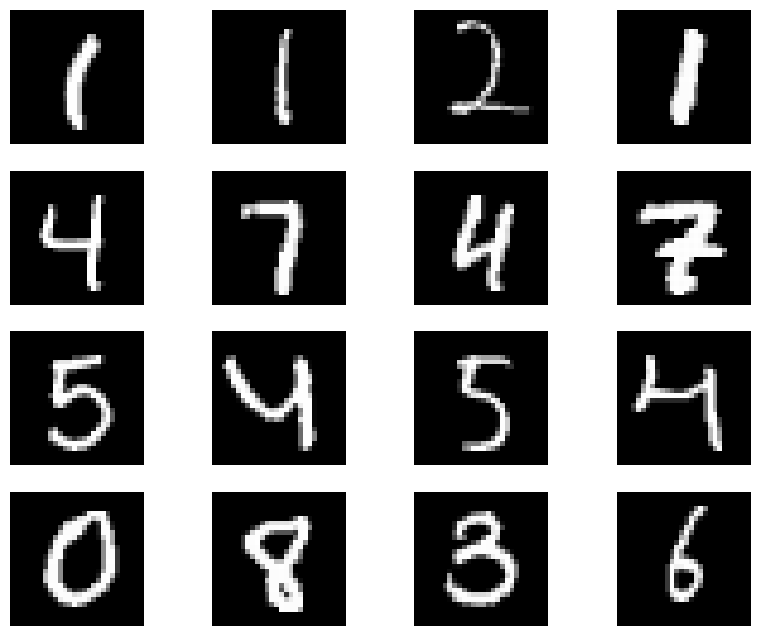

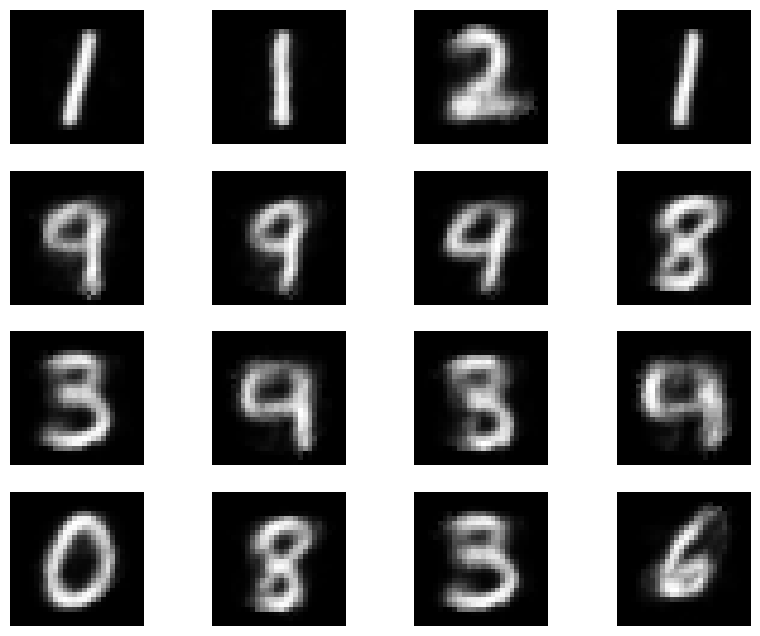

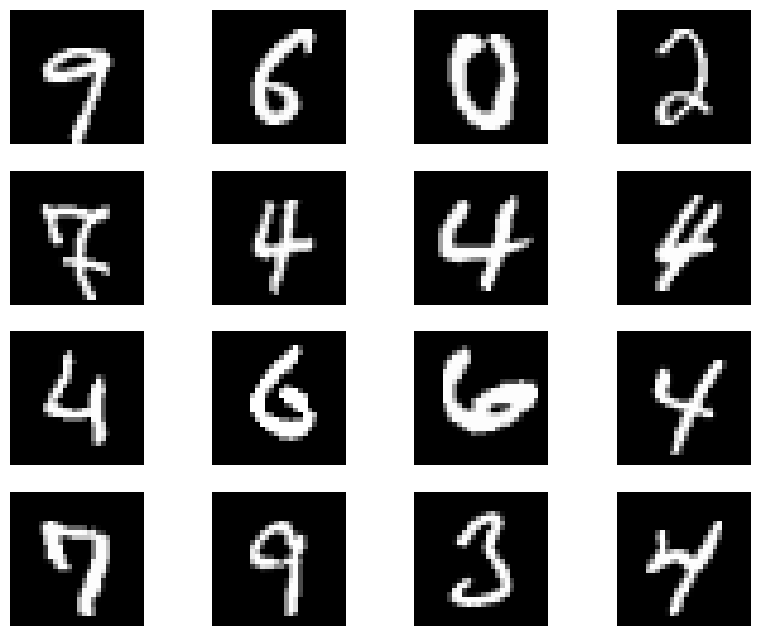

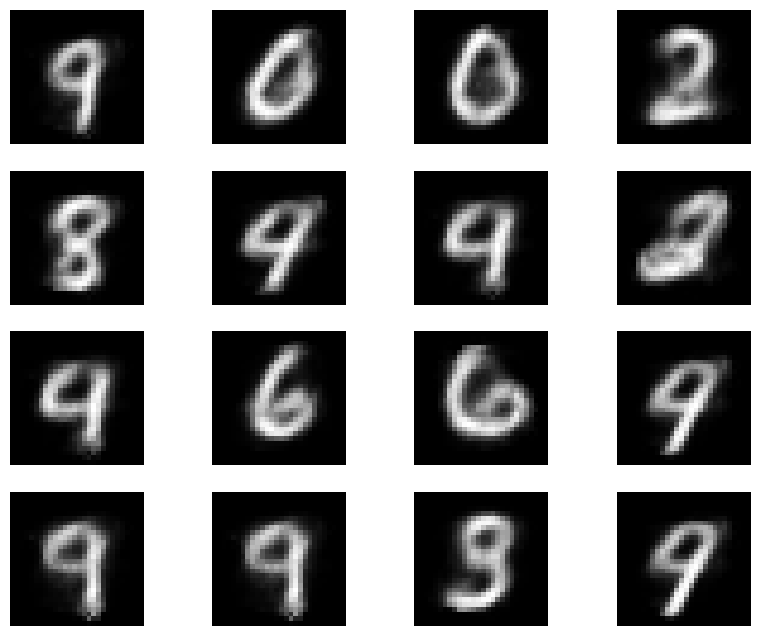

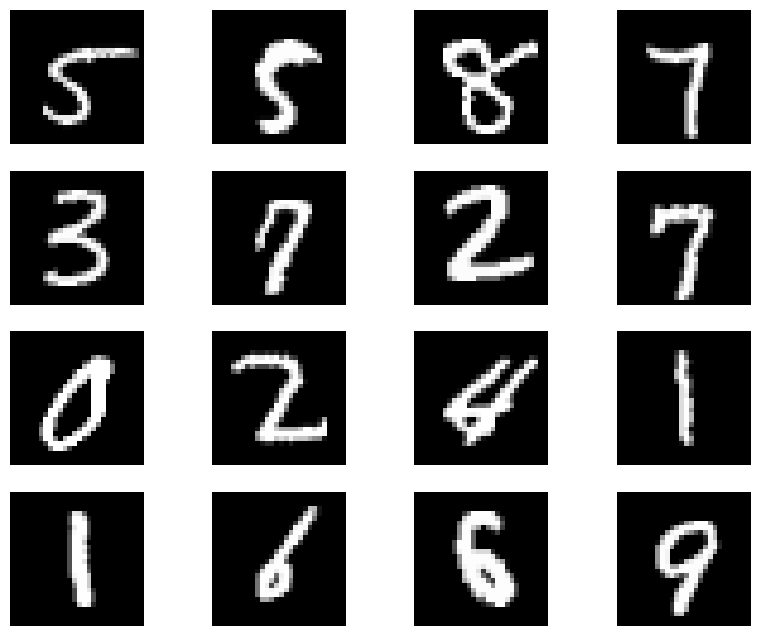

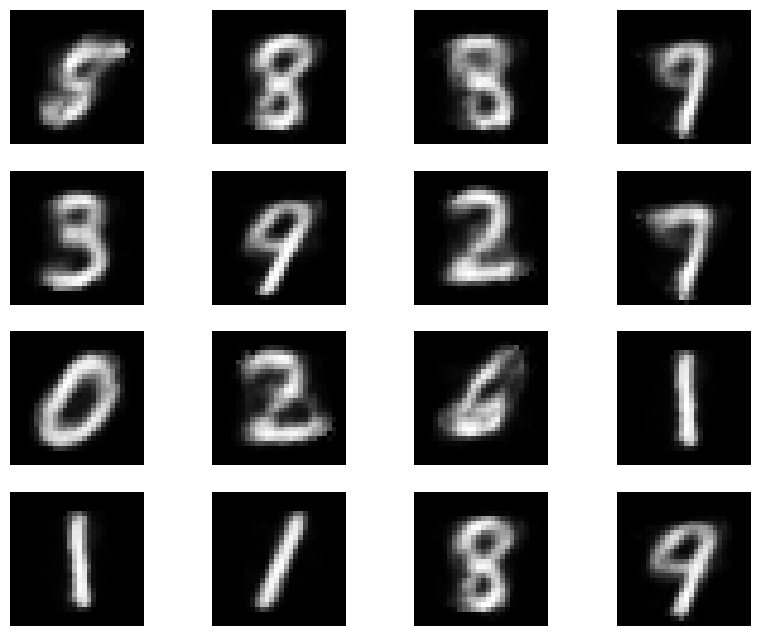

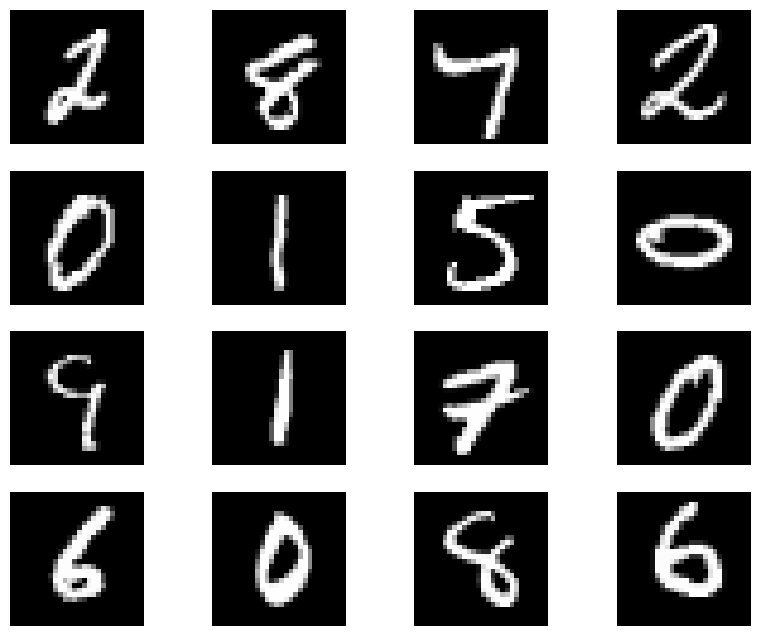

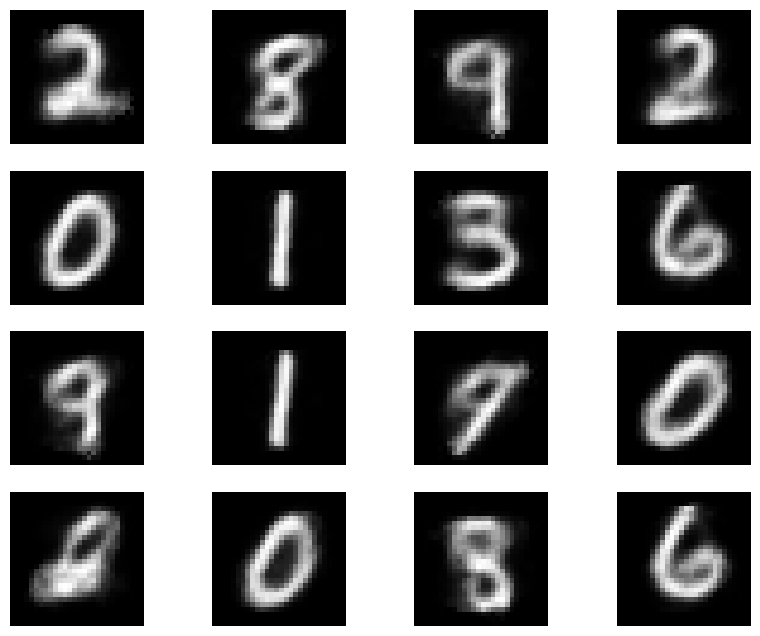

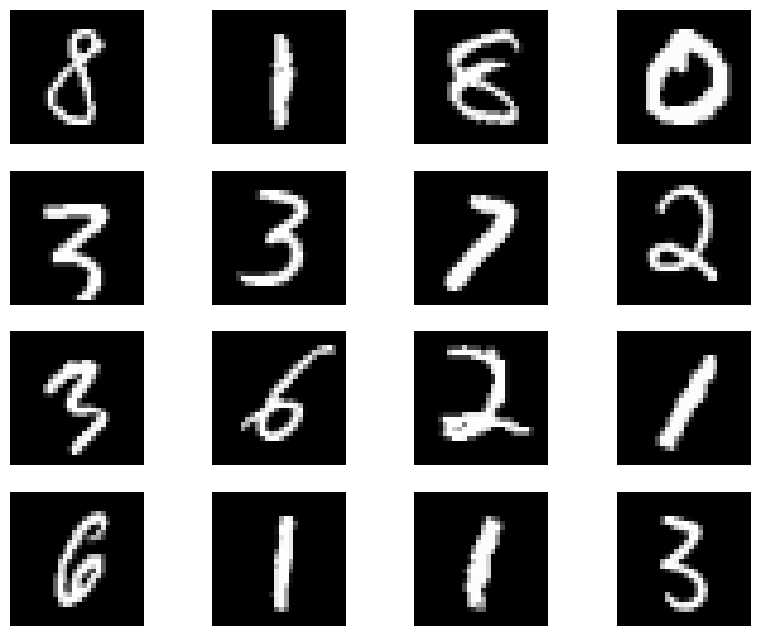

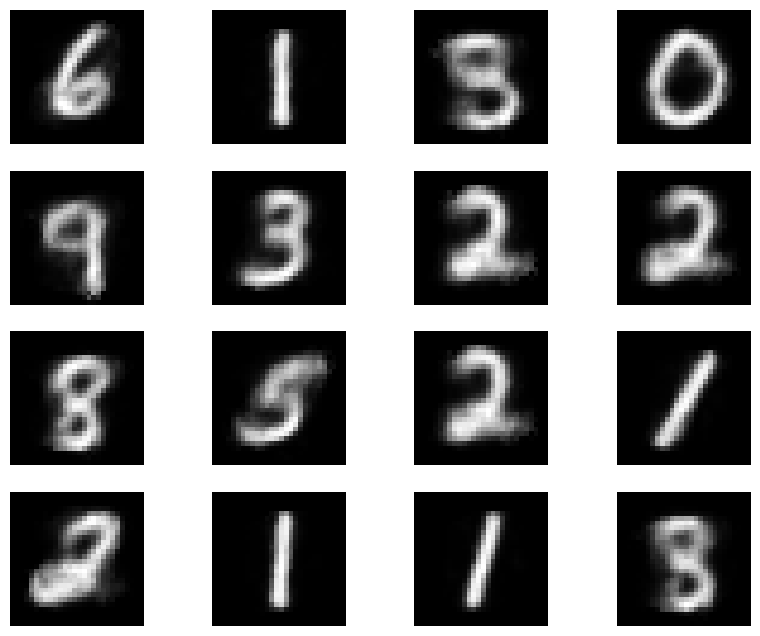

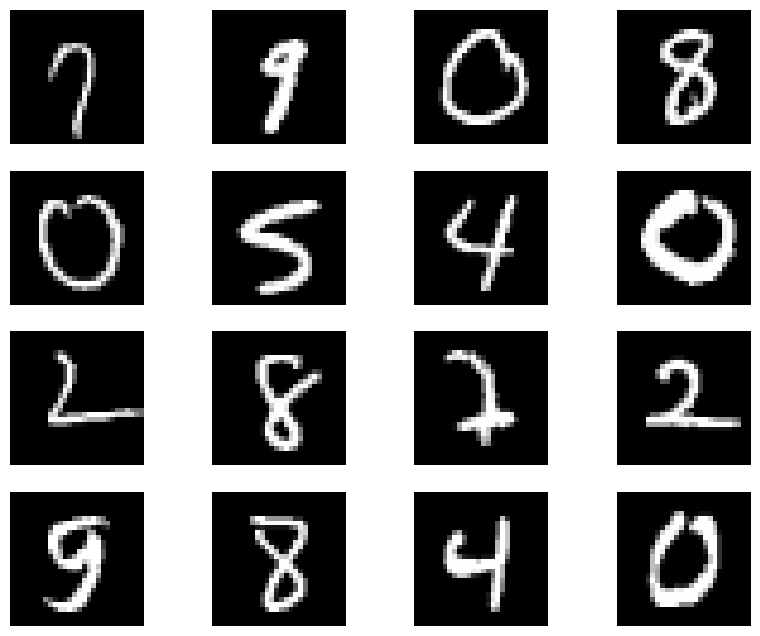

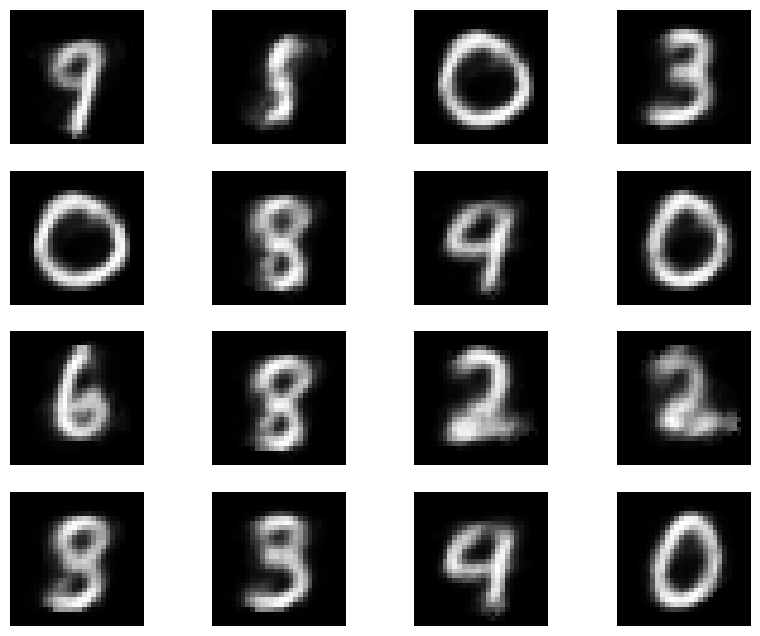

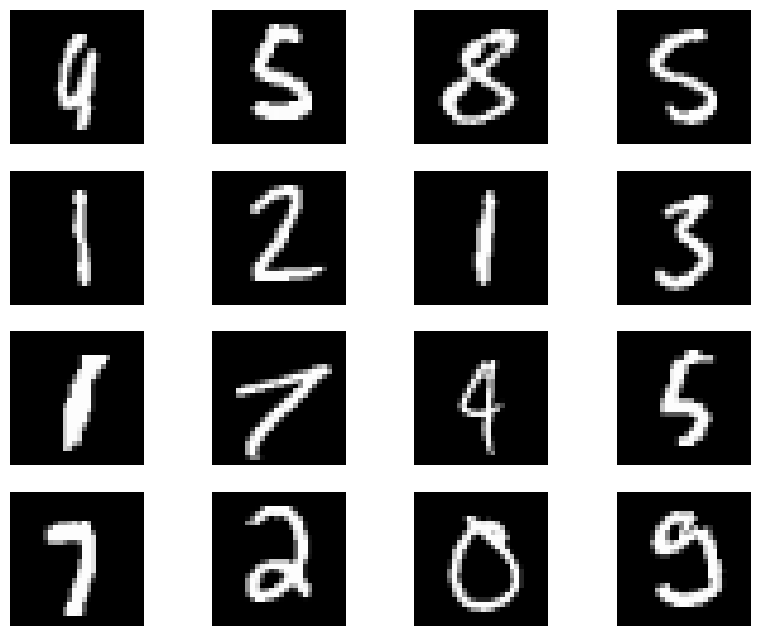

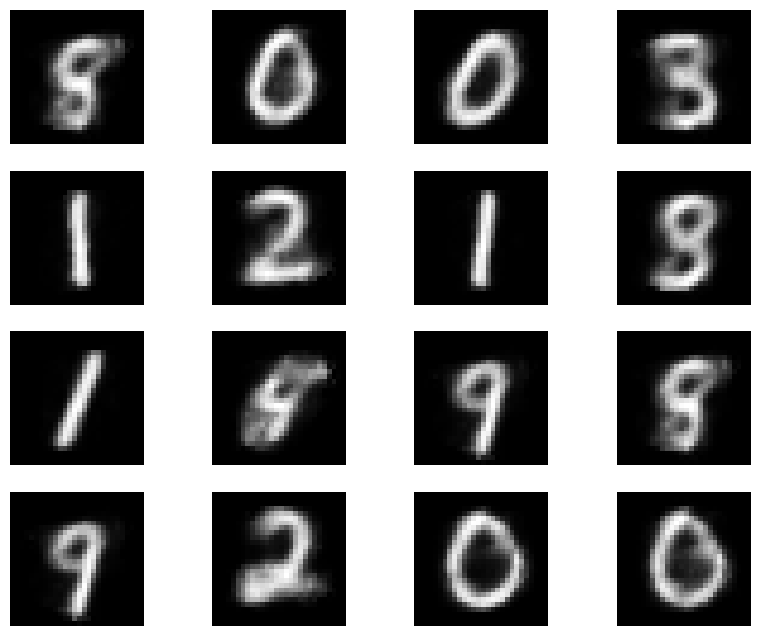

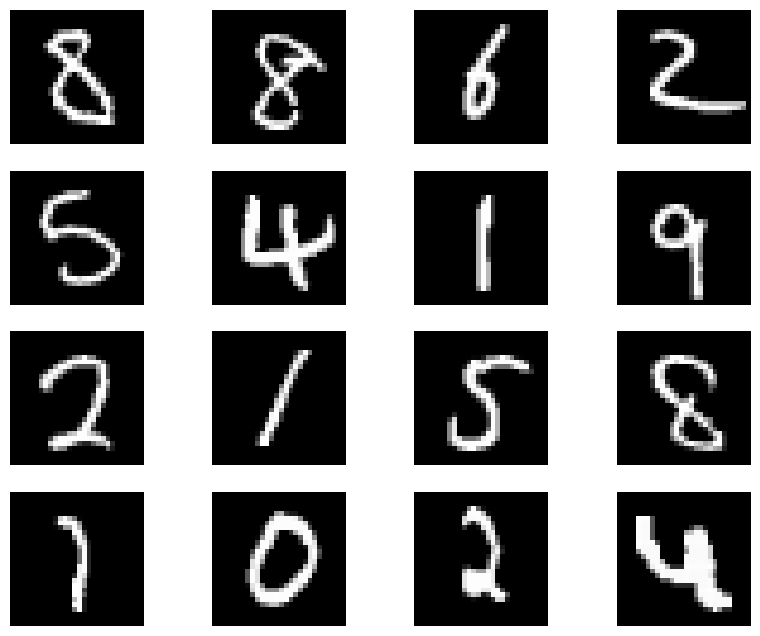

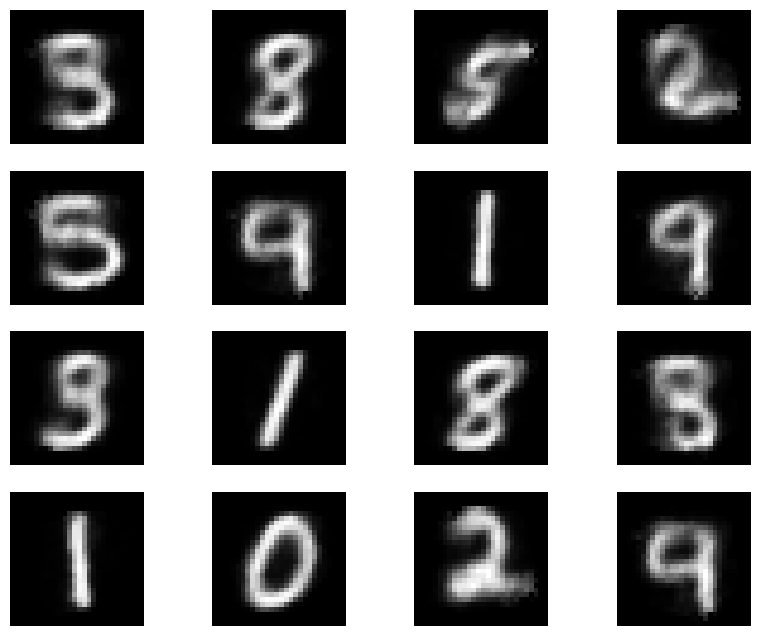

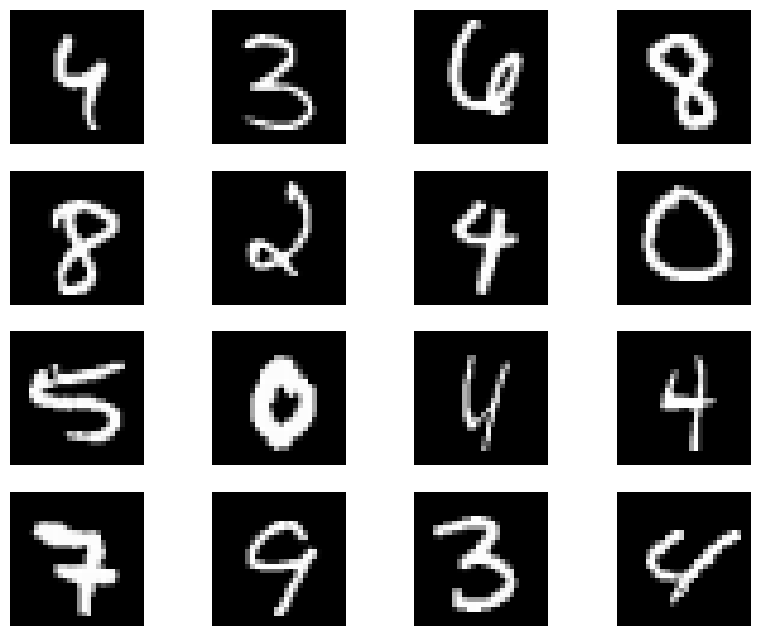

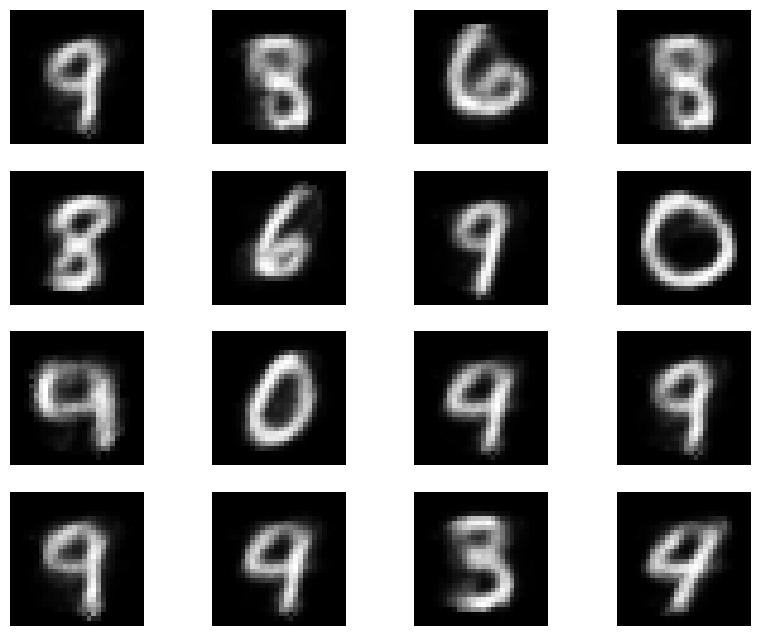

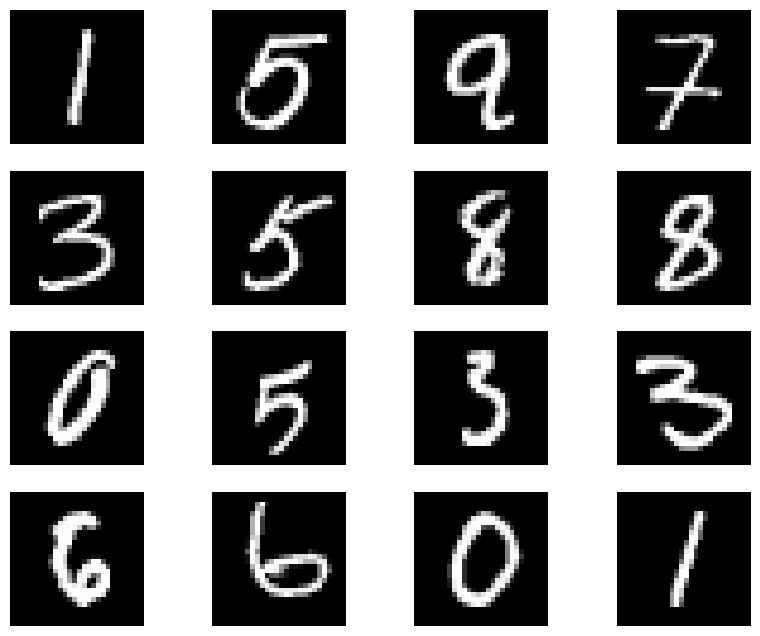

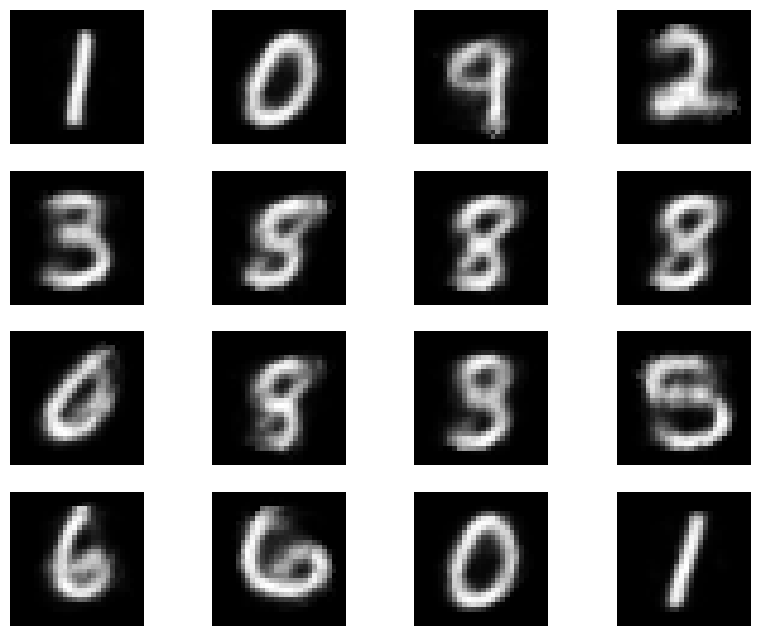

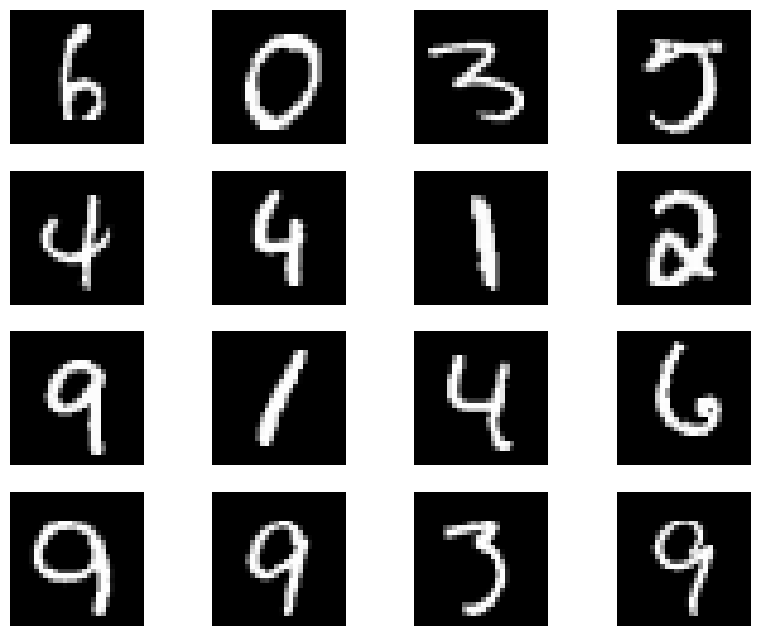

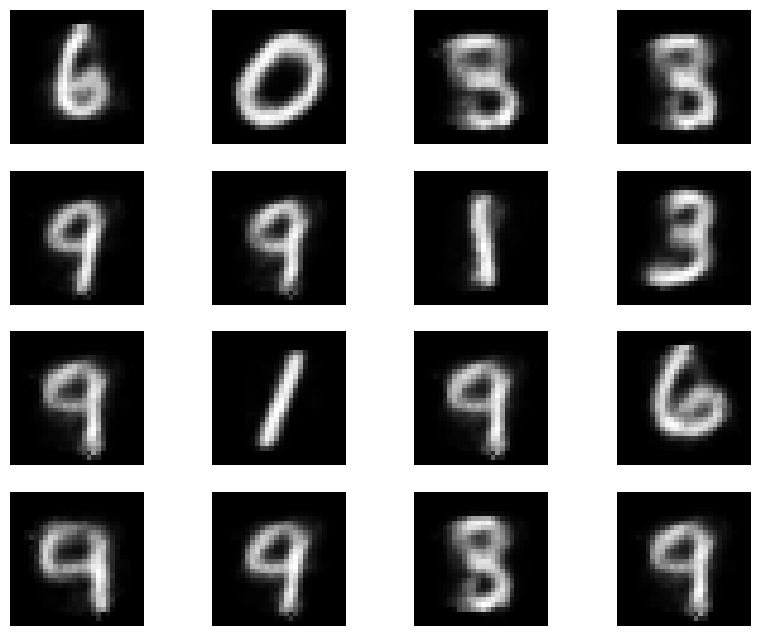

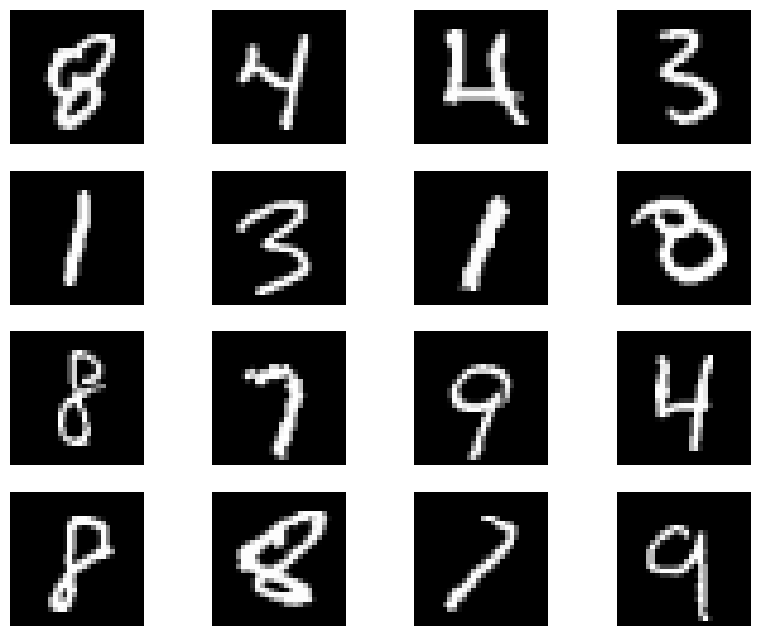

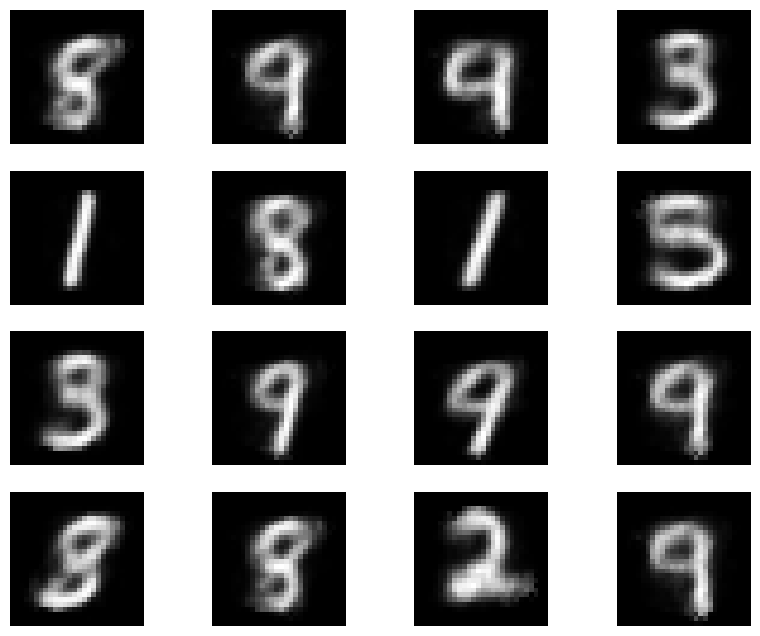

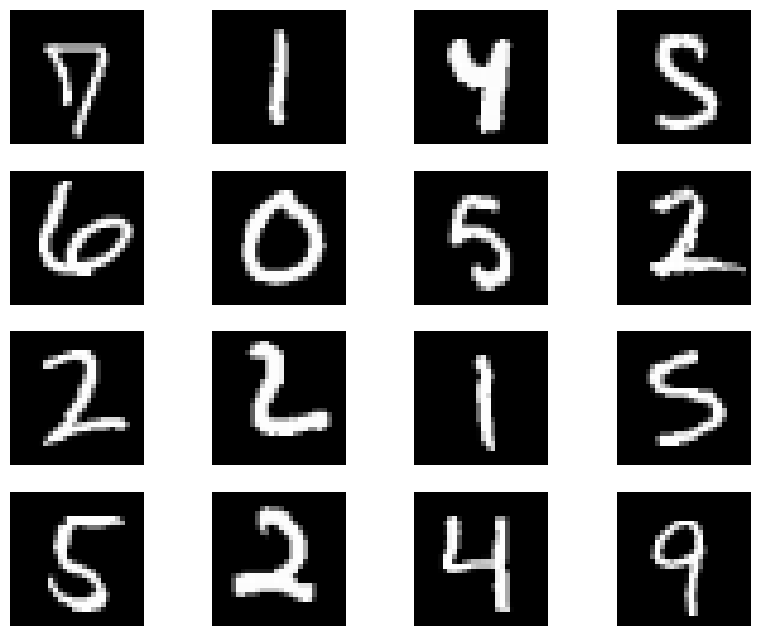

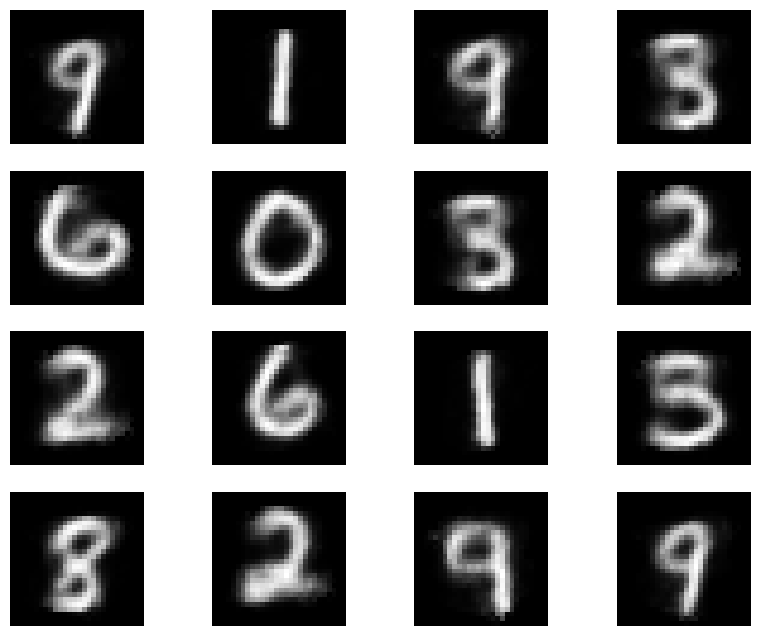

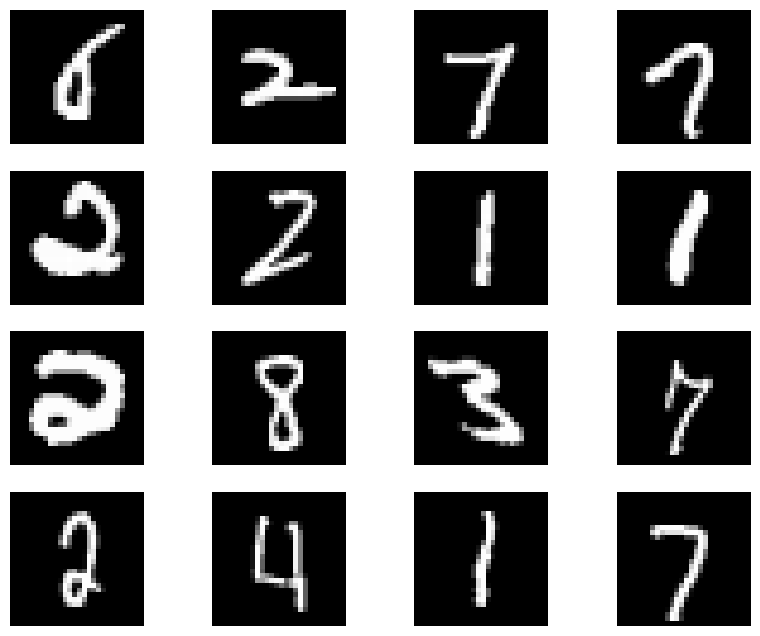

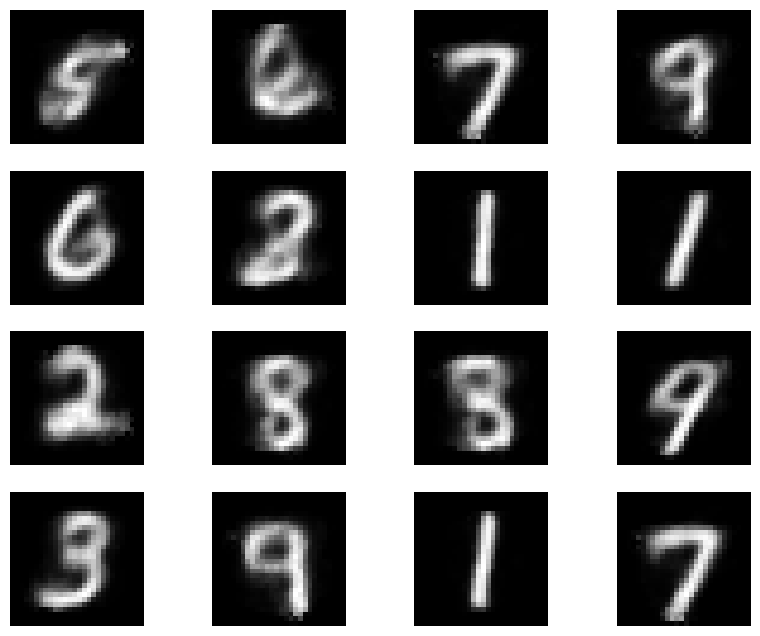

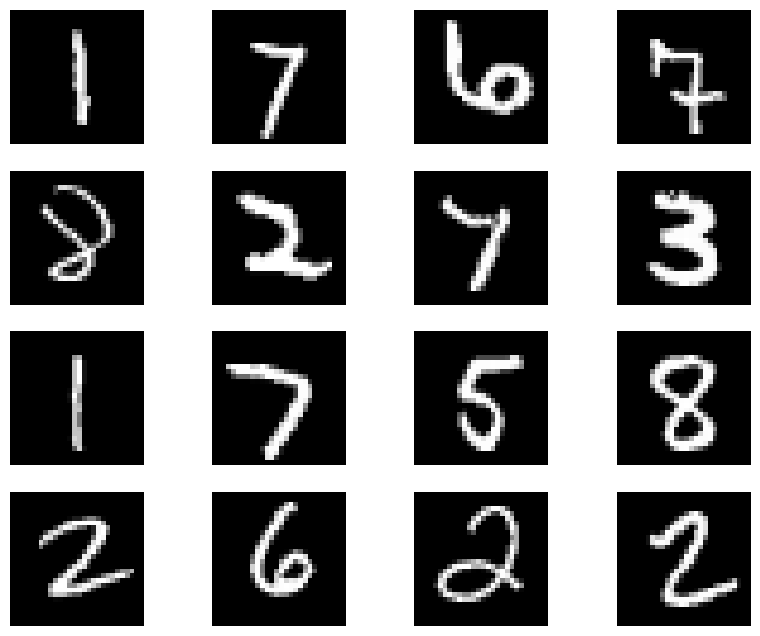

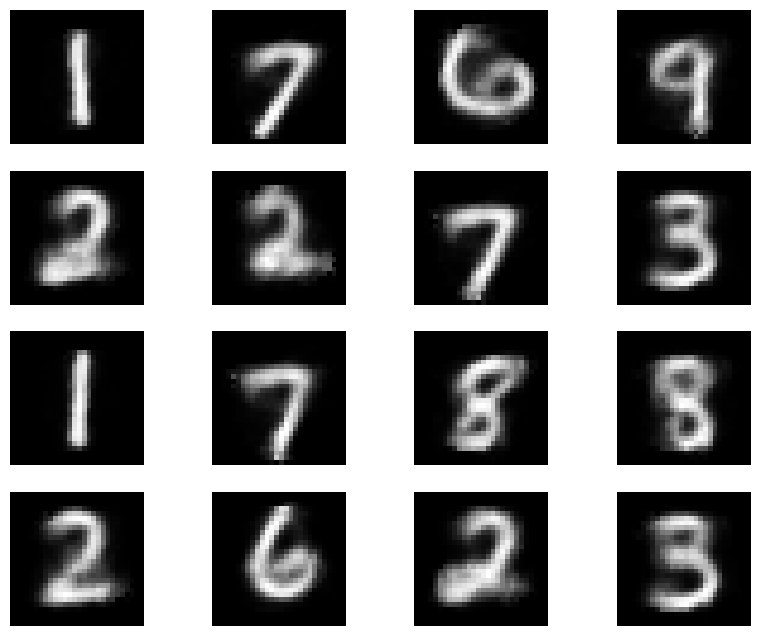

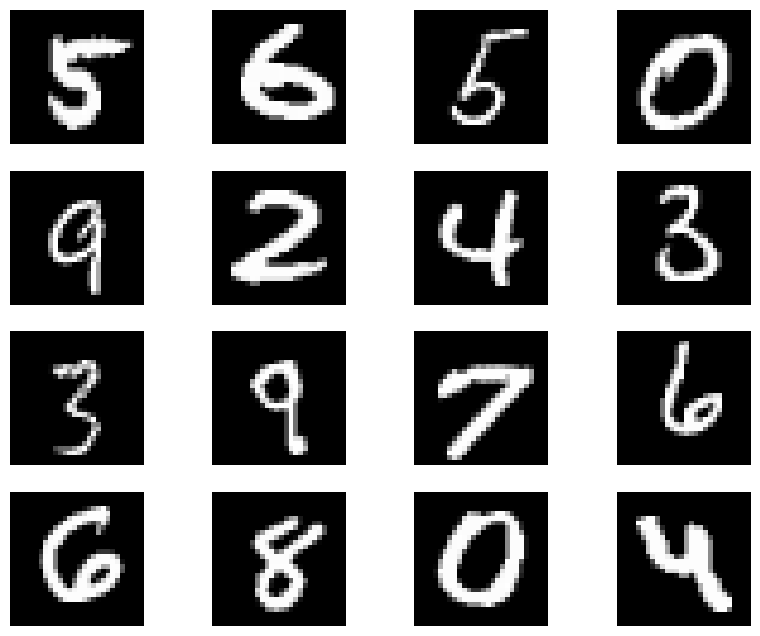

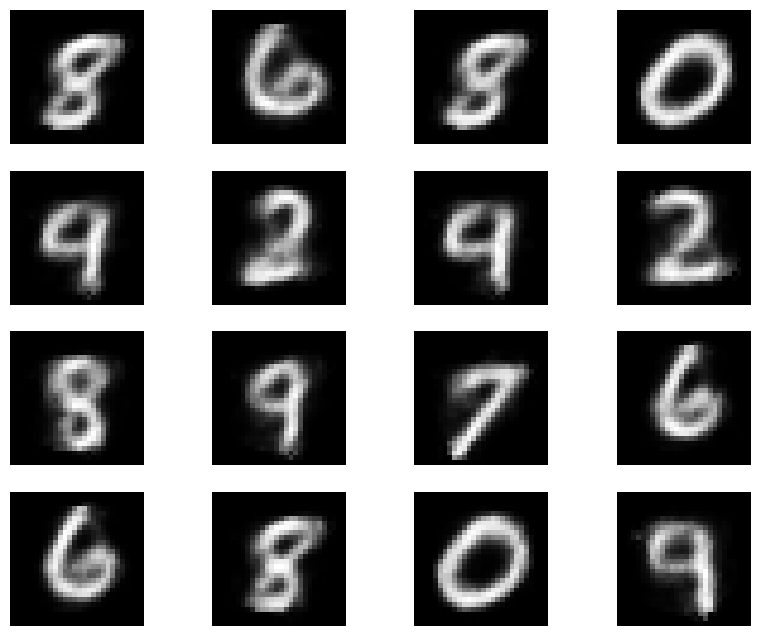

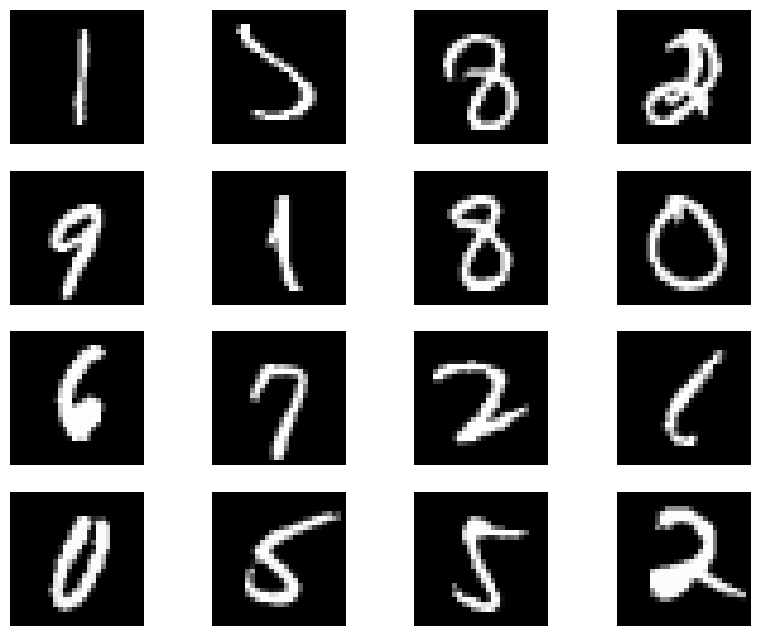

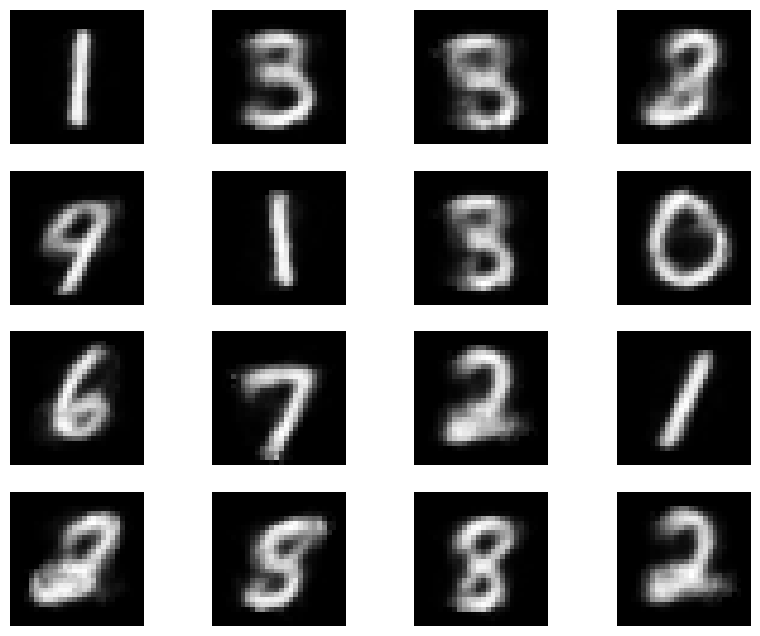

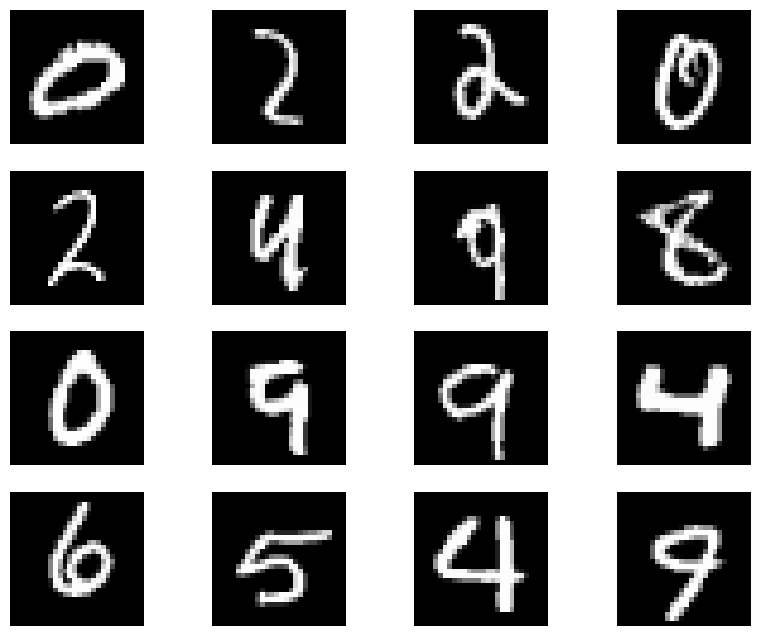

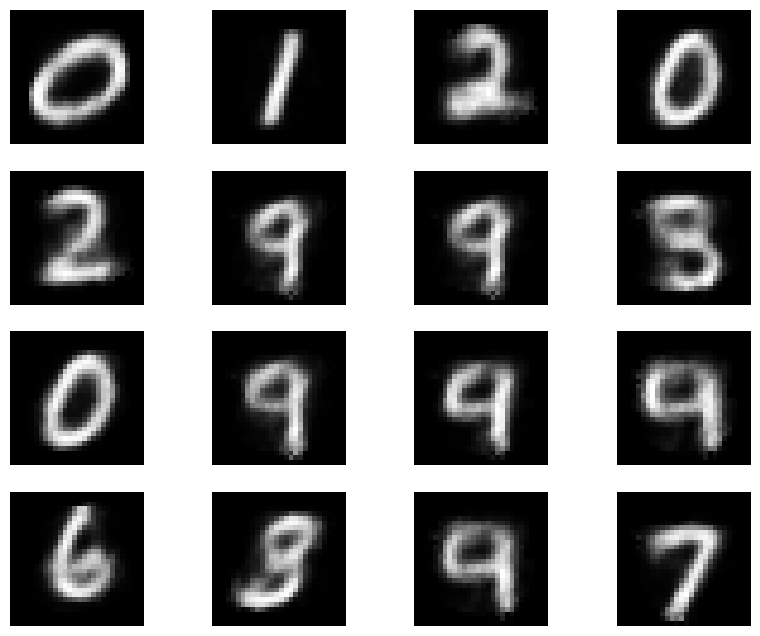

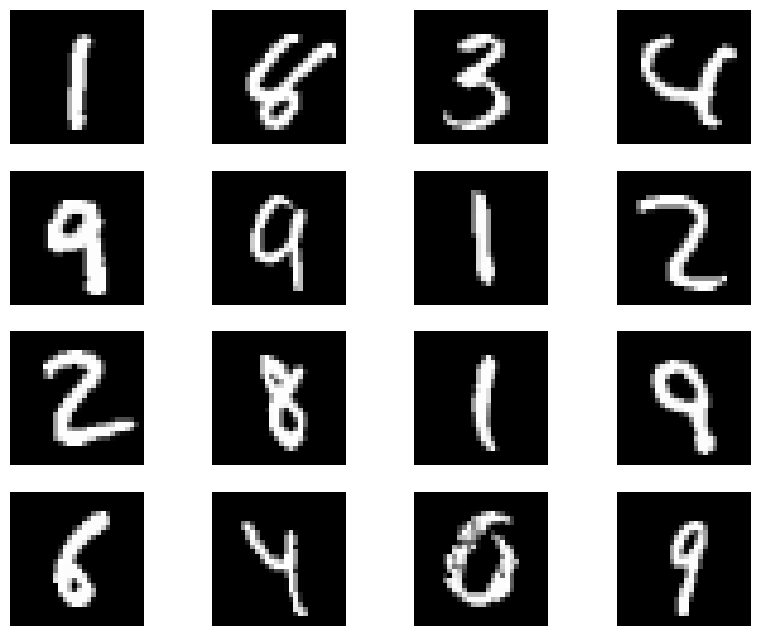

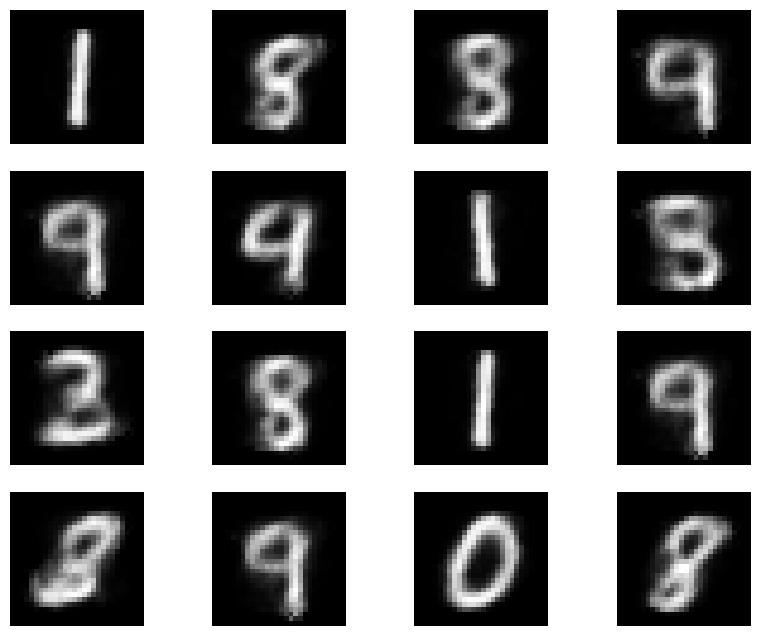

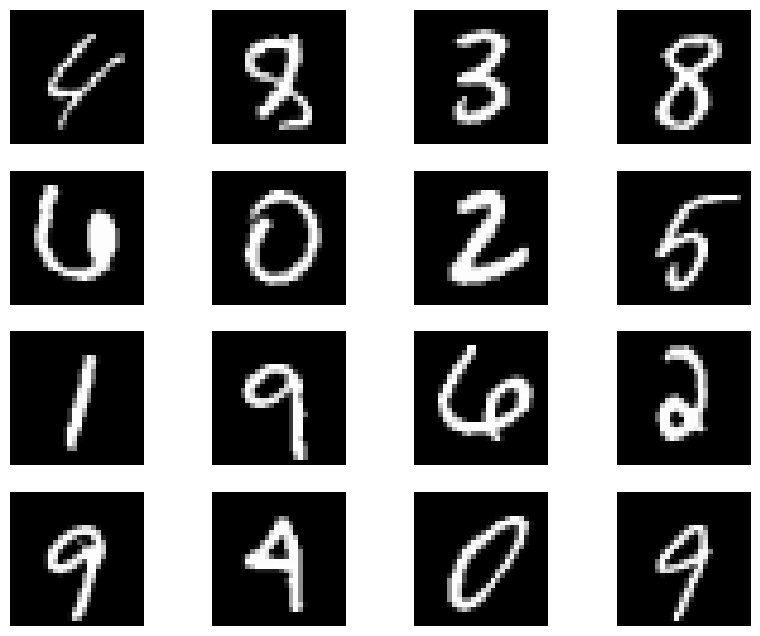

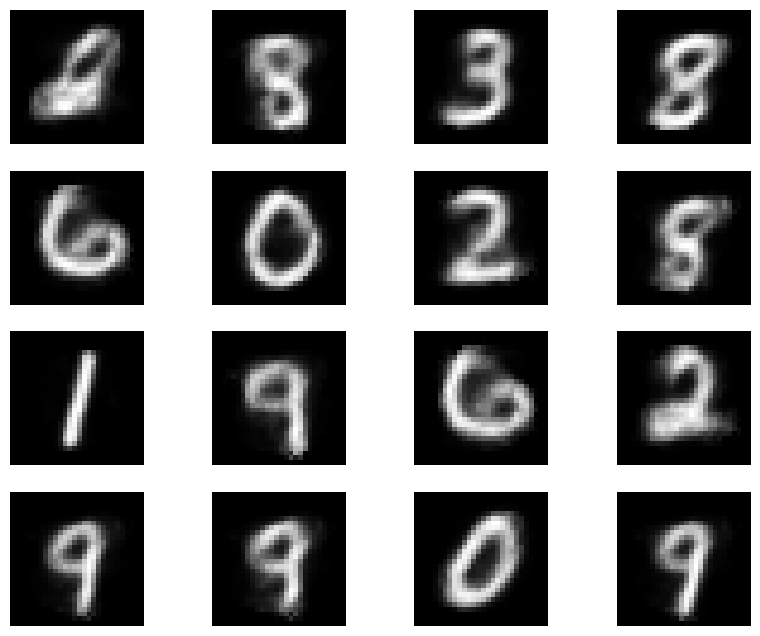

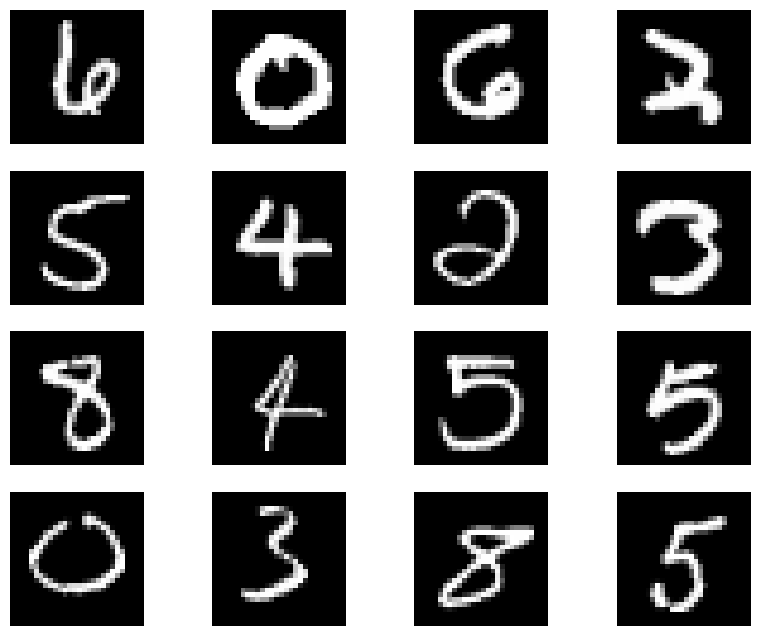

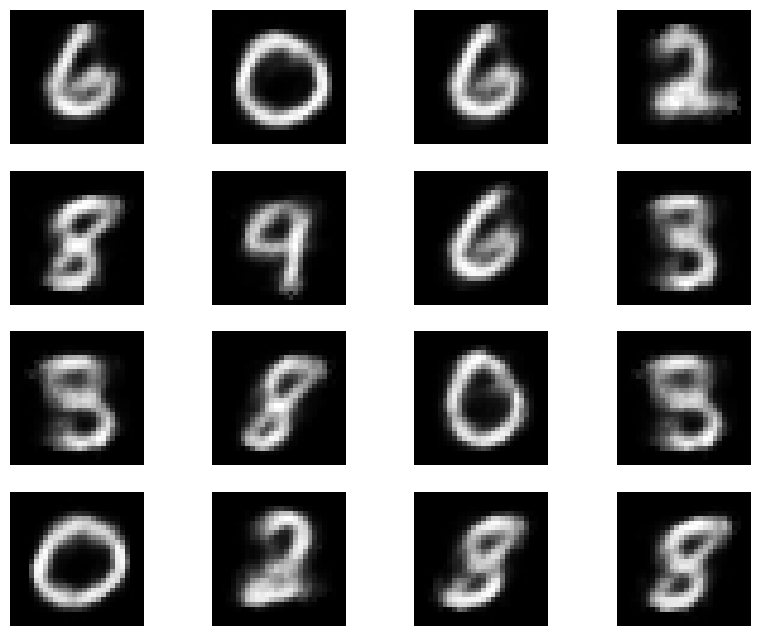

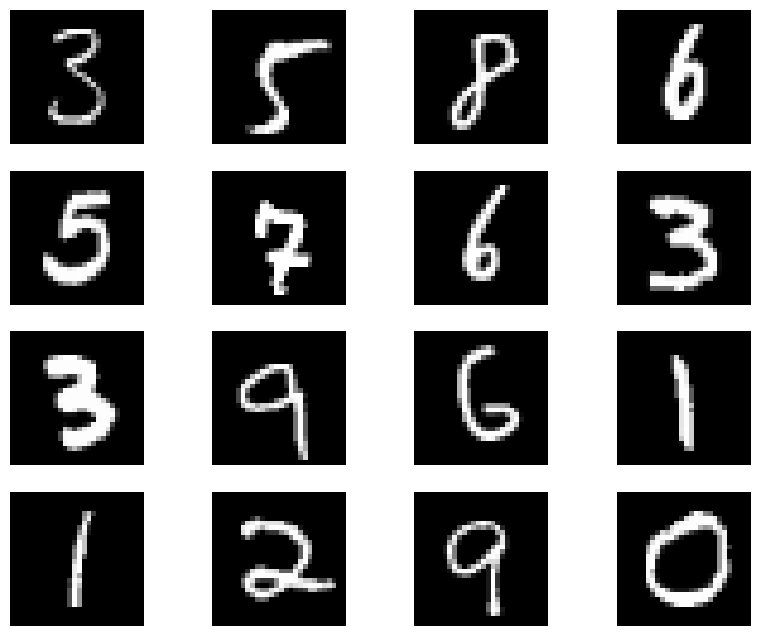

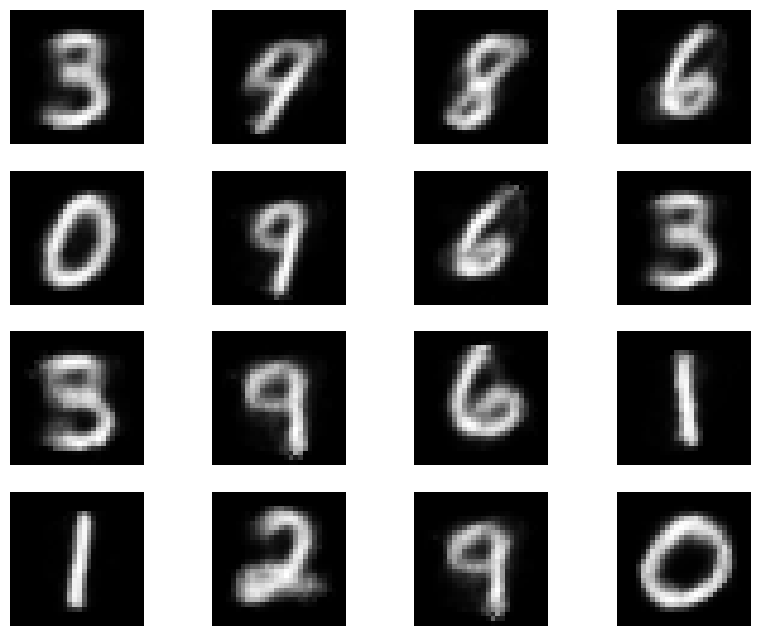

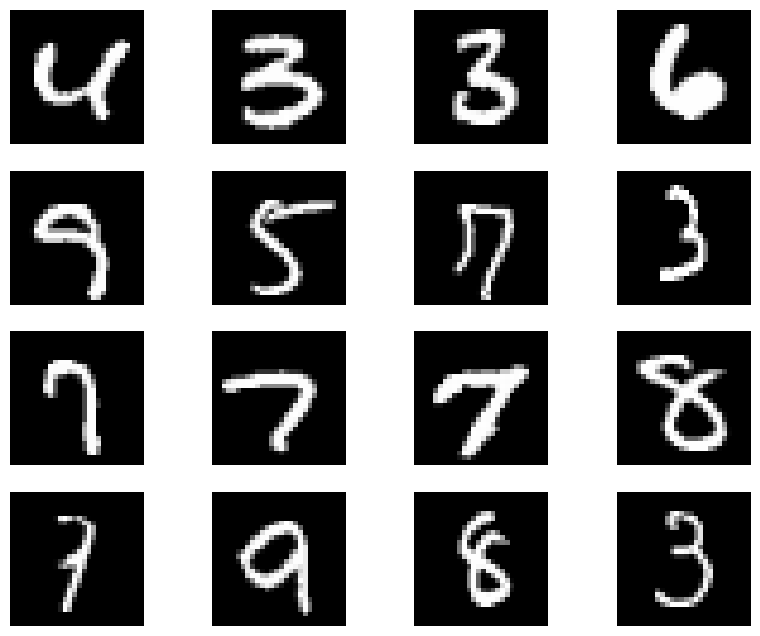

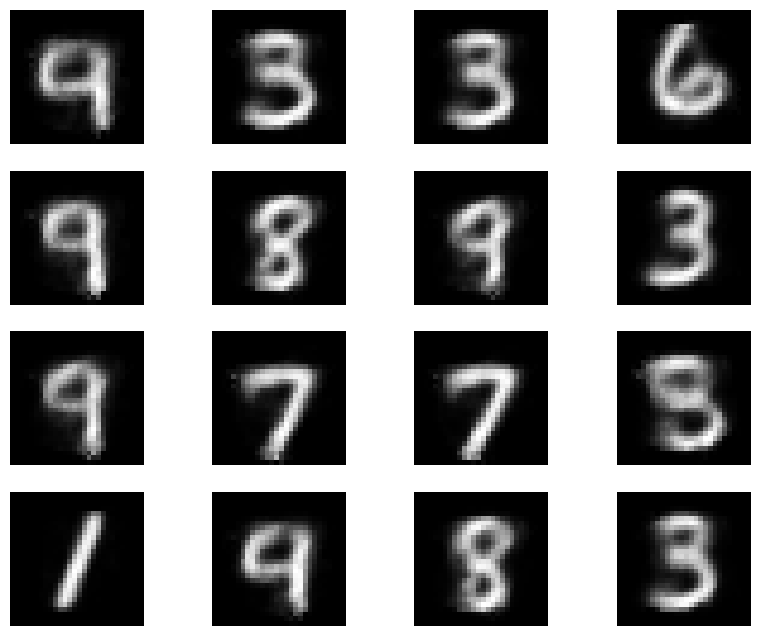

KeyboardInterrupt: ignored

In [6]:
# coding: utf-8
import torch
import torch.nn as nn
import torch.utils.data as data
import torchvision
import numpy as np
import matplotlib.pyplot as plt


# Settings
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


# Show images
def show_images(images):
    sqrtn = int(np.ceil(np.sqrt(images.shape[0])))

    for index, image in enumerate(images):
        plt.subplot(sqrtn, sqrtn, index+1)
        plt.imshow(image.reshape(28, 28))
        plt.axis('off')


# Model structure
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(784, 128),
            nn.Tanh(),
            nn.Linear(128, 64),
            nn.Tanh(),
            nn.Linear(64, 16),
            nn.Tanh(),
            nn.Linear(16, 2),
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(2, 16),
            nn.Tanh(),
            nn.Linear(16, 64),
            nn.Tanh(),
            nn.Linear(64, 128),
            nn.Tanh(),
            nn.Linear(128, 784),
            nn.Sigmoid()
        )

    def forward(self, inputs):
        codes = self.encoder(inputs)
        decoded = self.decoder(codes)

        return codes, decoded


# Load model
model = torch.load('autoencoder.pth')
model.eval()
print(model)


# DataLoader
test_set = torchvision.datasets.MNIST(
    root='mnist',
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
)
test_loader = data.DataLoader(test_set, batch_size=16, shuffle=False)


# Test
with torch.no_grad():
    for data in test_loader:
        inputs = data[0].view(-1, 28*28)
        show_images(inputs)
        plt.show()

        code, outputs = model(inputs)
        show_images(outputs)
        plt.show()
        exit()

AutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): Tanh()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): Tanh()
    (4): Linear(in_features=64, out_features=16, bias=True)
    (5): Tanh()
    (6): Linear(in_features=16, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): Tanh()
    (2): Linear(in_features=16, out_features=64, bias=True)
    (3): Tanh()
    (4): Linear(in_features=64, out_features=128, bias=True)
    (5): Tanh()
    (6): Linear(in_features=128, out_features=784, bias=True)
    (7): Sigmoid()
  )
)


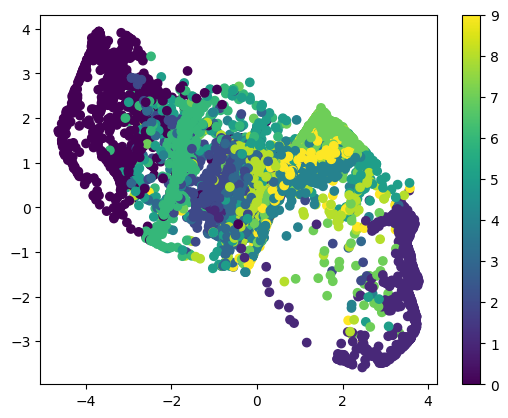

In [1]:
# coding: utf-8
import torch
import torch.nn as nn
import torch.utils.data as data
import torchvision
import matplotlib.pyplot as plt


# Model structure
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(784, 128),
            nn.Tanh(),
            nn.Linear(128, 64),
            nn.Tanh(),
            nn.Linear(64, 16),
            nn.Tanh(),
            nn.Linear(16, 2),
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(2, 16),
            nn.Tanh(),
            nn.Linear(16, 64),
            nn.Tanh(),
            nn.Linear(64, 128),
            nn.Tanh(),
            nn.Linear(128, 784),
            nn.Sigmoid()
        )

    def forward(self, inputs):
        codes = self.encoder(inputs)
        decoded = self.decoder(codes)

        return codes, decoded


# Load model
model = torch.load('autoencoder.pth')
model.eval()
print(model)


# DataLoader
test_set = torchvision.datasets.MNIST(
    root='mnist',
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
)
test_loader = data.DataLoader(test_set, batch_size=16, shuffle=False)


axis_x = []
axis_y = []
answers = []
with torch.no_grad():
    for data in test_loader:
        inputs = data[0].view(-1, 28*28)
        answers += data[1].tolist()

        code, outputs = model(inputs)
        axis_x += code[:, 0].tolist()
        axis_y += code[:, 1].tolist()


plt.scatter(axis_x, axis_y, c=answers)
plt.colorbar()
plt.show()